<a href="https://colab.research.google.com/github/pwy7fv/DS-4002-Group-Projects/blob/main/Scripts/FF3_%2B_FF4_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#getting files from github repo
!git clone https://github.com/pwy7fv/DS-4002-Group-Projects

Cloning into 'DS-4002-Group-Projects'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 550 (delta 123), reused 79 (delta 40), pack-reused 315 (from 2)
Receiving objects: 100% (550/550), 12.49 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (268/268), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Cleaning Fast and Furious: Tokyo Drift(2006)**

In [ ]:
#creating dataframe of FF3 data to clean it
df3 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/FF3_data.csv', low_memory=False)
df3.head()

,Rating,Title,Content,Author Name,Date,Year
0,7.0,The last one about actual racing?,Look behind the woeful accent and this is actu...,sarnieken,2021-03-28,2021
1,7.0,For the most part a good car action flick.,The first film was BREAK POINT with cars. The ...,tmm_8705,2013-06-28,2013
2,7.0,Surprisingly good - Sung Kang steals the show,I'm getting the feeling that the majority of r...,accidentalist,2006-06-14,2006
3,6.0,"The drivers, the cars and the Drift races are ...",This is an exciting narration of drifting auto...,ma-cortes,2008-04-08,2008
4,7.0,"Decent, Hardly any substance, But Sometime to ...",What can I say about this movie that many have...,andykhiem87,2006-08-01,2006


In [ ]:
#Getting info on data
print(df3.head(),'\n')
print(df3.describe(),'\n')

  Rating                                              Title  \
0      7                  The last one about actual racing?   
1      7         For the most part a good car action flick.   
2      7      Surprisingly good - Sung Kang steals the show   
3      6  The drivers, the cars and the Drift races are ...   
4      7  Decent, Hardly any substance, But Sometime to ...   

                                             Content    Author Name  \
0  Look behind the woeful accent and this is actu...      sarnieken   
1  The first film was BREAK POINT with cars. The ...       tmm_8705   
2                                         No content  accidentalist   
3  This is an exciting narration of drifting auto...      ma-cortes   
4  What can I say about this movie that many have...    andykhiem87   

           Date  
0  Mar 28, 2021  
1  Jun 28, 2013  
2  Jun 14, 2006  
3   Apr 8, 2008  
4   Aug 1, 2006   

       Rating        Title     Content Author Name          Date
count     548      

In [ ]:
print(df3.shape, '\n') # List the dimensions of df
print(df3.dtypes, '\n') # getting data types
print(df3.columns, '\n') # Column names

(548, 6) 

Rating         float64
Title           object
Content         object
Author Name     object
Date            object
Year             int64
dtype: object 

Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object') 



['7' '6' 'No rating' '5' '8' '3' '10' '1' '2' '4' '9'] 

Rating
10           92
6            74
8            72
7            64
5            51
4            45
9            45
1            39
3            37
2            19
No rating    10
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



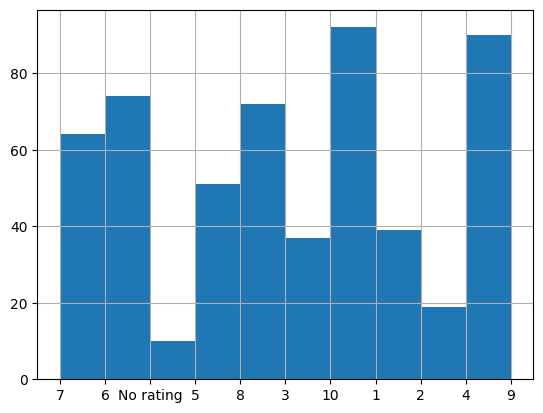

In [ ]:
var = 'Rating'  # Categorical variable example
print(df3[var].unique(),'\n') #seeing how many types of each rating
print(df3[var].value_counts(), '\n') # counting
print(df3[var].hist(), '\n') # making historgram of info

**Looking for Missing Data in FF3**

In [ ]:
#seeing if there are any "No title"
no_title_count = df3[df3['Title'] == 'No title'].shape[0]
print(no_title_count)

0


In [ ]:
#see how many "No content", so then know about how many to clean
no_content_count = df3[df3['Content'] == 'No content'].shape[0]
print(no_content_count)

135


In [ ]:
#see how many "No author name"
no_author_count = df3[df3['Author Name'] == 'No author name'].shape[0]
print(no_author_count)

0


In [ ]:
#see how many "No date"
no_date_count = df3[df3['Date'] == 'No date'].shape[0]
print(no_date_count)

0


In [ ]:
#See how many "No rating"
no_rating_count = df3[df3['Rating'] == 'No rating'].shape[0]
print(no_rating_count)

10


Converting null values in Rating to mean value of Rating score of movie

In [ ]:
pd.to_numeric(df3['Rating'], errors='coerce') #converting Rating to float

,Rating
0,7.0
1,7.0
2,7.0
3,6.0
4,7.0
...,...
543,10.0
544,9.0
545,10.0
546,8.0


In [ ]:
df3['Rating'] = df3['Rating'].replace("No rating", np.nan) #changin "No rating" to np.nan so I can then replace those with mean of rating
df3['Rating'] = pd.to_numeric(df3['Rating'], errors='coerce')
mean_rating = df3['Rating'].mean().round(0) # getting mean of ratings and rounding to whole number
print(mean_rating) # printing the mean rating

6.0


In [ ]:
df3['Rating'].fillna(mean_rating, inplace=True) # changing np.nan in Rating to mean of rating
print(df3['Rating'])
pd.set_option('display.max_rows', None)
print(df3['Rating']) #showing all of them, to make sure all have been changed

0       7.0
1       7.0
2       7.0
3       6.0
4       7.0
       ... 
543    10.0
544     9.0
545    10.0
546     8.0
547     8.0
Name: Rating, Length: 548, dtype: float64
0       7.0
1       7.0
2       7.0
3       6.0
4       7.0
5       7.0
6       6.0
7       5.0
8       8.0
9       7.0
10      3.0
11     10.0
12      7.0
13      3.0
14      7.0
15      6.0
16      6.0
17      6.0
18      1.0
19     10.0
20      6.0
21      2.0
22      8.0
23      7.0
24      1.0
25      7.0
26      7.0
27      7.0
28      1.0
29      8.0
30      6.0
31      6.0
32      3.0
33      8.0
34      6.0
35      5.0
36      6.0
37      7.0
38      7.0
39      6.0
40      5.0
41      8.0
42      7.0
43      1.0
44     10.0
45      7.0
46      1.0
47      7.0
48      6.0
49      7.0
50      1.0
51     10.0
52      7.0
53      2.0
54      8.0
55      7.0
56      1.0
57      7.0
58      7.0
59      7.0
60      1.0
61     10.0
62      6.0
63      4.0
64      8.0
65      6.0
66      1.0
67      7.0
68      7.

<ipython-input-17-890ad17894bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Rating'].fillna(mean_rating, inplace=True) # changing np.nan in Rating to mean of rating


In [ ]:
df3['Date'] = pd.to_datetime(df3['Date']) #converting Date to datetime so its easier for analysis
print(df3.dtypes) #checking to make sure it converted properly

Rating                 object
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
dtype: object


In [ ]:
#counting how many reviews per year
df3['Year'] = df3['Date'].dt.year #make Year column
print(df3['Year'].unique(),'\n')
print(df3['Year'].value_counts(), '\n')

[2021 2013 2006 2008 2024 2015 2020 2019 2016 2014 2007 2017 2023 2018
 2009 2022 2011 2025 2012 2010] 

Year
2006    243
2021     46
2020     33
2023     31
2007     24
2015     19
2024     18
2019     18
2013     17
2022     17
2017     12
2008     11
2009     10
2011     10
2016      9
2014      9
2018      8
2012      5
2010      5
2025      3
Name: count, dtype: int64 



**Cleaning the "No Content" in "Content" column**

In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows
No_content_rows = df3[df3['Content'].str.contains('No content')]  #find all the rows that have "No content" in content/text portion of review
print(No_content_rows)

     Rating                                              Title     Content  \
2       7.0      Surprisingly good - Sung Kang steals the show  No content   
8       8.0                    MOST UNDERRATED OF THE SERIES!!  No content   
9       7.0                           A new cast in a new city  No content   
10      3.0  Slightly Entertaining Movie with bad actors an...  No content   
12      7.0                  'Furious' will have hearts racing  No content   
17      6.0                   Far better than the previous two  No content   
18      1.0                  The Slow and The Stupid: Part III  No content   
22      8.0              "Tokyo Drift" Charts A Change of Pace  No content   
24      1.0                    Worse than the worst movie ever  No content   
26      7.0  Like finding a pristine Z in the garage with a...  No content   
28      1.0  Horrific excuse for product placement. Neither...  No content   
32      3.0  An abomination of all that is right in this wo...  

In [ ]:
#I made a dictionary to assign each "No content" with the content that I just found and manually copy and pasted from IMDb website.
#These did not scrape properly because they had spoilers in them and it so it had an extra block as a spoiler button
FF3reviews_dict = {
    2: "I'm getting the feeling that the majority of reviews here as of June 14th are bogus. Why write a review if you've only seen the trailer for the film? Anyway, I had the opportunity to see this movie yesterday. Yeah, this is the one of those film series people will hate before seeing. It's over the top, has cheesy dialogue, and has an unlikeable protagonist. With that said, it's actually pretty entertaining, and isn't all that bad. We are introduced to Sean Boswell (Lucas Black), a high school kid who can't seem to find his niche in life. He's moved from town to town with his divorced mother, and getting into problems with the law, before finding himself in Southern California. The California scenes pay homage to Justin Lin's earlier film, Better Luck Tomorrow, almost feeling like an extension of that film. We see the crowds of students in the courtyard, almost peripheral to a particular point in time. Moving to California doesn't change anything, and Sean, the outsider, finds himself racing Clay (Zachery Ty Bryan, from Home Improvement), a rich kid who has it all, including a brand new Dodge Viper. In trouble with the law yet again, Sean finds himself moving to Japan, for reasons that aren't particularly clear. We don't know exactly why he *had* to move; however, it doesn't really matter anyway. Sean continues to find himself as an outsider. From his distant father, to his language barrier, to being unfamiliar with traditional customs. Unlike other particular American films, the culture of Japan was portrayed in a positive light. This was particularly refreshing, as the food jokes, Engrish jokes, height jokes, etc. have become very tiresome over the years. Sean meets Twinkie (Lil Bow Wow), and Han (Sung Kang), the latter of which appears to be the same character from Better Luck Tomorrow. Both Twinkie and Han serve as guides or mentors to Sean, as he becomes more familiar with Japan, school, drifting, and its associated group. In retrospect, Twinkie seems like an unnecessary character, and quickly gets shelved to Sung Kang's Han, who steals the show like a pimp. Sean also meets, and is attracted to Neela (Nathalie Kelley), who is the girlfriend of DK (Brian Tee). DK is a nickname for 'Drift King.' Sean quickly realizes this as he loses badly to him in his first race in Japan (and smashing up Han's S15 badly). The altercation between Sean and DK heats up leading to the climax of the film. Sean Boswell is an unlikeable character. His mannerism is interesting during the California scenes and you actually do get to like him, however he quickly outwears his welcome. From his unjustified temper, to his grating southern accent, Han becomes more of the likable protagonist. The dialogue was cheesy as hell too (remember the 'I'm free' line from the first one? This is worse - the moonlight drifting scene is embarrassingly bad). Character development is too hurried at times, much like this review. As with Kill Bill, Sonny Chiba is as charming as ever, this time playing a Yakuza boss, who happens to be the uncle of DK. Now, the racing scenes were actually not that bad. Compared to the outlandish effects of the first two FF films, Tokyo Drift is pretty understated. Racing-wise, this was a vendor-fest. 350Z's (VERY prominently displayed), RX-8's, and an EVO. Other than that, there was an R34 GT-R, S15, and the Veilside RX-7. That's really about it (with the obvious exception of the Mustang). I think I saw a glimpse of an AE86 hatch. Will it make people drift in the parking lot leaving the theatre? Yes. In fact, I saw some guy in a Camry attempting to do so. Will it spark interest in the vendor-sponsored cars? Probably. Will it increase resale value of your S13 or AE86? Probably not. Finally, there are two notable cameos in this film (among others). The first cameo has to do with 'DK' (not the film character). The second cameo ties the film to its predecessor. Both appearances were pretty well done and drew laughter from the crowd.",
    8: "I absolutely love this film, it moves over to Tokyo where instead its just pure speed we get the taste of the drift makes it kind of Need for Speedish. The protagonist is quite forgettable but we are introduced to Han and the best racing to date.",
    9: "This film may be part of the 'Fast and the Furious' series but, apart from a brief cameo, it features an entirely different cast. Instead of being centred on undercover cop Brian O'Conner it follows teenager Sean Boswell who is sent to live with his father in Tokyo after destroying his car in a street race. His father forbids him from having anything to do with cars but it isn't long before a classmate introduces him to the local 'drift racing' scene. Here he has a run in with DK, the best racer and nephew of a local Yakuza, who isn't happy about Sean talking to his girlfriend. Sean challenges him to a race and DK's friend Han Seoul-Oh lends him a car which he promptly destroys; if he is going to race he will have to learn how to drift. Han teaches him how to drift while Sean works for him to earn the money to pay for the wrecked car. It isn't long before DK and Han's friendship ends when it becomes apparent that Han has been skimming money. This ultimately puts Sean in his sights; Tokyo isn't big enough for the both of them; a drift race down a treacherous mountain road will determine who stays. At first I was a little bit disappointed that the character Brian O'Conner wasn't in this as the first two films were about him. New character Sean Boswell is entertaining and Lucas Black does a good job in the role even though he looks too old to be in high school. I can't think why they didn't make the character older as that would have also have avoided the ludicrous idea that an American teen who doesn't speak a word of Japanese would go to a Tokyo high school. Still this film is all about the characters racing their cars and the race scenes are exciting; this is particularly true of the final race down what looked like the most dangerous road in Japan. The appearance of Sonny Chiba as DK's Yakuza uncle was enjoyable and a cameo from a familiar character should leave fans very happy as the film comes to an end. Overall I enjoyed this as good mindless fun even though it is weaker than the first two films.",
    10: "This movie starts as expected and pretty entertaining, involving some street racing, and some 17yo who obviously doesn't fit in 'Sport America' and the whole high-school thing. I gotta say, from the first time I saw the main actor, and he going through the metal detectors, I tried to imagine he was going to an airport, then a university, even with cheerleaders, football teams and all the cliché that comes with movies presenting high schools, I thought that, because they casted a 23yo guy that looks like a 32yo, I'm still actually having trouble believing that the actor is only 23 years old. Sean 17 years old, played by Lucas Black, age 23, but looks 32, is the average American, with a slightly heavy, bad and annoying southern accent with a cowboy style goes to Tokyo after a race ends badly, there he meets with another bunch of 17yo who also look like in their late 20's, early 30's, and all have money, cars and lots of girls, including the main one, Neela, played by Nathalie Kelley, who obviously, gets disputed by both Sean, and his comic-book 'arch-villain' D.K.. The problem with the cast was with the choice for Sean and Neela, the first for being a bad actor and all of the reasons listed above, the latter because I think they injected her with so much botox, that except her mouth moving and eyes blinking and shedding some fake tears, you don't see any kind of facial expression whatsoever, the rest of the cast was good, even the Japanese playing the badly made character, D.K.. The story gets ridiculous from the minute Sean arrives in Tokyo, after school, he meets his demographically chosen friend and goes see the 'underground world of car racing', there he sees Neela again and from the start gets entangled in a love triangle involving the yakuza bad boy D.K., so, Sean challenges him for a race, oh wait, he doesn't have a car, no problem, some guy who never saw Sean before, or even knows his name, lends his 100k car, well, Sean trashes the car during the race, and that way, hey he made a new powerful friend, Han the Zen, all he did was trash his car. Anyway, some scenes of Sean learning how to drift happen, over and over and over and over and over again, some flirting with Neela, anyway, he end up winning a race from one of D.K.'s drivers, after that some news happen, Han is stealing from D.K., so some fighting ensues, Hans gets f-cked and then Sean decides to go talk with the Yakuza master of the region, D.K.'s uncle, he gives the uncle some money and propose some peaceful solution, a race between D.K. and Sean, nevermind that the fight was already over, Hans was dead and Sean had nothing to offer, or was any kind of threat to anyone, but hey, this is a sequel, so, 3 Fast and 3 Furious, some racing ensues with a predictable ending. One thing that was very enjoyable in this movie, was the street racing, those scenes were made in such a professional way, that one can only wish that the rest of the crew had the same competence, also those scenes remembered me a lot of Need for Speed, specially in the initial sequence, when some shortcut is taken, doesn't really try to distant itself when it puts some of the same soundtrack, which is also the only other positive point of the movie, of course, the producers had to ruin that also, the final street racing is by far the poorest, with all the curves looking the same, in the mountains, and some cellphones videos for some street racing fans. Any, this was a very bad movie, with a terrible story and even worst main cast, but with some decent supporting cast, good soundtrack and excellent street racing scenes, but I still don't recommend.",
    12: "As expected, it doesn't take long for '’The Fast and the Furious: Tokyo Drift’ to hit the gas. As the film opens, we meet Sean (Lucas Black), the new kid at a Southern high school who's harboring a need for speed. After Sean ruffles the feathers of a resident jock (Zachery Ty Bryan), a scantily clad girl suggests, ‘Why don't you boys let the cars do the talking?’ And so the adrenaline rush begins. ‘Lost in Translation’ with a driver's license, the third installment of the popular franchise takes its car chases and souped-up engines to the Far East. Fans of Vin Diesel and Paul Walker will miss the tough-talking duo, but the mean streets of Japan deliver some action-packed goods. Of course, don't expect more than a load of eye candy and the regular rumbles. The flashy drama begins when Sean is shipped to Tokyo to avoid jail time and live with his strict, military officer dad (Brian Goodman). Making nice with the tough crowd, the American befriends Twinkie (Bow Wow), an army brat with a car that looks like it came straight out of ‘Pimp My Ride.’ It isn't long before Sean is taking test drives with a new set of wheels, not to mention getting on the bad side of the mafia-affiliated DK (Brian Tee) and falling for his girl, Neela (Nathalie Kelley). Directed by Justin Lin (‘Better Luck Tomorrow’), ‘The Fast and the Furious: Tokyo Drift’ is injected with testosterone and saturated in masculinity. Branded a gaijin (Japanese for foreigner), Sean tries to master the driving skill of drifting while trying to impress his crush and settle the score with DK and his crew. What's the best way to solve the world's problems? Racing, of course. Sure, it's not the wittiest, smartest or most memorable piece of cinema. But the film delivers everything it promised: loud music, loud cars and a whole lot of glitz.",
    17: "Well, it is rather odd that IMDb is labeling this movie as a romance because I would hardly say that it is a romance beyond any other action movie that has a romantic element in it (and there are very few action movies that don't have a romantic element in them, but just because boy gets girl doesn't make the movie a romance). Anyway, what surprised me about this film is that there was no connection between this film and the last two (with the exception of a Vin Diesal cameo), and further more it didn't follow the lines of an undercover cop come drag racer infiltrating an illegal drag racing ring. In fact this film is probably more what the first film should have been as opposed to what it turned out as (though we should note that this film is set in Japan as opposed to the United States so there are some cultural differences that are relevant).So what we have in this film is the story of a rebel, Sean, who get his first speeding ticket the day after he got his driver's license, and is a bit of a loner namely because his carefree attitude means that his mother has to keep on moving. Anyway he lands up in another drag race which results in the destruction of two cars and a housing estate, and since the other participants have really rich parents he is the one who has to take the rap. So, he is sent to Japan to live with his father. The problem is that this is the type of guy that always seems to find trouble, and since he is a gaijin (non-Japanese), he ends up hanging with the other gaijin, and gets involved with illegal street racing there as well. The thing is that racing in Japan is vastly different from racing in the United States. Whereas in the US you have flat surfaces and long straight roads, you don't have that in Japan. As such racing here involves going up and down carparking lots and mountains in a form of racing called 'drifting'. Basically drifting involves navigating tight turns at high speeds without causing damage to the car, and winning the race. This is something Sean doesn't realise when he lands up in this new world – the rules of racing back in the United States – the 10 second race – don't apply here. In a way this film is similar to the other films, but different, and a part of me feels that this addition to the franchise kicked it off to the extent that it is now up to film number seven, though the rumour was that the actors in the previous films were not too keen on coming back and that this was going to be a reboot. However, what impressed me was that the story was completely different, though I would hardly call it original. In a sense it is one of those fish out of water stories, the story of a guy that simply wants to belong but has a lot of trouble doing so. We see this at the beginning of the film where we seems to wander around without any real friends. Obviously this changes once he gets to Japan since being different he is able to attract others who are different as well. Mind you, the one criticism that I do have of the film is that Sean clearly knows no Japanese so it makes me wonder how it is that he is going to learn anything in a Japanese school (and it was pretty clear that they taught in Japanese). Also, isn't it interesting that they always go after the girl that they can't have, and eventually get her. It doesn't really send a strong message to our impressionable youth. Mind you, the fact that the two protagonists in this film refer to women as 'their girls' doesn't do much in the way of dismantling the objectification of women, and further that one of the girls puts herself forward as the prize for the winner of the race is even worse. No wonder Hillary lost.",
    18: "I enjoyed the first two films, which were better than average popcorn flicks, but this (almost) completely unrelated crapfest is a complete waste of your filmgoing dollars. It's ridiculous and it's boring. The main character, Sean, is a 34 year old street racer who has apparently been held back in school....for seventeen years. He's the oldest high school student on Planet Earth. In fact, in a remarkable feat of human biology, he is about the same age as his mother and father! He also has the most improbable and unconvincing Southern US accent imaginable. After smashing up some cars and destroying an entire housing development, he is sent to live in Japan with his Navy dad (who apparently fathered him at the age of about 9). For reasons never explained, his father is not allowed to live on the Naval base, but has to reside in a minuscule Japanese slum and Sean (yup, still in high school, despite middle age) doesn't go to the Navy base school, where instruction would be in English, but instead is enrolled at a private Japanese academy despite the fact that he knows not a single word of Japanese. Apparently no one, not even his teachers there, seem to think this will be a problem. Naturally, the first girl he sees in class is the only Caucasian student in the entire school, if not the entire city, and so she becomes the (very boring) love interest. He also meets the only African American student. Obviously these two must be his best friend and girlfriend since they are the only non-Asians around. Subsequently, he gets into ‘drift racing’, something I never heard of before and I can see why. It's not very interesting to watch. Apparently it consists of taking a small import vehicle with front wheel drive, and while going fast through a sharp turn, allowing the car to fishtail. While this seems possible enough (for a skilled stunt driver on a closed track, per the credits), I do wonder if it is possible to do this continuously while driving, i.e., to essentially drive sideways almost the entire time. Seriously, I doubt this. It's also not especially fast, which makes it fairly dull to watch. Also, the big ‘final race’ occurs, and the hero's dad (amazingly) has the body of a classic 60s Mustang in his garage (a somewhat unlikely situation in Japan -- not just the car, but the idea that he has a entire garage for this purpose in one of the world's most expensive and crowded cities). So Sean and his friends take the engine out of one of the Japanese cars he has wrecked earlier in the film, and in a few hours they manage to install this into the 60s muscle car. HELLO? Is this possible? I admit I am not a mechanic or specialist, but it does not seem logical that you could retrofit a Japanese front wheel drive engine into a vintage 60s American rear wheel drive car....if it could be done AT ALL, it seems to me that it would take a long time and involve a lot of custom parts. That's not even considering that they drive on the opposite side of the road in Japan, or that a 60s era car would be much heavier than a current model Japanese car. There are too many other absurdities to list, along with the inclusion of the Yakuza (Japanese mafia). I wish I could say that ‘Toyko Drift’ was campy, or that you could have a good time just laughing at the many absurdities, but actually its fatal flaw is that it is extremely dull. The least you would expect from it, title- wise, is that there would be lots of exciting racing -- and there isn't -- and that the hero would probably have a hot, sexy Japanese girlfriend and sexy love scenes -- and there is absolutely nothing in this regard (as he's barely hooked up with the only Caucasian woman in his high school). The film is entirely devoid of sex appeal, you could show it to a convention of Mormons. SPOILER ALERT Because it's so dumb and utterly lame, I am alerting anyone (who has seen the TV ads) that Vin Diesel does appear, in his role from the first film, for a few seconds at the very end. It's stupid and it's gratuitous, and it says something terribly sad about both this film, and Mr. Diesel's career (that he was able to be compelled to appear, even uncredited). This is a franchise with every ounce of the life juice sucked out. Here is hoping that they never, ever consider making ‘Fast & Furious IV’.",
    22: "‘Better Luck Tomorrow’ director Justin Lin's ‘The Fast and the Furious: Tokyo Drift’ qualifies as a departure from the norm for a franchise. First, the action takes place in Asia instead of Los Angeles. Second, until the ending, we don't see anybody familiar. Although the hero is a misunderstood misfit, he isn't anything like the major characters in the previous films. Lucas Black plays a high school kid who is attracted to trouble, but he isn't a professional thief or a public servant. As Sean Boswell, he winds up in Tokyo and has to prove himself in an entirely different culture. Inevitably, our hero clashes with the nephew of a Yakuza boss played by the legendary martial arts superstar Sonny Chiba. Lin does a terrific job orchestrating some complicated action, especially the scenes where drivers drift. The drifting here, particularly during a town race, is breathtaking stuff. On the basis of its stunt driving, ‘The Fast and the Furious: Tokyo Drift’ ranks as a good movie. Of course, the Chris Morgan screenplay is shallow, but he fills the action with interesting characters. Lucas Black is terrific as the fish-out-of-water hero. Brian Tee makes a first-class villain as TK, while Sung Kang is appropriately laid-back and cool as a glacier. Superior stunts, adrenalin-laced races, and a sympathetic protagonist make this ‘Fast and Furious’ installment a breath of fresh air.",
    24: "We just saw this movie in Kansas City and to say that it was a huge disappointment does not begin to tell how bad it was. The race sequences were okay, but there is absolutely no point to the dialog or plot. This movie is unbelievably demeaning to women, starting with the blonde babe at the beginning who offers herself as the prize to the winner of the race between the Lucas Black character and the ex-kid from Home Improvement, and continuing with the Janet Jackson look-a-like who has nothing to offer but coy smiles and short skirts (not that there's anything wrong with that). What's worse is the fact that Lucas Black is cast as a 17 year old, when he looks like he's already in his thirties, and the Yakuza uncle character who looks like he's doing a very weak imitation of Don Fanucci from Godfather II. We were hoping for a little summer entertainment, a la Transporter 2, but what we got instead was too little action and too much posing. Whoever wrote the screenplay for this piece of garbage should be blacklisted from Hollywood. In fact, to say that this was worse than the worst movie ever gives it too much credit. It is the worst movie imaginable.",
    26: "First, I am a car guy. So at least one of those stars is simply from the fact that it's a car movie with good vehicle exposure. That being said, I went into it thinking I'd see a weak attempt at milking the franchise, and was pleasantly surprised to find a plot, character, and development. FF3 has it's warts, but it ain't half bad and I'd recommend it to anyone into the car scene. Now for those warts. First and foremost, the car racing scenes are gratuitous and CGI'd: it's a movie though, people, so get over it. They look cool, even if in some cases, whomever was responsible should be taken out and flogged. The laws of physics *can* be obeyed and still permit the production of a good racing scene. Acting was excellent, which has always impressed me in this franchise where I expect something more along the line of Mischief 3000. So kudos to casting and directing. The plot in this (no spoilers!) is weaker than a head gasket on a 1960 'vette been in a barn rotting for 30+ years. And what makes it worse is it didn't have to be. Hire me, boys, I can fix your flaws! But still not so weak I couldn't watch it. I am not appreciative of the plot vehicles they are using to draw these people together, though. You do not have to bring the movie down by utilizing undersirable character flaws. Seriously, call me, I'll walk you through how to make a better movie without the weak plot. The hunnies are nice, but barely adequate to anyone who's attended a good car show. They need more camera time. The lead actress Nathalie Kelley is fiiiiiiiine. But she got enough time. The cars were the real loss on this one. No time was spent in even cursory discussion about what chassis, what engine, what tweaks. That's why we come, boys, to see the cars. There are some really nice cars, just not a lot of time spent on them. I couldn't even identify a couple they were so modded, and that's a shame. Going to have to buy the DVD with the extras disc to find out more, I suppose. All in all, more fuel for gear heads. And Tokyo looks great; I can't wait to get a look at those hills up close and personal.",
    28: "I'm an American who has lived in Japan for most of a decade. I can honestly say that this film, supposedly set in Japan, is entirely untrue to the real Japan. Fashions, culture, economy, language... all are wildly misrepresented or simply ignored. You will feel that this is a ‘version’ of Japan cooked up by a Californian 9-year-old. The film also plays on patently insulting false stereotypes: 1) A black high school junior hoodlum who (impossibly) sells stolen goods openly at school, has a driving license, and drives his own heavily decorated new car; 2) Everyday high school women who are impressed by racing, and will literally offer themselves to the most impressive driver around; 3) A mafia boss who agrees to settle a major dispute with a foreign ‘nobody’ by racing rather than ignoring the moron or shooting him; 4) a dirt-poor ignorant American ‘kid’ who manages to get an expensive car free from a new friend, master racing in a day, ruin and rebuild cars in hours with a budget of nothing, and capture the hearts of every babe he sees; 5) ...and a whole high school of thin model-like kids who have no jobs, don't study, own $100,000 cars, and wreck the cars nightly. The film is an insult to you, the audience. Do you really want to pay a dozen dollars to watch a nonstop car-and-iPod-and-sneaker commercial that ignores the real Japan, insults women and black people, and has not one believable plot element? Vote with your $, and say ‘no’ to this horrific swill.",
    32: "This is my first movie review. Prior to this, I had no intention nor any reason that would provoke me to respond to a movie by writing a review. I feel that if you are going to spend ten or twenty minutes of your life in front of a computer in order to deliver a message about a movie to random strangers, the movie has either impressed you and you want to extol the sheer brilliance that you have just witnessed, or the movie was so bad that you want to JUST WARN PEOPLE TO STAY AWAY FROM IT! In the case of The Fast and the Furious: Tokyo Drift, this is a HUGE WARNING. If you have a moment, take some time to read ahead and explore the crapfest that is The Fast and the Furious: Tokyo Drift. Much, if not all, of this movie is crowded with higher tier actors (Vin Diesel at the end is the only exception... and to be honest... he's not even that great of an actor.. he's just good at his static, one dimensional character roles which require minimal talent). Lucas Black (you know..... that guy from Friday Night Lights...) hardly does any real acting. And of course, Bow Wow tops the list of amazing and talented actors that make up this movie (let's not forget other classic Bow Wow movies such as Johnson's Family Vacation...). Clearly, the script was written by a seventh grader. I see no possible way that a living and breathing human being can come up with so much horrible, gut-wrenching, cheesy, mindless dialogue. Some of the lines are also completely irrelevant to the ‘storyline’ of the movie. They make the characters try to sound deep, but instead they created the biggest over indulgent piece of crap ever known to man. Ten minutes into the movie, and you'll notice the problematic script. Yet the dialogue, sad to say, is not the least of its problems. The storyline. Man, wow............................................................ ............................................................... where do I begin? Sean Boswell is a seventeen year old student who loves to race cars. Challenging the rich kid, he completely destroys his car and is just a short step away from juvy. Instead, he gets sent to Tokyo to live with his father. So far, the plot makes sense. Here's where it goes wrong. Sean Boswell gets drawn to the racing world.... Then an hour of complete crap happens, he learns to drift, and he challenges the nephew of the local mob boss to a race, making it clear to his father that ‘he has to fix this’ ----> yea.... I'm just as lost as you are, the dialogue doesn't help either. Then he wins the race (surprise surprise) and instantly becomes the new King of the racing world. Oh and guess what, he also wins the girl! no movie would be complete unless the guy wins the girl. Anyways, there really is no set plot here. A guy looking to stay out of trouble suddenly becomes the hottest thing in underground racing. Not to mention, the mob boss is a pansy. There really is no bad guy in this movie. You'd figure it would take more than a race for some seventeen year old kid to prove himself to THE MOB. Granted this goes down as a partial mob movie, it is probably the most inaccurate and stupid mob movie of all time. Basically this movie comes down to good looking cars, fast paced action, and Asian cleavage. What the film lacks in consistency, dialogue, acting, and everything else that makes a movie great, it tries to make up for in tight Asian skirts and huge breasts. What gives this movie any hope for a great review is the fast paced racing scenes. If there is anything Fast and the Furious: Tokyo Drift has done right, it's the racing scenes. I must admit, they were pretty entertaining to watch. Yet that still does not make up for the poor acting, horrible script, and senseless/ridiculous plot that is The Fast and the Furious: Tokyo Drift. Had the filmmakers polished up some of these areas, this film might have a fighting chance for a good review. However, right now that is not the case. The Fast and the Furious: Tokyo Drift is a horrible abomination of everything that is right in this world. So far it has prompted a loser like me to sit here at one o'clock in the morning and issue this review/warning to avoid this movie at all costs. Period.",
    34: "The movie wasn't too bad, at least not as bad as some of the other movies that are still out. I didn't like Bow Wow's character too much. He seemed out of place in Tokyo and I'm not saying that just because he is not Asian. Twinkie, Bow Wow's character, seemed a little too...American for Japan. He had been living there longer than Sean, yet Sean some how managed to learn more Japanese than him. And Sean never did really get the girl. Sure, there were implications that they liked each other, but there's no romance in their relationship at all. My friends didn't really appreciate how Sean, a white man who had just moved to Japan, became the new DK or Drift King. And why was Vin Diesel in it exactly? What I did like about this movie is how funny it was. I'm sure the writers weren't aiming for funny, but my friends and I just found the entire movie hysterical. Like why was it that the whole entire school was into drifting? And there was this one scene where they were racing in a crowded street and everyone just somehow knew they were drifting and formed the shape necessary for the drift to occur. If you want a good laugh, this is the perfect movie from you.",
    37: "First off, I quite liked this movie. For a movie that followed on the heels of 2Fast this is an achievement. 2Fast was just just lameness personified. Tokyo Drift, or 3Fast, as I will refer to it, was much more restrained. Sure, it had foolish plots, love story, fast, scalextric like cars and all, but it was less....stupid. At least, for 90% of the movie. There are two things that really stand out as a ‘spit-your-coke-into-the-hair-of-the-guy-sitting-in-front’ moments.’ Firstly, and right from the start, we are expected to believe that the lead character is 17 years old. This is the same trick that was pulled in Biker Boyz and it doesn't work here either. Granted, the age difference wasn't as great here, but the guy is actually 24, not 17, and looks nearer 30. Not good for suspension of disbelief. Secondly, towards the end, having peed-off the local crime boss, the ‘hero’ boldly goes into the lion's den to make amends and settle honour.......by suggesting a car race with the loser leaving town! I'm not sure if it was intentional or not, but Sonny Chiba really did look completely non-plussed at the suggestion. You knew it had to happen...it's a car racing movie, after all, but it was just ridiculous. A car race to the death, or the loser having finger's cut-off.....maybe. But not leaving town! Beyond lameness. There are bright spots, though. The racing is pretty entertaining, and they've done away with the ‘hyperspace’ graphics when someone presses the nitrous button. There are a few scenes where the ‘hero’, whilst learning to drift, thwacks a wall and the car doesn't show the damage in the next scene, but does at the end, but that is just down to bad editing. You'd think it'd be easy enough these days to CGI a few dents in for effect. Also good was Sung Kang, as Han (not as in Han Solo, though he has some of the same qualities) who is by far the most likable of all the characters in the film, with his life-zen outlook and easy manner. He steals most scenes he's in, without really even trying. And there is the obligatory cameo at the end from a certain former Fast and Furious star. Not sure whether this was to give the film some kind of ‘legitimacy’ in the franchise, or to hint at his involvement in the inevitable next movie. Either way, an interesting little scene right at the end. Overall then, better than the second movie by far, but still not up to the first one. But worth a watch, nonetheless.",
    42: "The Fast and the Furious franchise relies on the simpleness of 2 factors to attract an audience from boys to men - sexy cars and fast babelicious chicks, topped up with plenty of testosterone and adrenaline in overdrive. Racing cars of all makes, be they the European, American or Asian models, one thing's for sure, the stunt driving team deserves all the credit. The first movie made a huge star out of Vin Diesel, while the rest had relatively smaller shots at glory, from Paul Walker, who returned for the second, to babes like Eva Mendes, Michelle Rodriguez and Devon Aoki. The third installment decided to insert refreshing elements, and set itself in the land of the rising sun. Presumably influenced by the driving technique called drifting, which made it to mainstream consciousness via the Japanese manga Initial D, it's just too bad that the Hong Kong movie by Andrew Lau and Alan Mak, adapted from the manga, got to it first, like almost a year ago. Perhaps if the latest shenanigans of racers from both sides of the Causeway were widely publicized, this film could even be made closer to home! (In case you're wondering, the Malaysian police had recently conducted a dragnet rounding up illegal racers on its North South Highway. Flashy cars with raunchy stakes - the winner gets to take home the loser's chick for a night's worth of lurve) There will be no doubts, comparisons between the East's Initial D, and this one from the West. In my opinion, this one edged out Initial D. There are many aspects in which Tokyo Drift is superior, and naturally having a bigger budget means that the filmmakers can afford to put more cars on showcase, more cars involved in races, and more races in varied locations like a tight car park, on the streets of Tokyo, and as a homage too to the source, they couldn't miss the mountain range. Scenes were for both day and night, unlike Initial D's predominantly night scenes. It's never about the acting, though Tokyo Drift will lose out in terms of having relative rookies helm the show throughout, unlike Initial D's stellar supporting cast of Chapman To, Anthony Wong, to established popular teeny-boppers like Edison Chen and Shawn Yue. But Tokyo Drift did have veterans like Sonny Chiba lend a hand, and the coup was the casting of Keiichi Tsuchiya, the original inspiration for the manga, in a cameo. Taking over the lead role from Paul Walker and Vin Diesel is relative newcomer Lucas Black as Sean Boswell, a good for nothing troublemaker with the inborn need to speed. He comes from a broken home, and is the root cause of his and his mom's moving from city to city, because he cannot get out of trouble from the law. When the final straw broke the camel's back, he gets sent reluctantly to live with his father in Tokyo. Thinking that the Asian city has nothing to offer, before you can say ‘drift’, he finds himself drawn into the world of underground racing, with plenty of flashy cars, hot chicks and mean Yakuza-linked punks itching to challenge anyone to a race. As clichés rule over this movie, Sean falls for the Drift King's (Brian Tee) main squeeze Neela (Nathalie Kelly, thought she looked like a cross between Paula Abdul and Rosario Dawson), while unwittingly got brought under the wings of Han (Sung Kang), business partner of Drift King, who teaches him the true meaning and purpose of drifting (which is a no-brainer purpose of snagging hot chicks). Anyway, to a gaijin, Sean is ignorance personified, from culture to racing, he takes these challenges head on, stupidly. And surprise! A movie like this offered some one-dimensional character development of troublemaker turned good, who learns the meaning of brotherhood, although fame did get into the way of course. But herein lies another strength against Initial D, the lead did not turn out to be ‘all powerful’ - here he has to learn the basics of drifting in an incredible short period of time, and turn out well of course, at the expense of expensive tyres, and cars (always a pain to see them being wrecked). Any racer worth his salt must pimp his ride or zhng his car, and this one offered no less. The star attraction in the franchise are the vehicles. From the Nissans to the Mustangs, it seemed that the Mitsubishi Evo will be a mainstay, and the hero always drives one. It's almost a no- brainer to film movies like these, having stunt drivers to do the actual stunt driving, then cut to actors looking as if they're driving, and insert multiple cuts of hands on steering, foot on pedal, looking mean, etc. Instead of just incessantly focusing on drifting, there are the standard zig-zagging car chases, and some usage of Nitro for that quick boost of horsepower, which the first two movies frequently used. Given its ending by an uncredited cameo which will send fanboys of this franchise into highs, this movie still has potential to be relatively popular and the franchise can indeed continue. It wouldn't be far out if there's an announcement of The Fast and the Furious: North-South Highway, and yes, you heard it here first! So race away, and unabashedly indulge in this movie that makes no apologies for being fast and furious to the loud sounds of its contemporary soundtrack!",
    43: "I went to watch this movie with a friend who's really into tuning and cars all in all. I haven't seen the two previous movies, but since this really had nothing to do with the others I persuaded myself to see this...and, well my friend didn't get anyone else. I knew what I was about to see. Fast cars, nice chicks and some throwaway male-lead. Little did I know... I hadn't read the reviews since I really didn't care about this movie. But I guess it was supposed to be a good popcorn-flick. My friend is broad in the shoulders so I was uncomfortable in the seats throughout the movie. Having to lean left the complete movie I was a bit cranky after wards. But I had my popcorn and Pepsi. So I was happy for about ten minutes. Ten I started paying attention to the actual movie. My god did I make a mistake. I should have bought a boatload of popcorn and have a heart-attack instead of concentrating. Lucas Black has the...he has no skills. He's f***ing terrible.(I don't know if I can curse in here.) He looks dull, he smiles horribly, he speaks like he's had a brain surgery gone bad and I have no idea why he was shown shirtless for the 15 seconds he was shirtless. Jesus H Christ, is this guy Turkish? A couple of times I laughed out loud since his acting was so bad. He was so terrifying that it wasn't even funny. And the price chick? I have no idea why I disliked her but still I did. Guess I had high hopes of a pretty Japanese girl in lead. Now, I'd like to tear the script piece by piece since the characters where so unlikeable and the plot so...pointless is the word...but I won't. I'd like to see Erich from ruthlessreviews.com do that. They're so much smarter than me. But I have to give the climax some credit. The whole deal dumb and pointless(again). I wish they had fought for the girl instead of driving(no spoiler, it's predictable). Seeing Lucas Black shot after winning(of course he wins, is there a possibility he won't?) the race would have been more than satisfying. Possibly after that brought back to life and taken to that place in the movie Hostel. So guys and girls. Don't see this movie. Instead, choose Genius Babies 2, Crossroads, Gigli or painful death. Something with heart. So after we left the scene of crime my friend asked me what were my first thoughts. I said I wanted to kill him. Ps: With the budget they had, they could've had someone else instead of Mr Black. With lesser, still they could've. Why the hell did they choose Mr Black?!!!!???",
    46: "Whoever voted for this so highly needs to be educated. The plot was absolutely horrible. How is a race going to settle the conflict? How did a busy Tokyo street completely clear up because he honked his horn. How did he learn to be the best at drifting in a few days when he was no where near a good racer as is. The whole crowd was outraged and laughing at the idiocy of the writers at this part, among many others. There was no depth to any of the characters. We barely saw any nice cars, although the drifting was nice. The whole movie was not tied together at all. I don't want to spoil anything so I'll just leave it at this. Don't pay to see this movie. You will feel gipped.",
    47: "Justin Lin's film is deeper and darker than the first two episodes of the saga. With actions followed by consequences and a sense of responsibility to be developed in order to be able to turn mistakes into learning opportunities, the plot is enriched with a deeper pedagogical meaning. Last but not least, the violent and shocking death of one of the film's characters, as well as the warning message at the beginning of the end credits, concerning the professional qualities and the strict safety standards necessary to make the film, remind us that driving in the public space must never be a mindless act disrespectful of the highway code, which protects our health and our life.",
    48: "Watched this like 18 years after its launch and was overhyped to the point of making it a religion. I am a weeb, so I understood some of the words like gaijin (meaning tourist or outsider). After watching it I also realized that DK had no traits that make him a compelling villain, the main character's gf (Beth?) just said ‘Oh we went to Touge to watch kids drift until we got out rides and started drifting together’ and ‘DK used to be so nice and kind before, until he started to assimilate himself into the yakuza world’. Which is such a lame ass backstory for someone who became the MAIN ANTAGONIST! He was given the worst treatment a character ever gotten, he only existed to be a villain, not a man who became the villain.",
    57: "The plot is somewhat predictable, but it has some twists and turns (pun intented) along the road. I expected a more predictable plot and the racing is also nicely done. Not perfect, since some things are a little too much over the top in my opinion. Could recommend it to most car lovers.",
    67: "While the film didn't have as much action as the other ones and while I wish Vin Diesel wasn't just shoehorned in at the end, I still had a fun time with the plot and confrontation/rivalry between the protagonist and antagonist. It was also cool how it was eventually made to be tied in with other films in the franchise. The main character had a pretty decent origin and while it is far fetched that he would be sent to Japan after he committed a big crime in the U. S., I thought it was a good and unique spin on things. The chases and races were really well directed and choreographed too! People are too harsh with rating this one!",
    75: "This film was definitely not as bad as the second. OK, they've all been fairly rubbish, but in a good ‘enjoy them with a few friends and a few beers’ kind of way! It was a good way to distract yourself for a few hours, and I could think of worse ways to spend £6. The plot was slightly better (although still fairly crap) than before, and the actors weren't too bad. The cars and race scenes were up to their usual standard and looked pretty slick - I think the reason this one's about drifting is so they could tie-in the fantastic number of gear changes used throughout the series. The addition of several hundred hot Asian woman wearing very little could only be described as the icing on top! The appearance of Vin Diesel made the film for me, it was uber-cheesy and had me in stitches.",
    76: "I wonder is there anyone here actually from Japan and were they also insulted by this movie? Not even being Japanese, I found these movie greatly insulting to the Japanese culture. I have never been in Tokyo, but in my university I have met many international students, including some from Japan. And the girls that I've met were very polite and educated, interested in classical music and literature. In art, history and politics. And then some American director makes a movie showing showing Japanese high school girls in barely any clothes and high heels, but what is even worse is that they are pictured as completely brain dead. Their only pursuit in life is to look better than the other girls in order to get a boyfriend who is the fastest drifter. In the movie they don't even speak. But of course, they don't have any thoughts or ideas, they just need to show off their legs, right? It is just as insulting to Japanese male teenagers. Their only interests of course consist of fast cars and girls. There is no existence of science, art, music, sports. The world consists of metal containers with rubber wheels that use gas in order to move. And that is the greatest love and passion of all humans. It's also funny that those teenagers in the movie are in high school and yet spend most of their time discussing cars, looking at cars, racing cars, buying cars, anything else that has to do with.... cars. Funny because one of my Japanese friends also had a comment about that and he said that in the final grades of high school, as he was going into science, he had to take Biology, Advanced Physics and Calculus with multiple variables. He, very unfortunately, did not have the time for drifting and in fact did not even have time for a car at all. A very sad reality it was.",
    78: "‘The Fast and the Furious: Tokyo Drift’ (2006) is a very entertaining addition (the 3rd film so far) to the ‘Fast and the Furious’ films. While most sequels tend to be inferior to the originals, I found this one very refreshing and unique. Expertly directed by Justin Lin, this movie is definitely style over substance, but a great style it is! When you see the cars ‘drift’, you are in for a ride (pardon the pun!). So while the story and script are unoriginal, and the acting by Lucas Black as the lead character Sean Boswell not up to par, it's still a must-see - at 7 out of 10.",
    80: "Everyone is entitled to their opinions and according to mine, this movie was awful. I'm a big fan of Fast & The Furious 1 & 2 but this movie disappointed me. 1. Lucas Black didn't show any ‘personality’ what so ever. His character is completely boring and irritating. 2. This movie is more about people's personal issues than racing. 3. The plot of this movie is such that it seems it was only set to attract an audience comprising mostly of 15 year olds. It looks like an attempt to get people to try drifting. I shall conclude my comment with a little advice for the young boys, that is, if you actually manage to win a race like the one in the movie, your prize money will be your hospital fees. Even if you do manage to walk away without a scratch, just know that racing won't help you find the love of your life.",
    81: "I just came home from the drive in, i was looking forward to this movie since i have read some good reviews about it and also that I'm a car freak. A lot of people have been bashing this movie without even seeing it and bashing the idea of putting a RB26DETT Motor into a Mustang, i agree its not right, but it is just a movie and if you can get past that then you will enjoy it...anyone who loves the sound of a tuned skyline will love it. Keiichi Tsuchiya makes an appearance in this movie and so does Sonny Chiba, but i wont spoil the other cameo. Justin Lin does a good job, the movie itself has great action scenes, awesome drifting and car choreography/stunts, the cars look and sound awesome, there are a couple of one liners that make me laugh (‘Can i have a copy of that?’) you will know what this means when you see it and the babes....the babes are just gorgeous. Overall its a fun and enjoyable movie, far better than the first two. Car lovers will like the movie but for everyone else....don't bash it till you've seen it, you might be pleasantly surprised.",
    83: "I have absolutely nothing good to say about this complete crapload of a movie. It lacked plot, dialogue, and anything that makes a good movie. The only way you'll find this movie good is if you sleep through it. Please, I beg of you, do NOT waste your money on this load of crap. This movie is basically directed at adolescent boys who have no sense of what on earth makes a good film. Now, that's not to say that ALL adolescent boys are like that; but if they are, they'll love this. You want to know what this is about? Here's the whole story: Kid gets into trouble a lot. Kid moves to Japan. Oh look! It's 200 barely dressed women! Oh look, an explosion! Hey, let's race! Oh look, an explosion! Oh dear, someone died. Hey, 200 barely dressed women! The End. Explosions and hot girls make up this supposed ]movie.’ Every five minutes I was forced to watch another stupid freaking race. NOTE TO THE PRODUCERS: IT GETS OLD AFTER THE 900TH TIME THEY RACE. Do NOT see this movie. You're better off watching ‘From Justin to Kelly.’",
    84: "By far, the best car movie i've ever watch in my entire life ! This movie takes place in Japan and shows lots of cars especially from Japan such as the Nissan 350Z, Mitsubishi Lancer Evolution IX, Mazda RX-8, and many more Japan cars. This movie not only talks about Japan cars, but also talks about the Japan life such as the Tokyo's underground street racing, Japan night life, the school life in Japan, and Yakuza. Different from other fast and furious movie which shows about a heist movie with pretty cars, Tokyo Drift is made for car enthusiasts. What I like about this movie is how Japan people spends lot of time and money for their cars and do races with the cars they build. This Japan cars is mostly known as JDM cars which lots of car enthusiasts love them. The races the do in this movie is very intense and interesting to watch. In conclusion, this movie is made for car enthusiasts from all around the world who love cars very much, especially JDM cars. I highly recommend this movie because I love cars so much ! From 1 out of 10, I would rate this movie a 9/10 !",
    96: "Lets get one thing clear, you are not going to a Fast and Furious movie for the groundbreaking plot and acting, you go for the cars, the racing, and the babes. Tokyo Drift is basically the same if not a little better than the previous two as far as the racing is concerned. There is the street racing that the series is famous for but also the addition of drift racing, which adds a new bit of spice to the flavor. As I mentioned the acting and the plot are so so at best, not something you will be groaning over but not enough to really drag you in and connect you with the characters. However it is my opinion that the plot here is better than in the second movie. Lucas Black from Friday night Lights replaces Paul Walker as the main character here, and Bow Wow is along for the ride as the trusty friend/sidekick. A few cameos from other actors and movies are thrown in as well. From beginning to end this movie does hold your interest with the racing, and for that the weak plot and questionable acting can be forgiven. Cars get wrecked, punches get thrown, loud music is played, and the hero has to do what he thinks is right. Bottom line, if you enjoyed the previous two, or even enjoy car racing movies at all you should get some entertainment value out of this one. Not the best movie to ever grace the silver screen, but I had a good time.",
    107: "I've now finally seen all three FAST AND THE FURIOUS movies. I actually own them all on DVD. I saw TOKYO DRIFT a couple of months ago. I meant to submit a user comment ages ago, but I never got around to it. But now I finally have. TOKYO DRIFT is an excellent movie, featuring the great automotive action and wonderful cars we've come to expect from the series. It took me a while to realise that Lucas Black, who plays our hero Sean Boswell, was the same guy who played young Caleb in the short-lived supernatural show American Gothic. Here, he's all grown up and is very good in his role as the American fish out of water army brat who has to go live with his father in Tokyo after his latest street race in the States lands him in trouble with the law. Rapper Bow Wow is also good as his new best friend Twinkie. Sean's dad is a bit of a stereotypical 'my way or the highway' parent, but helps Sean save his hide in the end. Sean still loves street racing but is new to the culture of 'drifting' in Tokyo. After losing his first race, he is taken under the wing of drift guru Han who helps him greatly. He also falls in love with Neela, who is the girlfriend of the Yakuza connected D.K. (Drift King). KILL BILL's Sonny Chiba is excellent in a cameo as D.K.'s Yakuza uncle and steals the scenes he is in. D.K. himself is a truly hateful villain and you just hope that Sean gives him his comeuppance. Sean eventually learns to be a master drifter and finds another reason to hate D.K. after his mentor Han is wasted after a major car chase. The car action in TOKYO DRIFT is just as good as it was in the first two FATF movies, with some impressive rides on display. The final drift race between D.K. and Sean, with Sean driving a modified Mustang, is a real edge-of-your-seat moment. The acting is generally very good, but I wonder why so many people complained about Lucas Black's accent. The guy can't help the way he talks for God's sake, he happens to be southern. The series is also given proper closure with a cameo from Vin Diesel's Dominic Toretto from the first FATF at the very end. TOKYO DRIFT is a brilliant film. I know it's probably going to be the last in the series, but I hope a fourth film may be in the works, as this film proved when it was released last summer that the FATF franchise is box office gold. Enjoy this one! I certainly did.",
    110: "I could not possibly take this movie serious. I watched all the previous parts and pained my way through it. First there was this slightly to OLD main character Sean from high School. It started of course with a race. But the Price was this blonde Girl. She even set herself out as a Price. I mean common, I didnt´t know this franchise could go any lower in objectifying women. But here they went. The first race was really neckbraking and Sean even drove through a construction building. When the Guy and the Girl crashed - I thought they must be dead. But they only had scratches. At the Police Station, the cop said Sean would go to prison. Which I fullhearted Support! When they said he allready had a full Register with illegal car races and nothing happened to him, it made me so angry... I couldn't like the main character. I am glad the mother kicked him out. Of course, the first Thing you think of to give your son a lesson for live: Send him to Japan for correction. There he lived with his dad who tried to give him some boundarys and threatens him with consequences. Next day he already went to School. Just like that.. in Tokio.. and he doesn't speak one word japanese. The first Thing in class was of course the non-japanese love interesst in the movie. Also he met some African american bloke who oppenly tried to sell him stolen goods. I thought (or wished) it would be a film about integrity, but no - It looked so american I could only guess they filmed it in a japanese area somewhere in a bigger City in the US. I dunno Sean soon discovered he could start racing again in Japan. Although his father would kick him out as promissed. Sean didn't care. And Oh - look, of course his new Girl was the GF from his racing Opponent. And more to come: As he doesn't have a care. Some RANDOM bloke said: here take mine. Although I don't know you and your skills, please, take my expensive racing car. Of course he shattered the car in pieces... and we find out the car owner belongs to yakuza. I have to addmit I drifted of to sleep by myself very often. They had a lot of races in between, but: the never drove like.. straight through the streets. They always drifted. I got it in the parking house... but why would they do that on a straight street? Eventually someone actually died in a race. They Kind of didn't mourn or took a lesson out of it. NO! Sean got in a hassle with some yakuza Boss who surely would just shot him down, but Sean asked for forgivness by driving a race and everything would be forgotten? Stupidest Thing I have ever heard. And they did so! Another race was coming and in the end, the Opponent DK (Donky Kong I thought first) crashed horribly and could have been dead. I hoped for the movie: Sean gets a grip, Ends the race early and Looks after DK if he is alright. No, he doenst. Driving straight to the Yakuza Boss who nods and no lesson was learned that day. It taught the audience, driving riskfull, even getting People killed, is ok. There will be no punishment. Women will like you even more. You also don't have to study or work. You just get new cars. Women offer themselve willingly to even the biggest brats but if you got enough horsepower.",
    113: "So, after two crappy movies the film execs whipped out their calculators and did the math 100 hired bimbos + souped up kit cars = $50 and a bag of cheese Thousands of horny teens + flashing lights = £100 million gross. So, a third movie then, only with a twist. This time our erstwhile middle-aged teen hero is off to Japan, where Tokyons drive their car sideways it seems. You can't shake the impression that if they just braked going into the bend and accelerated out of it they would get round them quicker, but oh well. Anyway, on with the plot. The story starts with a race between clapped out banger (driven by the 30 year old teen protagonist) and some meat head given the stupidest ultimatum ever by his bimbo girlfriend ever. ‘Race him for me’ to paraphrase. Rather than give his fickle bird the bird , hoiking her out of the car and driving off into the sunset he acquiesces and so ensues a pointless race around an estate, where much property is destroyed. As our main man begins to overhaul the expensive sports car in his fred flinstone vehicle, the blonde bimbo whines ‘I thought you loved me’. Not for her the more traditional displays of affection, oh no. Her boyfriend does his best to demonstrate his love, smashing her and car face first into a cement pillar. Such criminal violations by all are duly punished by the exile or our hero to Japan where he meets his 40 year old dad (damn gina, he was a real mover in the creche). After this our teen idol is enrolled into a Japanese class. Mercifully, all the Japanese jpop stars and av models speak passable English, but as luck would have it a 50 cent knock off and an ozzie supermodel are also in attendance, bringing great relief to the the focus group no doubt. Surrounded by hot totty in short skirts our main man does what any other teen would do, quickly ignoring them and instead driving his car sideways, at first badly, but after a week or so better than anyone else in Japan, particularly those who have been driving their cars sideways for years. I kind of lost interest after this (as well as the will to live) to be honest. There was a pretty cool party at one point (three guys, 50 hot girls in zero tolerance clothing - arranged by Carlsberg no doubt) but since teenman seemed more interested in going to the basement to look at a crappy bike, my eyes glazed over and my brain disengaged. After a while a Japanese Al Capone makes an appearance and by the time I stopped laughing it was the final race. I won't ruin it for you (if you have a brain cell I don't think it would be possible to anyway) but I would just say that the symbolism of a crappy mustang racing a Japanese car was not lost on me (Go USA eh?) but the middle-aged teens hooting and hollering at their mobile phones was bewildering. Beyond product placement what the hell was that about. To sum up, stupid, garish, unbelievable, pointless, too much stupid sideways car-driving, and not nearly enough hot Japanese teens in minimal clothing. GAh!",
    115: "This review contains spoilers. The Fast and the Furious: Tokyo Drift is the third installment in The Fast and the Furious franchise. It is a movie that stars a new cast of characters that engage in drift racing rather than the previous two movies' conventional racing. The movie follows Sean Boswell, played by Lucas Black, that is exiled to Japan following a street race that lands him in jail. Sean shortly after meets Han, played by Sung Kang, who teaches him drifting and the two form a friendship. Surprisingly, The Fast and the Furious: Tokyo Drift has a coherent story. This is a welcome change from 2 Fast 2 Furious' incoherent story. The movie follows Sean and the audience can see his journey as he tries to make things right with Han and his own father. The story and the characters are the good parts of this movie as I was engaged to find out more about Han and the drifting culture. The downside is the villains are not intimidating. I did not find them engaging and it felt that it was only a matter of time until they were overcome. The cast of Vin Diesel and Paul Walker are not present as main cast members in this movie. This can be a disappointment to fans of the previous two movies as the two actors can be charismatic in their roles. This movie did feel less like the previous movies and more of a side story. The movie felt plausible in its execution of stunts and for this the movie can be enjoyed as a side story set in the same universe as the previous movies. The story keeps up the light-hearted fun of the first two movies but can delve into interesting plot turns. Han is a great character and I enjoyed every scene that he was in. I would recommend The Fast and the Furious: Tokyo Drift. Although the movie is not perfect, the movie is a complete stand-alone movie in The Fast and the Furious universe. Grade: C",
    121: "When I rented Tokyo Drift, I already had my standards set low. I already knee from the reviews that the film was not up to par with the previous Fast and Furious films. But, that was counteracted by the comments from my friends who saw the film. one said that it got his brother so pumped up that he was doing burnouts in his Blazer. So, I start the film, which starts in a high school parking lot. This scene had me laughing out loud, although it wasn't meant to be funny. Why it was funny was because the thug was played by no other then Zachery Ty Brian, who we all know as Brad Taylor from Home Improvement. And well, seeing Brad Taylor trying to be a thug is just comedy to me. What I also found funny was that Brian gave a laughably bad performance. I am going to now talk about the characters. The characters all are just unlikable people, and their money and possessions are just implausible. In the first two films, You could respect Paul Walker. He was likable, and you could respect him. In the third film, the lead character is just a dumb, punky teenager who you can never respect no matter what. You will just want to kick him in the face and tell him to shut up. Then there comes his pal, who is a black market dealer, with a brand new tricked out minivan. But he is only a junior in High School, so how could he had come across the cash to get that car? Same with Zachery Brian's character, who drives a Dodge Viper SRT-10. Then to add insult to injury, the actors all gave crappy performances. The only person who gave a respectable performance was Vin Diesel, who made just a cameo. The plot goes like this: Sean Boswell gets in a beef with Clay, played by Zachery Ty Brian. They race, and they both wreck their cars. Sean gets off scot free for some odd reason, but Sean is going to go to jail. So, he leaves for Tokyo. Thats it. Past that, there is no real conceivable plat. There are a couple splotches of plot, like when Han dies and the final race, but besides that, the film is just a bunch of action with no plot. The film shifts gears so radically that it will blow your mind. It can go from Sean practicing drifting to he and that chick drifting around a mountain. After an hour and ten minutes of assorted nonsense, the film ends, leaving you dazed that you managed to sit through the entire thing. it is that bad. To put it in a nutshell, this film is one of the worst films I have seen in a while, and even as a hardcore car enthusiast, I still had a hard time watching this film. THis film is just proof that they should have stopped after the second Fast and Furious film.",
    125: "Hey, this movie was actually pretty good!! I'm amazed!!.. I enjoyed the first F&F but it totally got super cheesy in the 2nd... and with all the local teenagers dressing up their $400 cars to be ‘Fast & Furious’, frankly I was just sick of the whole thing… So I saw that Tokyo Drift was coming out, and I laughed and said to the wife, ‘Jeez, They just don't know when to quit do they?’ We got a kick out of it and I put it out of my mind.. A while passed and a few of my buddies were trying to get me to watch the movie with them, I declined and made fun of it, Until one rainy day when I was bored out of my mind and the only thing on PPV was guess what... So I ran down and got a bag of chips, which at the time I thought would be better than the movie, and started watching... Well I have to admit I was quite wrong about this one.. Very well done, they got rid of the police guy in this movie... (Thank God) The cinematography is awesome, a few parts of the movie you might think you're going over... HEY! This movie actually has a storyline! And for those of you Vin Diesel fans, he does make a cameo... Overall I think anyone who originally put down this movie and enjoys racing flicks should watch it...You wont be disappointed.",
    127: "After watching Fast Five and its brilliance, I just realized something: that shouldn't have been a 5th entry instead it should have been 4th. Why? Because this movie was totally unnecessary! I hated it! I think it's a complete defilement of an already brainless popcorn flick franchise. And I really need to lash out at this. Here's why I hated it. First of all the cast. Like I said, this franchise is already brainless but at least the cast of the first two films had a certain amount of weight and depth. I like Vin Diesel because hes a tough guy with the rugged baritone. I like Paul Walker because he's a likable white boy. I like Tyrese Gibson because hes got the gift of gab. I like Michelle Rodriguez because she's tough and sexy. I like Luda because he's got that laid back feel. The cast in this movie sucks. You have the redneck actor who's the main character. You have this slightly hot female lead who I don't know the name. You have some more unnoticeable Asians. You have Brad Taylor from Home Improvement? Ha! Ha! But worst of all you have Lil' Bow Wow?!? The mediocre 5 foot 5 teenage rapper?!? I hate his songs, what makes you think his acting is any better? See I understand that they put Ja Rule in the first film but he had a minor role, in this film Bow Wow plays a main role. It's OK to put rappers in movies but as long as they have screen presence like Luda who I mentioned above. OK lets move on to the plot and characters since you can't have one without the other. The rest of the series has pretty simple enough plots that drive the film. We have undercover cops and we have the criminals, we have investigations and eventually a final standoff. All perfectly believable. This film is what? A teenager that looks 35 is shipped off to Tokyo and then what? Gets into a little entanglement with a Yakuza bosses nephew? And everything magically gets straightened out with a race at the end? What? Are the Yakuza, the most feared gang in Asia, that easily reasoned with? Then comes the setting. Tokyo? Its a crowded metropolis of 30 million plus people where will you find space to race? Please if I want to watch a summer action flick, make sure its in a very picture-esque tropical location. Nothing against the world's most developed city. Then this whole thing of drifting. It was OK as a feature of Need For Speed Underground but not as the basis of a movie which has the word 'Fast' in the title. Although I'm being negative here, I did enjoy the performance of Sun Kang as the shady character of Han. And I wish he didn't have to die, because it really limits the plot lines for the other films. Please rename Fast Five and see if we can brand this as a spin off rather than a sequel.",
    129: "Surprisingly good! and finally diesel does a sequel!!!! good acting especially by rising star Lucas black. the cars weren't as good in this compared to the past furious movies but that was redeemed through the plot and the stunts. the girls in the movie were hot well done casting crew although you could of chucked in a bit of diversity. i think another sequel would be great this time it could be: - a carry on from this movie - a different kind of race - a different vehicle - or even just a different country. but in the end i liked this one and I'd love to see another one maybe with Lucas black in it again or with someone else with the same talent.",
    137: "It's the exact same story as The Karate Kid only it takes places on wheels.. In Tokyo. Think about it.. New kid moves into town, gets defeated by the ‘villain’ early on, starts training, gets his revenge and wins the girl in the end.. Han may not have served as a mentor the same way Mr. Miyagi did but it's obvious where they got their inspiration from. Some people claim it's the weakest movie in the series while other claim it's their favorite. Personally I think it's one of the weaker ones but the standards are not particularly high to be fair. You watch these movies for the thrills and the hot woman, not for the ‘deep’ story, or lack thereof. This is the least action packed movie in the series and action is pretty much all this series has to offer. The Vin Diesel cameo was cool but that's the only thing positive I have to say about it.",
    159: "lol...the main character is so annoying! hes so weird....every second of the movie i was laughing at his dumb voice....his 'trying' faces and his wannabe bad ass attitude.. the script, plot whatever for this movie....seemed like it was created by a 13 year old...cars...fights...girls...and then ooh Vin comes back *which was the best part...but yea seriously...who was this random cheesy, creepy guy? and why did they choose him for this role...i mean i am not a huge fan of Paul walker but i can honestly say that he was and would have been much better then this fruity guy lol. but hey...this is what Hollywood is about...just use the name of a movie that people generally like...put no real thought into it...make the preview 'appealing', make the rest of the movie gay....and people will watch it...lucky for me i didn't waste a cent of my money like the rest ...i watched it at my friends house...but i will refuse to say it was a waste of my time...because we had some major laughs at all the dumb, cheesy gay parts....and boy there were a lot of them...it was a comedy...it really was",
    161: "The third movie in the ‘Fast And The Furious’ movies — but chronologically takes place much later in the series — has a teenager (played by Lucas Black) sent to school in Tokyo because he's been a naughty boy in America and his illegal racing activities will get him sent to prison unless he goes to another country to live with his father. Huh? What? Hey, never mind this isn't a movie about logic and realism. Anyway Black is now in Tokyo, gets the hots for a classmate who is dating a gangster (played by Brian Tee), and is introduced to drifting (a controlled, sideways movement of a fast moving car). Ah! ‘Tokyo Drift’ you say with a big grin. Not wanting to look like a punk who can't drive, Black is taken under the wing of ‘TFATF’ alumni Han (played by Sung Kang) to be taught how to drift so Black can settle all his problems by racing and drifting. Makes sense? No? Well, it's not supposed to! This movie is for people who like to drive fast cars and want to see crazy, fast driving in the movies. I'm one of those people, but I also appreciate a well-written story. Oh, well, at least I get half of what I want. My most memorable, movie moment of ‘The Fast And The Furious: Tokyo Drift’ is the scene when **SPOILER ALERT** Kang is being chased by Tee, and Kang's car flips over and explodes, killing Kang. Why is this so memorable to me? Because the Han character played by Kang is my favorite in all of ‘TFATF’ movies. Although ‘Tokyo Drift’ is my least favorite movie of this series, it still ties in to the storyline, especially to the later movies, so it's a must see for ‘TFATF’ fans. Mannysmemorablemoviemoments",
    163: "A friend of mine highly recommended this movie to me, promising me that i would enjoy the racing scenes and babes. I was however utterly disappointed in the storyline and especially the racing scenes. I admit that this show consists of some good cinematography and effects, but however, the storyline is almost non existent and highly predictable. first of all, being a fan of Japanese tuned cars and drift racing, i was especially looking forward to high tempo and skilled drifting scenes with maybe some technical stuff in the dialogues. sad to say, there was none of both. If your idea of a good race involves cars ramming each other until one crashes out first, this is the movie for you. hong kong's initial d movie (http://www.imdb.com/title/tt0439630/) would provide a slightly more interesting watch despite it being based on a Japanese manga. that being said, i would reckon that i can't expect high quality racing (just like from the Japanese street racing dvds i acquired somewhere) from an action movie, but to sum it all up, the highest point in the fast and the furious: tokyo drift, was the scene where the cute little Japanese girl accidentally exposes her red panty while uncrossing her legs for a split second before the final race",
    170: "So, I went to see The Fast & the Furious: Tokyo Drift on Monday night with my girl friends, partially cause I really wanted to see it and partially because it was a great escape from the sweltering heat. I'm not a huge fan of pimped out cars, but I am a fan of Justin Lin (Better Luck Tomorrow is AMAZING, and everyone should see it) and hot leading men. Although the movie isn't Casablanca or anything the Oscars committee needs to keep its eye on, for what it is, Justin Lin does a great job with the silly plot and worn-down franchise. The cinematography of the movie is something to be reckoned with. Lin takes advantage of his Tokyo location and incorporates it quite nicely into the film. During one of the race scenes, Lin purposefully takes the chase to a stand still as the car takes a sharp corner, and while the contrast between the bright, flickering Tokyo lights against the paused car creates an aesthetically pleasing and memorable image, it also reminds the audience of the stark differences between street racing in Japan versus in the United States. As depicted early on in the film, street racing in the States merely attests to the speed and power of a car, and in a land where Roosevelt reminded us to talk softly and carry a big stick, how is it surprising that Americans constantly feel the need to prove the existence of its balls, from the government's decision to invade Iraq all the way down to the debased form of street racing? However, Japanese culture feverishly pulses with both life, beauty, and, most importantly, control. It thrives on diversity, and its contradictions only enrichen it. Japan is a country where the mountains still resonate with the lives of vegetable farmers and long-gone Samurais, but, at the same time, it is also a country where the yen takes off at rocket speed and sets the ever-soaring standard in technology and fashion (Harajuku, yes?). Therefore, it's not surprisingly that even something as uncharacteristically uncouth as street racing also embodies the unusual amalgam of speed and control in the form of drifting- and Lin is very well aware of this. His mix of testosterone-heavy chase sequences intermingled with its decelerated moments celebrates both Lin's love for the fast pace Tokyo lifestyle and the country's eastern spiritual roots. Moreover, Lin's beautiful, soft camera work depicts the care and subtleness that drifting embraces as opposed to American racing where it's all gas and all adrenaline without the gentleness. And for a director to convey this cultural gap, in a moment in the midst of raw action no less, is a stroke of talent. And while the main lead oozes Southern charm with his crooked smile and drawl, the Asian male leads hold their own in comparison, especially Sung Kang, who also starred in Lin's shattering Better Luck Tomorrow debut. Among all the Asians in the film, Kang is the only one (that I know of at least) that speaks English fluently and as a first language. In casting Kang, Lin introduces a character that many Asian Americans can relate to, unlike the sushi chefs and calculus nerds that Asians most frequently portray. Kang plays the character Han, a mobster that sympathizes with army brat, Sean Boswell, as he tries to break into the homogeneous Japanese underground street-racing world. Han is foremost an American, and only then does he identify with his Asian heritage. Because of his own American status, Kang's character is able to understand and befriend Boswell, but, simultaneously, his Asian features open a door into the exclusive Japanese culture. Furthermore, while Asian characters in the media tend to be the villain or the wimp, Han is neither. Yes, Han engages in illegal activity, like the typical, one-dimensional bad guy, but his character endears the audience with his low-key dialogue and half-smile. At moments, Han appears almost reluctant to embed himself in further shady dealings, as when he explains to Boswell that he has enough money and not enough loyal friends, but at other moments, he soaks in the lifestyle of Cristal and fast cars. Kang's convincingly complex Han is enough that even if one isn't a competitive street racer and mafioso (as many are not, I hope), a casual movie go-er will relate to the character's duality, whether Asian or not. Or maybe I'm just reading too far into a boy movie.",
    176: "This movie earns an A+ in the category of awfulness. The movie had a plot deep enough to entertain a brain dead monkey, but that's about it. Not only did the movie's atrocious lack of a plot contribute to its badness, but so did the acting. Justin Lin might as well have hired cardboard cutouts because they would have done a better job of acting than the actors did. Also, why of all people was Lucas Black cast? By far one of the worst actors of the movie. Another disheartening aspect was the general skankyness of the female gender in the movie. Don't get me wrong, I'm all for miniskirts and high heels in front of twenty-inch chrome rims, but there is a point of taking it too far. Whoever was in charge of deciding what cars to put in the movie should not be in the television industry at all. When watching this movie I got the feeling that I was looking at cars in a high school parking lot because of all the horrific body mods and 'fart in a can' sounding exhausts. Aside from all this, the ONLY possible way to make this movie worse would be to have all the characters in the work be street racing zombies. Oh wait, that would actually be an improvement. Job well done Justin Lin. Thank you in continuing to further downgrade car culture and produce a film that is utter nonsense.",
    179: "If you are looking for some backup noise while you do some housework this is great for that. Other than that it's really bad. The main character is so irritating and awful, every scene he was in I couldn't help but think This dude looks 40, what the hell is he doing in a high school? He suppose to be someone who don't really care about school only cars, yet he learns perfect Japanese in a few weeks. And this is just one annoying thing, the story has so many plot holes , I stopped counting. Why is he sent to Japan in the first place, who sends criminals to live in a foreign country as a punishment? If his father is in military why don't they live in the military base? And why does the Yakusa have any interest in high school drifting? And so on.... Its just bad, yet somehow better than the first sequence because that was even worse.",
    181: "I saw the first two F&F's. They were disappointing. When I heard this one was in Japan, I had to see it just for the fact that it was in Japan. While I was watching it, I felt like they really ***WANTED*** to do more with the movie. For instance, the scene with the father and the Japanese girl at the beginning, Twinkies selling of stuff, the two mechanics (Japanese) who appear kind of randomly throughout, Han's back story (why was he stealing? for what purpose? why didn't his ‘long time friend’ stick up for him? and why a seemingly nice guy is doing something that seems a bit out of his character), the token not-Japanese-but-hot-enough-to-get-the-leads-attention chick and about her past, as well as the main bad guys background about his Yakuza connections and why his uncle tolerates his little ‘play Yakuza’ thing he's doing. *Spoiler part* I even felt like there should have been some kind of hints towards the ending of the film and the connection to the last scene and the character they mention (it seems like there should have been SOME hints!) All in all, the movie was a huge improvement over prior installments, though its still not a very good movie in its own right (without Japan and all the scrumptious Japanese girls, I probably would have lost interest quicker), but I kept feeling like they really really ***WANTED*** to do something more than they did with the film.",
    191: "It's probably the best racing movie I watched. It cooked up my natural teenage dream. And, then it soaked it in some off the race worlds biggest attractions and the power of the drifting takes. It's very infecting in the beginning. And, it actually takes across to a smooth ending without getting anyone obsessed. I didn't like the final battle. There's no baffle to the stake at the mountain. That mountain did not disrespect anyone. I've been to that mountain. I ran on that mountain. I ran down. I skipped and I avoided. And, I fell. I tumbled down. I turned my way to and out to the road. Some say walking and talking makes the way long. This movie has a great balance. Without looking back.",
    192: "I think that this movie should be buried in the dessert and left to rot I would have rather given the money I spent on the ticket to a crack head! The movie started great if was full of action and suspense then about 5 minutes in it died. HOW does some Alabama white boy end up in JAPAN! COMON! The drifting was bull I have been to many professional drift tracks and the crap in the movie was completely beyond the odds of physics... not to mention the dialog! Like someone wrote the script on the inside of a pack of matches from a strip club. Get real and VIN DEASEL? Wtf are you doing man... OH Ya a mustang with a RB26DETT???? FIND ME SOMEONE THAT CAN MOUNT THAT OR FOR THAT MATTER FIND A RIGHTHAND DRIVE COLOM BOX AND DRIVESHAFT! Get real this movie was a joke and i'm sure many people will agree.",
    195: "What did this movie have? Seriously, because I only seemed to notice what it was lacking: EVERYTHING! There were no hot guys, no hot cars, not hot music and no hot driving. There wasn't even any decent driving. The only half-decent driving came from the secondary characters and didn't influence the story at all, save for securing it a place in the deepest abyss on Earth! Those brilliant creators of Fast and the Furious were at it again, and I am extremely sad to say that they failed miserably. For instance, the closest thing they had to a good car was fitted with a jap crap engine. You do NOT do that to an American muscle car. Sure, to supe up your Honda Civic, maybe, but not to try and fix what I can only suppose is a Shelby Cobra GT350 by the look of the body. The car Vin Diesel was driving at the end was a close second for best car of a crap movie, perhaps even better than the Cobra, save for the fact that it's far too heavy to drift. I even have my doubts as to how they really got that Cobra to drift in the first place. You can't refit an engine in one night, plain and simple. Even if it's made for the car it's going in, it just doesn't happen. One thing I really, really don't understand, is how the heck they managed to pick up a 100-speed gearbox. I honestly didn't think they made those. The fact that they must have 100-speed gearboxes became apparent right at the beginning of the movie in the race against the High School Jock. Did you not notice how they shifted gears every five seconds? When one is speeding up, one does not put the gears down one, so the only logical solution is that they must have an infinite number of gears. Besides, how is it that they can always go just that *little* bit faster, anyway? I knew this movie wasn't going to be great, or good even, but I seriously didn't expect it to be this bad. I swear, the vacuum energy of this film could give a black hole a run for it's money. If you're wondering why I've only commented about the aesthetics of this film and not any of the technical parts, the reason is this: I have chosen not to talk about the bad scripting, hopeless casting and all-round bed cinematography of this film simply because it was so depressing that I can't even bring myself to analyze it. In it's defense, this movie had an excellent cast of brilliant, highly talented stunt drivers. It is unfortunate that the poorly work on all other perspectives of this movie made it simply shameful to watch. For me, this film was simply about a pig-headed, brainless Texan who breaks every car he touches and couldn't drive properly if his life, or perhaps even the planet, depended on it. Oh, and the fact that he goes around picking fights with everyone, just to prove he's the most annoying, punch-worthy person there is. I'm sorry, if you're looking for a fun, high-octane thrill, search for it elsewhere.",
    197: "After the far-fetched yet successful second entry to this franchise, I don't think anyone was knowing what to expect from an entry that did not contain any of the original cast and would be taking the franchise in a slightly different direction. Directed by Justin Lin and written by Chris Morgan, Tokyo Drift follows a character named Sean, who is sent to Tokyo to live with his dad after he causes too much trouble while racing a snobby kid from his school. Not wanting to follow the rules that his father has set for him, he races in a drift race after his very first day of school, losing but befriending a group of racers who take them under their wing, particularly a character named Han. However, this also puts him at odds with the son of a mafia leader, whose girlfriend he falls for, named Neela. Naturally, this all leads to them having to race each other to prove who's better. While Tokyo Drift won't be winning the franchise any points for originality, it's still manages to stand out amongst the rest of the Fast and Furious films. Lin brings a lot more emotional depth to this film than the two previous installments, which is helped by Morgan's more down to earth portrayal of the characters. There's a lot more character development here, and a lot more dramatic weight to the plot than it just being a racing or action film. I also really like Lin's directorial approach. He focuses a lot more on the characters rather than the cars, and while the racing is still essential to the story, it's not the main highlight. Also, the father and son story line with Sean and his dad is a nice change of pace for a franchise like this. With that said, it's not perfect. Some of the character development really does fall into the cliché, particularly with the character of Neela. Her damsel in distress storyline really does feel out of place in a franchise where the female characters have been generally portrayed as very strong in will and mind. The acting is the biggest positive for this film and highlights the main strength in handing this franchise over to Justin Lin. He really pushes the actors to deliver great performances throughout the entire movie. Lucas Black, Bow Wow, Brian Tee and Sung Kang are all really good in this. The only real negative aspect to the acting comes from Nathalie Kelly. However, in fairness, I think it's far less to do with her acting ability, than the way the character is written in general, because as I stated earlier, the character is very out of place. So overall, this movie surprised me a little when I first saw it and continues to surprise me when compared to the rest of the franchise, outside of maybe the first movie. While the story is not original, it has a heart to it that really helps it along the way.",
    202: "Seeing as i cant rate it zero i will rate it 1. The movie is shoddy at best. It doesn't even consider the fact that the movie has no place in the quadrilogy. This 3rd installment is an embarrassment to the series. Its just a story they tried to get people to like just because the title has fast and furious in it. I was wondering even from the title what connection this movie had with the other 2. It didn't. It was a pathetic excuse of a movie. Don't bother wasting money on this move. Buy 1,2 and 4 but not 3. It makes no sense. However Laurel, I disagree. Drifting is really cool. The sideways driving is awesome to say the least.",
    207: "Tokyo Drift will definitely turn heads for people. None of the original cast members, Paul Walker and Vin Diesel appear in this movie (apart from a 5 second cameo) near the credits. The main protagonist of this movie is Lucas Black. He is a completely unlikable character with juvenile behavior, performing poorly in school (on purpose I may add) and has a raspy, grating redneck voice. When a near fatal crash (almost) kills him, his mother has decided that enough is enough and that he sends his son to Japan to mature over what he has done. Lucas manages to get himself involved with the drag racing scene in Japan and toss in some miscasting with rapper Bow Wow as the token black character of the movie, you have a movie with some thrills, although it's nothing seriously worth glazing over. The ending of the movie is admittedly very well thought out and saves the whole presentation from being a disaster. Cars flip over and drifting seems to play more of a pivotal role in this movie than in other F&F movies and that actually makes watching it more fun, the camera man changing angles (in dramatic fashion) every few seconds is fun to watch. In all, this is probably the weakest entry in the franchise but, that isn't a bad thing. I can live without Lucas Black in the spotlight though.",
    212: "i saw the fast and the furious. the movie is not really as great as it is supposed to be. The main character, sounds like Cletus, the slack jawed yokel. There are moments in the movie where the director intends some scenes to be very powerful and emotional but the performances, given by the actors are mediocre and average at best. Unless you are total rev - head fan and would like to sit through all the unconvincing performances for nearly two hours just to see the cars, then this is the movie for you. if you are someone who likes to actively engage with the story, forget this movie and save your money. The other thing that is wrong with this movie is that they cast bow wow as the sidekick. he is just as bad as the will smith and the martin Lawrence partnership in bad boys 2. the one notable exception are the two characters, drift king and Han - who serves as a mentor for our friend. who incidentally looks like he has been hit with a shovel",
    215: "I've seen the previous movies in the Fast and Furious series but I can't say that I remember them very well. To be honest my memory of The Fast and the Furious: Tokyo Drift is beginning to get a bit hazy as well despite the fact that it was only about a week ago I saw it. I don't think anyone is expecting this sort of movie to deliver any notable story or message so I can't really understand why the filmmakers decided to try anyhow; the result is just stupid and annoying. If you on the other hand can disregard all the scenes where Sean Boswell (Black) gets philosophical/serious/thoughtful and just enjoy all the impressive car-based action then you're in for quite a ride (pun intended, perhaps not delivered). The sad truth is that even the car action is quite stupid at times. I mean, how often does the Yakuza accept a drift race down a mountain as an appropriate means of settling a feud? I would guess not very often. And no matter what this film wants you to believe; it's not faster to drive sideways. If you want to escape from someone in a car chase, drive straight ahead instead of swerving in and out between cars. As a muscle car fan I found it a bit depressing to see that the film featured very few American cars and although our daring hero drives his fathers Mustang (what a surprise!) in the final race, it's still a Nissan V6 under the hood. Which is no good. The biggest problem with Tokyo Drift is that it tries to hard to be more than what it should be -- and what anyone expects it to be -- which only means that it gets boring at times for those of us that enjoy cars and boring all the time for everyone else. See it only if you enjoy cars, preferably Japanese ones. The rest of you should be quite cautious.",
    218: "I couldn't believe my eyes when I saw this movie had a rating 3.9, but I saw it last night and I say it was well deserved. It quite possibly has the dumbest plot I've ever seen, I think a grade 6 could have come up with a better plot. The plot is so basic, the main character experiences a whole new concept to racing, he sucks at it and then finds a mentor who *gasps* is not as good as the antagonist, but still pretty good, and then teaches him the ways of Drifting and then of course, the mentor can only guide the hero, but not actually be there whether because he dies/is wounded BECAUSE of the antagonist. Then the hero goes to avenge his mentor and wins where his mentor could not. Holy crap I was suspended the whole time. Also another thing that gripes me was the stupidest reasons they come up to race. ‘How should we settle this because I wanna lay the smack down on yo ass for talking trash/dishonoring me/talking to my gf/LIKING THIS MOVIE’ ‘Let's race’ This kinda crap gets regurgitated 3-4x throughout the movie 'nuff said. And another thing, it's hard to take the movie seriously when the main Protagonist sounds like the biggest douche ever, if there was ever a ‘Douche of the Year Award’, Lucas Black definitely deserves it. He sounds like Forrest Gump, except that was a decent movie. Seriously, the whole time I was expecting him to say ‘Life is like a box of chocolate, you never know what you're gonna get’ As a final note, unless you are wondering how to screw up a movie so badly where the movie involve cars, hot girls, and Yakuzas with a production budget of millions of dollars then watch this movie, otherwise I think you are better off doing whatever the hell you were doing before reading this review.",
    220: "Plot is decent. Enjoyability a 8. Movie placing is pretty good. Pacing of the movie is decent. Cinematography 5.(This is alll out of 10) cars pretty sick tho. Especially the drift. Han's death made me suprised I didn't expect that to happen. Overall movie 7 but movie placing is Amazing. Movie felt like 1h 44 min to just 50 min.",
    223: "I just saw this film last Friday. This movie made my contact lens dry for not blinking my eyes because it was just thrilling and a little exciting. It has got the best stunts, the background music really suited in this movie. For me, this is the best the fast and the furious have ever made so far. Lucas Black's character as Sean is good for him. It made him look hot. He had to go in Japan to not be in the jail. Though he's forbidden to race he's still do it, thanks to Twinkie he showed a little world of best cars to Sean. I like the car of Twinkie here, cool, huh? Anyway, it reminds me the Japanese Anime Initial D because they both just pretty alike, Sean reminds me the main protagonist Takumi and Sean's father reminds me the father of Takumi. I like Sean here, he's very well-determined and practice for him makes him perfect to drift. This movie is good for the car lovers, if you want to drift, think first what would be may happen to you.",
    224:"Review: As with the second movie, this movie is more of a stand-alone feature, and not a direct follow-up to the Fast and The Furious 2001. However the story is good as are the two leads in this movie. The script could have used work though. Takeaways: -Director justin Lin does a good job with the visuals and the action and racing scenes. No wonder the Fast producers asked him to come back to direct the sequels. -Lucas black was believable as trouble young street racer Sean, who is sent to live with his navy father in Tokyo by his mother to stay out of trouble. He befriends Street Racer/gangster Han Lue, who teaches him how to drift. I like this character, but he is a hot-head. -Later on Lucas Black would star in 6 seasons of NCIS New Orleans as Agent Chris Lasalle. -Sung Kang was great as Han Lue. I love how this drifter is edgy yet kind. We didn't know that So much hurt happened to him before this (explored in the other fast movies when he lost his girlfriend) -Bow Wow (Aka Shad Moss) plays Sean's friend and sidekick as they race against the gangsters in the end. -The Cars are beautiful and of course the racing was intense. -Hey was that Brad Taylor (Zach Tyler Bryan) for home improvement? -The script could have been a little better. Some scenes and dialogue I just cringed at. -I loved the ending scene with.... VIN DIESEL!!!! DOM TORRETTO IS BACK!!! WHOOOO!!! Also be sure to watch Furious 7 after this because it shows a lot more of Han's death and that a man who wanted revenge was responsible.",
    228:" I saw this at a sneak preview. If you like adrenalin fueled racing sequences, this movie is for you. If you like a movie with terrific dialogue, great performances, and social responsibility, skip it. most of the dialogue seemed to be taken from junior high school blogs on myspace - 'you and me are alike' - 'you have to find your place in the world' - these aren't exact quotes, but you get the general drift. In the first two FAF's, we had undercover cops working to right wrongs. In this one, it's simply a kid with angst and then lots of kids in Japan with angst and they get out their angst by racing and wrecking hot expensive cars through the streets of Tokyo with absolutely no regard for anyone else on the road or pedestrians or destruction of property or threatening the lives of bystanders. I fear we will have a repeat of reckless driving as was inspired by the first two FAF's. this movie was worth the price of admission, which for me was nothing since it was a free preview.",
    235:"The film is really very weak. It's a shame because the other two, even though not my usual cup of tea had something to them...especially the first. Yet Tokyo Drift just doesn't have anything! We start in an awful car race scene in America which yes does have some moments of impressive special effects but one can't help but say ‘haven't we seen this before’! The rest of the film, set in Tokyo, just rambles on as if the director added the next scene simply to get to the final, climactic scene on the mountain. Before we know it our protagonist has fallen in love, his friend has been shot and he somehow manages to drive some amazing cars despite being in debt, foreign and only 17!! The final scene I also think is weak, the obvious flaws I suppose can be forgiven but just the repetition and unlikely car sequences are too much to bare! In conclusion the only good thing about the film is the surprising entry of Vin Diesel in the last four seconds of the film. The dialogue, casting, screenplay, directing and acting are all way below par.",
    269:"This is my first fast film in the cinema it started with a low score but it has grown since it came out I gave it a 2 but now I give it a six Paul walker is not in it but there is a cameo that I won't ruin The cars are pretty amazing doing drifts and defying crowded streets going round corners 2006 Mitsubishi Lancer Evolution IX Tokyo Drift. This is lucas black cars. ...and 1967 Ford Mustang Tokyo Drift....This movie is more the highest-octane installment of the hit movie franchise built for speed! There are more mind-blowing stunts and heart-pounding racing sequences than ever, The Fast and the Furious: Tokyo Drift will put you in the driver's seat. ‘Strap yourself in for a blistering, super-charged ride.’-- Pete Hammond, Maxim’ The CGI I am sorry but in one way it is terrible which I really did like when Sean story about him trying to start a new life on the other side of the world his obsession with racing after flipping his car in lA during a high school race through deserted building site. In Oro Valley, Arizona, high school students Sean Boswell and Clay race their cars to win the affections of Clay's girlfriend Cindy, driving their respective vehicles, But any way getting under the nose of the Japanese underworld he has to master drifting a new style of racing watching cars slide through corners and avoiding the edges of ravens as his nemises has killed han in a downtown race because (Lucas Black) and Neela (Nathalie Kelley) are slide down with the car during the car chase and they cross over the crowd of people without hitting anyone, they make this real looking the rest was okay. This is a very simple film, not a big confusing plot and again this films, you know the plots are still pretty slight this is not a heist movie, it's more about honour in japan was this guy the evil version of youSean has a confrontation with Takashi-the Drift King (DK)-over Sean talking to Takashi's girlfriend, Neela. Though barred from driving, Sean decides to race against Takashi, who has ties to the Yakuza. He borrows a Nissan Silvia S15 Spec-S from Han Lue, a business partner to Takashi, but loses his first race with Takashi and ends up totaling the car due to his inability to drift. To repay his debt for the car he destroyed, Sean agrees to work for Han. This leads to the duo becoming friends, with Han agreeing to teach Sean how to drift. Han also loans him a Mitsubishi Lancer Evolution for future races, explaining that he is helping him as Sean is the only person willing to stand up to Takashi And a drive off for honor we want him to bring him down simple.7 you killed this guy's brother, he is looking for revenge and he also try's to kill you so you get this, simple movie not complicate at all. That is one thing that this movies get right constantly. From this film every time a Furious film is coming to the cinema I'm already on the seat for it to open. 6/10 This is the lowest in Grossing terms in the box office. The but it grows on you enjoy",
    271:"My first exposure to this movie was the theme song aptly named 'The Fast and the Furious: Tokyo Drift'. The movie, once viewed, lived up to the expectations I had based on the style and energy of the song. Troubled youth Sean Boswell is shipped off to Japan to avoid jail time and falls in with a group of street drift racers. He befriends the only other non-native people, Twinkie and Neela, and becomes entangled with the local mob and his school peers. There is little need for the movie to exist, but boy is it fun. It feels almost like a playground drama blown out of proportion by the participant's minds, though the death and violence do upgrade the rating above PG. It feels a bit like a 'white man saves the day' story, given that it took an American to end Takaszhi's aggression in a flashy race. That being said, the franchise does tend to feature a specific type of leading man, and this is no exception to that theme.",
    272:"I was really excited to see the city of Tokyo in a ff film and the city is truly beautiful. But everything else was lame. The races aren't as good, the cast definitely isn't as good, the main character is so bland, I was bored for most of it, and they killed off the only good character.",
    274:"The Fast and The Furious: Tokyo Drift has a huge problem, none of the main characters are in it! Brian O'Conner isn't in it, Mia Toretto isn't in it, Letty isn't in it, and Dominic Toretto is only in it for 30 seconds!! This movie did impress me, but not that much.",
    275:"Well I never had the intention to see this movie, but my friend who has no taste in movies implored me to accompany him to this movie that promises to bring in a marginally slim profit. So a disrespectful adolescent is sentenced to go to his father who lives in Tokyo when he is apprehended by the local police when he decimates a construction site. For reasons I do not know, he was not incarcerated, apparently he can just be relocated. In Japan he in pulled into the ‘underground’ of competitive racing that incorporates a technique called drifting, I suppose no one on the continent of North America had ever had the notion of drifting before. So then while he is in this strange land he falls for the girl who's boyfriend is the nephew of the don of the Yakuza. Uh-OH, bit trouble! There's animosity, so how does it get resolved? By the means of a race! The race sequences are intriguing at first, but later they just become repetitive and use an endless string of shots that just disorientate the audience to create the cheap illusion of insane speed. The dialog isn't too much too look at, I almost died when the cliché of ‘let's end this once and for all’ was used to prompt the ‘final showdown’. Something else that I could not wrap my mind around is that the girls are not only flat out promiscuous in this renegade's dreamland, but also that they can be one over something as trivial as a car race. The director did a decent job, but a lot of his techniques were pretty minimalistic. But perhaps the most annoying aspect of this movie was the southern hick accent that was laid on pretty thick by Lucas Black. All in all, this is just going to be one of those movies that will fade into the obscurity of Action section in the back of Blockbuster video. If you want to walk away from a movie and feel fulfilled, just wait for Superman Returns and save yourself $7.50",
    276:"There are some people who like their summer movies high-brow. There are some people who like them Van Helsing-style. Me? I like 'em f#@%in' fast & furious. And, my friend, I'll be damned if summer didn't finally arrive, I just saw Fast & Furious 3  Tokyo Drift. That's right, the latest edition of the fast cars and beautiful people franchise is coming back to theaters and it couldn't have made me giddier. And, this time, they're bringing on a new form of racing  because the speed is going international! We kick off in the States with our scrappy Southern hero (a perfectly serious Lucas Black  the kid from Sling Blade). He gets ridiculed by a local bully and whoops his ass in a pretty f@$#in' awesome race, complete with the smashes & crashes that we've come to know and love. Destruction is fun! But our hero gets into trouble and here starts our fish out of water story. Will our hero prevail? What do you think? It's Fast & Furious 3! Will our hero get the girl? Whatever! It's Tokyo Drift. Will I ever remember our hero's name? Who cares?! It's TOKYO F@#$KIN' DRIFT, BITCH! Look, there's no way to say that this is high art. But I really couldn't give a f$#k. This had me giggling and feeling' pumped up all the way through. That's why I loved the first two flicks sometimes, I just don't want to think. You don't have to take it seriously because it takes itself so perfectly seriously. Soon enough you get so wrapped up in what's at stake in the races, that you have to remind yourself that you have no idea what's actually at stake. I like how they have a new director with each movie. This time, Justin Lin has his turn and he does exactly what he needs to do, while adding a few flourishes along the way. He doesn't reinvent the wheel he just puts on new tires (*sigh*). At the very least, each director gets to tap into the latent homo-erotic charm which, I guess, comes as a part of street racing. The Japanese villain pierces our hero with come-hither looks that say, 'I want to drift all over your body.' Maverick & Iceman have some serious competition. So, I suggest you grab a few drinks, find the right buzz, and check this out. Just don't try drifting afterward. You can't do it. And the parking lot security doesn't appreciate it.",
    282:"This movie begins in a normal American high school, where a new student, Sean Boswell, challenges a football jock to a car race under the circumstances that whoever wins gets to take the jock's girlfriend to prom. They race through a dusty and crowded construction site...later leaving Sean to blast his way through a house, the jock rams his car into Sean's- Sean ends up rolling his car, and the Jock runs into something. They all end up in the police office. Needless to say the girl and the football guy get off easy, Sean, however, gets shipped to his dad's house in Tokyo. After arriving, and a shaky welcome between father and son, Sean settles down in his new bedroom and gets the new rules of the house: get up, go to school, come directly home, and not to be around cars at all. But can those rules stop the man from his need for speed? Not likely. There was a nice surprise at the end, Vin Diesel makes a slight appearance as Han's friend.",
    285:"No ... but his appearance is more disconcerting than seeing Donald Rumsfeld on Jon Stewart. It's a blatant teaser for the next F+F-Formula production, and his career side bet in case ‘Hannibal 2006’ doesn't pay off at the box office. The movie: absolute formula. ‘Characters dumb as a bag of rocks.’ Awful acting, ropey plot to kill time while waiting for the next hot cars and/or race-queen sequence. You might have 5 minutes of actual ‘drift racing’, but it's edited in that hyperkinetic MTV style so you won't really see anything... much less learn how to pay for $600+ sets of tires which last for mere minutes of use. The car action and incidental women are fine, but that shouldn't be enough for your movie ticket. You don't realize quite how far you've fallen until the sudden appearance of Diesel tells you it's time to leave the theatre air-conditioning; the movie's over and the ride was on *YOU*.",
    286:"The third installment in what was once the Fast and the Furious trilogy was a near total reboot with new characters and a new location. Sean Boswell (Lucas Black) is a troubled teen whose mother ship's him out to live with his military father in Tokyo. He encounters Twinkie (Bow Wow) who introduces him to the underground street racing culture of Tokyo. He flirts with Neela (Nathalie Kelley) and is challenged to a race by D.K. (Brian Tee). Loaned a car by Han (Sung Kang), Sean is introduced to drifting and the complication of trying to make the tight turns of this Japanese racing style. He destroys the car, loses the girl, and finds himself in debt to Han. Forced to carry out chores for Han, Sean makes a deal where he can learn how to drift as he familiarized himself with the underworld of Tokyo. Han takes him under his wing but there is trouble brewing with D.K.'s illegal business. With the help of Twinkie, Sean practices the art of drifting and attends his Japanese high school. The bully Morimoto (Leonardo Nam) is part of D.K.'s crew and beats up Twinkie before Sean steps in to stop him. Check out more of this review and others at swilliky.com",
    287:"just saw the movie at the grove last night. haven't had such a great time at the movies in awhile. the music rocked. the chicks were hot. and the chases are the best i've ever seen. i looked to see what other films are coming out this weekend and it's busy. here's my advice. first of all, you're here on this page obviously because you're interested in seeing the film. so for that alone i strongly recommend it. you will not be disappointed. i also saw nacho libre and it ws alright. it was shot for TV and should be watched there. my big problem is that the commecials took all the funniest moments. if you want to see lake house, well, go ahead. and garfield 2, come on. It's funny cars came out the week before. this week it's time for the real cars",
    289: "When I first heard about The Fast and The Furious 3 from this site I was thrilled. I checked every week for new info. When i went to see it I thought it was the best of the lot. I thought the first race was equally as good as the last. I found with the other 2 the attention moved off the races and onto other things e.g. Carlos Verone, Monica Vuentas and Mia Toretto. I personally thought the twist at the end with Dom was a perfect ending despite not actually seeing the race. I have also found out the connection between Han and Torretto. After Dom's brief with Letty in Mexico they returned to California where Johnny Trent's car gang was falling apart and then Han transfered from johnny to Dominic where they raced for about a year. Thats about when Han returned to japan and Dom went around the time Shaun beat D.K. (The Japanese version of Justin Timberlake).",
    296:"I watched this 2006 movie in 2009, in advance of the fourth installment coming out. I found it extremely poor and I want to let you know why. 1. It's not a ‘The Fast and the Furious’ movie. The first two installments established the franchise as involving illegal streetracing, organized crime, and undercover law enforcement. This movie is about a high school outsider who proves himself, finds his place, and gets the girl (a plot in which streetracing is a trope and organized crime is incidental). There's nothing wrong with that kind of movie, except the title in this case. (It's like The Karate Kid but with cars. The Car-ate Kid.) In fact, it's more of a sequel to director Justin Lin's 2002 film ‘Better Luck Tomorrow’, since it at least has a character in common with that movie (Sung Kang as ‘Han’). Might as well have called it ‘Better Luck Tomorrow, White Boy.’ 2. Lucas Black is a terrible actor. Who decided to turn this guy into a lead performer? I thought his 'Bama accent, wooden expressions, and awkward approximations of feeling were laughable when he was a child star on ‘American Gothic’. As an adult with ten years of experience, he should have made some progress. Alas, he has not. When your lead is inaccessible and unlikeable, your movie tends to suffer. 3. The cinematography and style are excellent and groundbreaking. The story is cliché and clumsy. The 3/10 score I gave it is ALL for the former. 4. Ooh, he wins the big race using an American car with Japanese guts. Do I smell symbolism? Yes I do, and it smells awful.",
    298:"The Fast and the Furious: Tokyo Drift Starring: Lucas Black, Bow Wow, Zachary Bryan and Brian Tee Genre: Action/Crime/Drama Rated: PG-13 I'm a big fan of ‘The Fast and the Furious’ movies but this movie totally ruined it! Now from what I've read is that the next ‘The Fast and the Furious’ movie that comes out in Summer 2009, is supposed to be a prequel to this movie. But why didn't they have this movie be the 4th movie instead of the movie that actually followed up from the events that happened in the first 2 movies? It's ridiculous, you can't just start off a movie franchise and then in the middle of making more movies just put the plot events out of order, it doesn't work that way! So I don't think this movie even counts as a part 3, I will consider the next movie to be part 3 but I consider this movie a pointless and worthless piece of crap! Anyway, the story revolves around an American teenager named Shaun Boswell (Lucas Black) is sent to Tokyo to live with his father in order to avoid jail time in America and discovers street racing and now he has to do street racing in the Tokyo underworld in order to find a way to pay his debt. Like I said, I don't even consider this movie to be a part 3 to the first 2 movies. If they're going to do a sequel they have to do it right and not mix up the order of events! This movie sucks!",
    299:"*** This review may contain spoilers *** When I first heard about Tokyo Drift and realized that it would feature none of the original cast members, I was hesitant to see it. Can you imagine what a risk the producers took to make this one? At that time we did not know it was the ONE movie of the franchise connecting all others with one of its major characters. Sung demonstrated a lot of talent, making his heartbroken character believable. We see his emotions throughout the movie and we want to know what happened to him, to understand him a little better. After watching Fast 6 come back and see this one. It will all add up. I've seen so many reviews saying that character development was too hurried, for those saying that I only want to say this: Have you watched all the movies???? It annoys me so much seeing people review without knowing what these movies are about. Tokyo Drift takes place after 6, which shows how much effort the writers and producers put into this franchise. It was all written way back. To have that imagination is effing amazing. When I first saw Tokyo Drift, I could not see what it had to do with The Fast and Furious series. I got mad. I just couldn't get it. Funny thing is that the character I loved the most was HAN. My brain was blow away when I saw the other movies. I was like ‘What's happening? Isn't he dead?’ ‘What? How? When?’ So you can imagine that after knowing he's going to die seeing the relationship developing with Gisele was killing me. Now I could see why he wasn't giving a s**t. Like, he was the coolest out there without showing it. Why wasn't he claiming his spot? Because he lost everything that really mattered to him. Ride or die, remember? What a way to blow our minds. You killed it with the whole plot dear writers. I LOVED EVERY SECOND OF THE 8 MOVIES launched so far. And yes, I will be a die hard fan of this franchise even when I'm 50. Thank you Sung Kang and Gal Gadot for giving me one of my favorite on screen couples with just a few scenes.",
    302:"The title says it all. New Fast and Furious is placed in the Japan more specific in Tokyo. But that is not all that is new. There is nothing same from the previous movies. All characters are new. Car tuning stays the same like before, I love they left that part. But racing is changed to drift. I like it, it bring something new, more exciting that sprint 1/4 mile race. Plot is better the last movie. This time it is not about bad guys and good guys, this time it is about rivalry between main character and main yakuza nephew (they are fighting for girl, what a surprise). He as a new guy came to Tokyo, never drifted before, lost a race. Han (man who saw potential in him, teaches him how to drift). Main char and yakuza made a mess in the city. And they will decide with the race who lives the town and who stays and get a girl. It is good movie definitely better the last one. So underrated, it deserves 8. Anyone who enjoy fast driving will love it. Finishing scene is awesome it take so much part later on :D",
    308:"if you like minimum plot concern, tricked-out cars, Japan, Japanese mafia, Japanese girls(Harijuku girls especially) and drift racing... go for it. the oldest kid from the Home Imporvement sitcom makes his first appearance since First Kid as a cocky jock, i thought that was worth a good chuckle in the theater. too many special effects, half of them were in there for suspense... but they weren't so believable if you've watched drift racing. there was one chase scene where they skidded through traffic and inbetween cars... to me it felt that they tried to push a whole lot of drift racing into some of the action scenes.",
    310:"Personally, I absolutely love cars. Especially small, Asian imports. In fact, I would even call myself a car enthusiast of sorts. I also love movies. I would call myself a movie enthusiast. So it stands to reason that I would jump at the opportunity to see movies about cars, and I usually do. I've seen the first Fast and the Furious, I thought it wasn't exactly a car purist's movie (a bit too many racecars with stereos and superfluous lights), but it had a minimum of silly ‘scene’ business and a bonus of an actually authentic drag strip race day. I didn't see the second one because it seemed to me like it was just going to be a movie for scenesters. Fast forward to Tokyo Drift: Here we have a movie that's not actually about racing at all, it's about ‘Drifting’. Drifting is to racing like speed skating is to figure skating: drifting is actually judged, which in my mind seriously defeats the purpose. But seeing people drive practical sports cars with small engines and better performance with positive atmospheric induction and stuff piqued my interest. But, it turns out to be a stupid movie with a stupid plot and not really any racing focus. They actually use the emergency brake to ‘drift’ which is actually done by driving the back tires really hard and oversteering through a turn. I was disappointed. You will be too.",
    314:"This was the least entertaining film I've seen recently. Don't get me wrong, I am a girl AND I enjoyed The Fast and The Furious, as it was a ‘piece of fun’. But this film is exhibit A when people speak of the ‘no plot, all action’ movies that come out of America these days. I had two main problems with this movie: 1) This film was set in Tokyo, yet the main character didn't speak Japanese, he was placed in a school where classes were taught in Japanese. Also, I have never seen so many American-speaking Japanese actors in one movie, this film pays no respect to the culture, showing viewers a false world that Japan is truly accessible to non-Japanese speakers (which is not the case), that the Japanese people are most willing to sideline their own language to benefit one ignorant American person. 2) The great holes in plot was what makes the viewer feel dislocated from the characters, events. It is a rule in film that you have a ‘build’ then a ‘climax’, (meaning that the tension within a story is built, holding the viewer's attention then at the ‘climax’, the viewer feels the desired emotion of the event eg. death, birth, shock) This film does not use this: the plot goes along steadily, then hits ‘climax’-like points without ‘build’ or even explanation! I sat there often thinking ‘who's that?’, ‘what just happened?’ Even with the death of the main character's friend, which was supposed to make the viewer feel sad at that moment, missed target because of no ‘build’. The events went as follows: car business is alerted to money being taken from accounts, car business owner threatens and tries to kill said friend, main character and others escape in a car, friend is getting away as well in another car, friend's car crashes and he burns to death. The death leaves viewers confused as to what they have just seen. We are told hurriedly about the company's accounts, which we really should have been alerted to before, this is truly poor scripting. Overall, I find this movie to be too loose in the story-telling, not enough research was done about the location. I wasn't even too fond of the ‘drifting’. The final race between the main character and his nemesis was too close to being reminiscent of the Speed Racer series, for my liking. If you want a movie in a similar vein, try ‘The Legend of Speed’. It did what the filmmakers were trying to achieve here.",
    322:"Well, most people here accurate in this films assessment. And cars are the stars and nothing else. Bow Wow sucks, playing a typical Black kid selling broken sh*t. Lucas Black sucks and is the poster child for for the typical ass-hole, know-it-all American, no wonder people hate us. There is no 'higher meaning' to this film, it's suggested racing can solve everything and the winner is right about whatever. We are expected to believe that as soon as this American comes to Japan, he is allowed to race somebody else's very expensive car, AND be allowed to join the same guys crew, as closed as Japanese society is. Right. Nathalie Kelley is one of the chicks that go to Blacks school, and no doubt she is hot. If you throw plot to the win and just try to watch the movie for the girls, cars and Japanese society then you will have a decent experience. I watch a lot of foreign Asian films, and the Asians in this movie do a great job, far better than their American counter-parts. The cars were OK, but how could they do a drift movie without the greatest Japanese sports car ever made, the Nissan Skyline? That over-site is inexcusable. Most of the cars are mediocre at best, they don't really showcase the best of the breed, they mostly have lower-end models, except for the 350Z they used. The race scenes were average but I expected a little more. I won't tell you not to go see it, as you will have to make up your own mind, but you will like it if you throw any expectations to the wind and suspend reality for awhile and just look at the girls and cars. This flick is just for that racing-type of crowd.",
    324:"The fast and much too boring I'd like to rename this film. We've now seen it all before in the previous episodes, boy racers racing their cars against one another and someone winning. So, now having established the plot as repetitious we should possibly move onto the unrealistic details involved in the storyline. A Boy racer (played by Lucas Black,) is deported to Tokoyo because he has been caught by the police for racing cars on multiple occasions. This in itself is unbelievable. Remember the football/soccer World Cup in 2002 which was held in Korea and Japan? Diego Maradona, one of the greatest football players ever, was banned from seeing it in the flesh because he had taken cocaine many years previous to the world cup and thus had a conviction against his name, well, the story is trying to tell us the boy racers' are deported from a libertarian country to a much more totalitarian country which don't (for the large part) take ex-convicts. Not really believable is it? Well, let's ignore that part and move onto the next unbelievable phase. I shall at this point quote onig-1 from Canada who also comments on IMDb.com: ‘As a Navy brat that lived in Japan when I was a kid, I for a fact know that Navy kids do not attend Japanese schools, they attend American schools. Navy officers do not live in shacks in Tokyo, they live on the base, because they get big houses for 25% of the price. In Tokyo drift they do neither of these things.’ So, now we know the bases of this film are just simply wrong we can move to the conclusion and find problems in this to. Lucas Black learns to drift in just days (seemingly) and is taken in and trained by someone who turns out to be a backstabbing snitch (Han). Fortunately for the young American boy racer, Han chooses to take advantage of DK's trust instead of Lucas's clear vulnerability. DK is the nephew of 'the godfather' and, because Han decided to rip of DK he eventually loses his life to him sensible, logical? You decide. Furthermore, DK doesn't have bullet-proof glass on his car (as he is able to shoot through the front window when firing at Han) which is rather strange, it seems politic to assume that someone who holds such a prestigious and dangerous position in society would have thought to have prepared himself against anyone attacking him whilst he was in the confinement of his car. Toward the end of the show, DK has a gun placed to his head by a navy officer (Lucas's father) and there are many opportunities for the navy officer to shoot (unless you are now going to tell me DK can drive and has a better aim-of-shot than someone whose duty it is to train with a gun daily). However, despite this, the Navy officer chooses not to shoot! Why? I thought Blood was thicker than water, I wonder how many people could not envision themselves shooting in that precarious situation? Finally, and possibly worst of all, the dramatic character change at the end that only a slug (and the director's seemingly) could have missed. We know only one thing about Lucas Black's father - he is vehemently opposed to letting his son race. However, after an unexplained volt face in characterisation toward the end of this film he lets Black race for no reason whatsoever. In my experience of people in a position of power (such as a navy officer) they will want to be aware of all details before giving the go-ahead - especially if it happens to be a juvenile delinquent with a bad reputation for doing what he is suggesting. In this case, I think it would be fair to presume the go ahead would not be given - but not in this film. So, he lets his son race against DK and even helps fund him by supplying him with his own car. I also doubt that many fathers in the knowledge of the full facts would let their son race in that situation. I note at this juncture that I have made no reference of Lucas's relationship with Nathalie. I'm avoiding this subject as it seemed to be a rather useless side-plot which had no meaning to the core of the show. So, now we have considered all the characters to be unrealistic, the narrative to be simply implausible and the whole film is not thought-out we should possibly move onto the positives. There is one, and ONLY one positive in my view to credit this film with - if you miss a lot of the film you can still follow the story. It is so simple it might be worth turning to another channel to watch 15 minutes of it at a time and when you get bored of it turning it back over to something a lot more interesting. If your only interest is to watch boy racer's fantasies come true with a poor plot then this is your film. Unfortunately, like me, I think the majority of the world can do without it.",
    325:"The Fast and the Furious: Tokyo Drift, or 3 Fast 3 Furious as my friends jokingly called it, is the story of a troubled youth who is sent to Tokyo to his father in hopes he will stop his ways as a trouble maker and buckle down and focus on school. However, instead of focusing on school he falls in with a crowd of street racers who specialize in the racing style of ‘drifting’. Throw in some crap about the Yakuza (japanese mafia) and a protagonist who has the usual hissy fit about the main character ‘talking to his girl’ and you have a typical bland modern special effects show-off crap-a-rama. The writers throw together the usual Fast and the Furious storyline of a bunch of people who do nothing all day and race at night in cars that might cost more than your average American home, yet these people are not even slightly remorseful when the presumably 6 figure car is absolutey totaled. In fact most of the time they can be seen a few scenes later in another extremely expensive car that seems to build itself out of nowhere. This story is pretty much the exact same as 2 Fast 2 Furious, except it's in Japan. The acting isn't anything spectacular, in some spots it's downright poor. The race scenes are little drawn out and get boring after awhile. It's the usual cookie cutter action movie, forbidden love story-check, rich over privledged immature protagonist-check, crime syndicate tie in-check. There really isn't much story to spoil, it plays out exactly as you would imagine. Only go to see this one if you really cars or crappy cookie cutter modern movies.",
    327:"Do you have a grudge on someone and feel like bashing the hell out of him? Why turn to violence when the solution is right under you a**? Yes, it the seat of your car. Ask the dude to opt for this slightly non-violent method of solving your grimaces. Race em'... In the end, you both would be friends, leaving behind some minor civil destruction. A race car maniac is punished by sending him to Japan. ‘Holes’ anyone? It was much better than this crap. Anyways, Japan is nowadays no different than the USA, except the cops out there don't choose to chase a car going over 180 kph. The maniac is now in a Japanese school, obviously learning Japanese now, and is surrounded with Japanese dudes and babes, with the exception of an American aptly named Bow Wow. The maniac is in trouble again when he tries to strike a chord with a girl who is already engaged by a mafia don's nephew. So, to solve the problem between them they strike up a brilliant plan...Drift Race!!! Obviously, you know who wins in the end. I am not being highly critical about this movie. It is just that I was disappointed. Except for the cars and the brilliantly performed drift race sequences (yeah, yeah, and the chicks too), I found the rest of it as choking as the smoke coming out from a jammed exhaust. In the end, I do feel that this movie could have been better. Vin Diesel does appear in the end giving us hope that the next sequel would be a bearable one.",
    335:"If you're looking for an entertaining film with a little skin, a LOT of flash and burning rubber and actors who don't let actual acting ruin a good movie, this is something to watch, but if you want to know what I really think, read on. I watched ‘The Fast and The Furious: Tokyo Drift’ tonight. I might disgust myself in writing about such a lousy movie, except I feel compelled to write about it because of the social message it advertises to the world's youth. I believe that what the world sees of America it sees through television and cinema, and that the America they see through those outlets is the America they hate, and though some parts of the movie were filmed in Japen, the film is distinctly American. ‘Tokyo Drift’ was, to a greater extent, a music video rather than a movie. There were prolonged periods of images set to music, which lacked dialogue of any kind to give the story forward motion. They showed the cars, beautiful cars, out-there cars you mightn't assemble for less than $100,000, if that. There were parking garages full of cars (most of these filmed in L. A., by the way), hundreds of them, and all accompanied by women clad in flash and tinsel, clothes that hid a minuscule amount of flesh, and yet probably cost more than your average head-to-toe overcoat. The film cameras gave no glance at any of their faces, filming solely from bust to mid-thigh. Do people notice this while they're watching, this type of socialization through homogeneity of setting? We're not surprised to see women in bikinis at a beach, but a like-clad woman standing on a crowded street corner will stop traffic. In this way, a movie-screen depicting dozens of women with few clothes becomes a type of visual background noise; it becomes normal. You don't see women dressed like this often, even in the swankiest clubs, yet, in ‘Tokyo Drift,’ the only woman's face you see long enough to memorize is the featured supporting actress, who, like everyone else, is beautiful. Everyone is good looking, fit and trim, and without ever lifting a weight or stepping into a gym. They party, sit and drive around, going through set after set of expensive tires they never seem to work to pay for. Who doesn't want this life? People watch this life, and they want to either replicate it or burn it down. One scene in particular exemplifies the hyper-reality of such a movie. A man, Han, drives donuts around a woman's car (both of which, the woman and the car, are gorgeous,) and does so in such a fashion that the woman gives Han her phone number without exchanging a single word with him. In this scene we've now reverted to the Cro-Magnon mating ritual. The ape pounds his chest to show his masculinity, and the female immediately gives in. This is fine for entertainment, except we're ignorant enough to believe that no one is ignorant enough to believe this. Advertising works, images empower actions, and the world watches, engendered to purpose. And what's with the drug dealers and racketeers all having friends? As if drug dealers and schemers can trust anyone enough to be their friend. Hyper-reality, which much of the outside world might take as truth, and which many of the world's youth (in Japan, India, Asia, and the Middle East) see as the way things ought to be, has some wonderful uses, but, at least in this case, has been used to display a reality sifted through a world of easy luxuriance that harms only those who abuse their luxuries. And if you're looking for an hour or more of cheap entertainment without having to lift a finger, it's there for you, but don't ever be tempted to take it as more than that.",
    347:"Way better than the first two, though the lead actor had this mid-western accent which threw me off a little. Some of the drifting was unrealistic, but the storyline wasn't all hip-hop'd out with stupid walking styles and saying ‘breh’ and ‘brah’ at the end of every sentence. The Teriyaki boyz' theme song was good, the storyline was pretty good and the girls are hot of course. If anyone has seen the Initial D movie, then this movie is better than that one. There is a little love story kind of, but most of it is drifting action. Keiichi Tsuchiya (the real, one and only Drift King) makes an appearance in it as an old man fishing ‘You call that drifting?",
    349: "To begin with i'd like to say I'm a big fan of the fast and furious films.. all except for this one. I started watching this the other day (it was the only one I hadn't watched) and It just got worse and worse. The main actor is awful, he puts on this very unconvincing, annoying southern accent. (one particular line has stayed in my head for days) and generally walks around in a cringe-worthy way delivering poorly scripted lines or just popping his eyes at random girls.. it's awful. The plot makes no sense WHATSOEVER. I got halfway, becoming more and more incredulous and wondering what group of school-kids had written this before I verified the painfully obvious ending and turned it off. There's NOT EVEN GOOD RACE SCENES. you have to watch this idiot smash up nice cars that are just handed to him of course, but despite his awful driving for a reason NOT EXPLAINED he is DK's ‘Kryptonite’ Total trash..",
    353: "What can I say, this movie was just about everything I expected from it, totally predictable, not very good, and with some nice driving scenes but not enough to save this flick. The script is very typical indeed. New kid moves to the hood, gets into trouble with a gang, is interested in the gang leaders girlfriend, battles gang leader, wins, gets the girl. The same plot as all the other movies out there, but the implementation of that basic plot is not as good as other movies out there. The lead actor is annoyingly redneck American type, too stiff to be any good. Some parts of the racing scenes look fast-forwarded like 60's Batman or something. And why in the world do they have to drift all over the road when trying to drive as fast as possible?! That's just plain stupid. If you really like cars and street racing etc, check out the racing scenes and fast-forward through everything else.",
    355:"First 15 minutes of the movie was kind of off, but as the movie progressed, keeps you on the line to watch the rest of it. Movie that shows the reality of car fanatics. Truly mastering the art of drift step by step, not just planting an skilled character. I liked the development and the funny aspects of the movie. Rebuilding a car from scratch in the final race, showing determination to the art of true race. Also its all about the Japan car culture and the crazy modified cars out there. Truly underrated movie, came back to write this review after watching the 8th movie of the Fast and Furious series.",
    358:"Justin Lin comes into the franchise here and, well, he has none of the original cast members coming back. So what do you do? Concentrate on the cars. Also, the chronological history of the story would change from here on out, with installments until 2015's Furious 7 being set between 2 Fast 2 Furious and this movie. Yes, you'd be shocked how confusing - and deep - these movies go. I watched all of them within a day or two, so I'm still amazed how we go from street gangs to the family basically being the G.I. Joe team. High school student Sean Boswell keeps getting arrested for street racing, so he is sent to live in Japan with his father. There, he discovers, well, street racing. Are you surprised? There he meets Twinkie (Bow Wow), who gets him in and he starts doing that Tokyo Drift, as they say. Sung Kang, who plays Han Lue, originated that role in Lin's movie Better Luck Tomorrow. He'd return in Fast & Furious, Fast Five, Fast & Furious 6 and Furious 7, as well as the short film Los Bandoleros, all set between the events of Better Luck Tomorrow and this movie. Han's explosive car crash was revisited in post-credits scene of Fast & Furious 6, which introduced Jason Statham's Deckard Shaw. Boswell would return in Furious 7, while he, Kang and Twinkie will all be back for F9. How is Kang still alive? We'll see. Following poor test screenings, Vin Diesel agreed to make a cameo as Dom in exchange for Universal's ownership to the rights of the Riddick series and character. No money exchanged hands. I'm always amazed at how canny Diesel is. This allowed him to make 2013's Riddick as an independent film. Also, of course Dom won in the race against Boswell. Come on.",
    364:"The Fast and the Furious: Tokyo Drift starts as teen troublemaker Sean Boswell (Lucas Black) gets into an illegal street race with a high school bully named Clay (Zachery Ty Bryan) who both end up crashing their cars. To avoid a jail sentence Sean is shipped out to Tokyo to live his father (Brian Goodman), during his first day at a Japanese school he befriends Twinkie (Bow Wow) & falls in love with Neela (Nathalie Kelley) who is the girlfriend of school bully D.K. (Brian Tee) whose uncle is a powerful Yakuza boss. As the two clash because of their cultures, backgrounds & Neela the only way the grudge can be settled & scores avenged is by a good old illegal street race where the winner takes all & the loser leaves Tokyo forever… This American German co-production was directed by Justin Lin & after watched the previous film in the series 2 Fast 2 Furious (2003) mere hours before I can honestly say I think I was too hard on it since The Fast and the Furious: Tokyo Drift is even worse with even less going for it. For those bothering to keep count The Fast and the Furious: Tokyo Drift is in fact the third film in the bafflingly popular franchise that seems to exist purely to show of irresponsible people driving cars really fast, having lots of scantily dressed women in the background of as many scenes as possible & use awful Rap music whenever possible. Once again at over one hour & forty minutes long there just isn't enough plot here to fill the time so there are endless scenes of expensive & shiny looking cars screeching along or crowds of onlookers cheering which is just boring. While the previous two Fast and the Furious films mixed their vehicular based action scenes around some sort of thriller plot The Fast and the Furious: Toky Drift mixes it's high speed action with high school drama as Sean gets into trouble in Japan & at school, he gets in trouble with his father, with his classmates, with the Yakuza, with school bullies & even dates the wrong girl too. Of course as a character Sean is paper thin & nothing that happens to him will interest you at all, the rubbish script can't even throw in some decent action to liven things up so we have huge chunks of Sean & his personal problems taking up the majority of the films running time before the end when he manages to solve all of his problems in one go by winning an illegal street race, as you do. It seems everyone in Japan actually speaks English so Sean doesn't have much of a problem adapting. The whole gimmick here is that Tokyo is a pretty cramped city so all this drifting comes into play while racing, I already knew what drifting was since I have Need for Speed on my mobile phone(!) so I was right there in the moment straight away. I just knew what was going down right away, if you know what I mean. The action scenes aren't that great, again it just seemed like expensive looking cars screeching along the road more than anything else & the metaphor at the end with the American muscle car beating the slinky & stylish Japanese one has slight racist overtones. This may sound a bit sexist but the only real reason I have given The Fast and the Furious: Tokyo Drift a half decent rating is because the Japanese girls on show in the background of many scenes dancing look hot, there are some seriously good looking birds on show here & I found it more enjoyable to look at the really hot Japanese girls than watch the film in general. Hey, I'm easily pleased, so sue me. Like the previous films the Rap music is awful & there's these odd bouncy pop songs that sound like they are sung by Japanese girls on helium, is this what Americans think the Japanese listen too? Although set mainly in Tokyo in Japan most of the film was shot in California. The acting is bad, Lucas Black as the anti authoritarian boy racer has no personality at all & is as wooden as they come, hell even Paul Walker wasn't as bad as this in 2 Fast 2 Furious. Bow Wow (does he sign cheques like that?) proves that Rappers should never act because they can't. The Fast and the Furious: Tokyo Drift is even worse than 2 Fast 2 Furious which even surprised me, apart from a couple of half decent action scenes & lots of really hot looking Japanese girls this has nothing going for it. Followed by Fast & Furious (2009) which I presume explains Vin Diesel's cameo at the end.",
    374:"Tokyo Drift does not deny itself about the main character of the story, a disbanded boy. The story focuses on clandestine races, skirmishes with the mafiosi on duty and the inevitable love story between the protagonist and the beauty of the group. The result of a simple frame for spectacular drifting rides. The budget of the film, which however turns out to be quite high, has therefore served mainly for three things: special effects, luxury cars and to pay a small cameo by Vin Diesel. The direction is excellent, with shots that impeccably emphasize the action scenes, but it must be admitted that even at the current state of affairs manages to break the monotony of the series, which had seen the protagonists always and only run on classic American tracks, so abused as to be unattractive for the viewer.",
    379:"It was good film because there are everything in film. For example there was action in the film. There is dram in the film. There is some love in the film. Namely There was everything in the film. Then actors played very genuine and actresses played very genuine. This film was favorite because people like emotion. I like race part in the film because ıt excited . I will recommend this film.In order to avoid a jail sentence, Sean Boswell heads to Tokyo to live with his military father. In a low-rent section of the city, Sean gets caught up in the underground world of drift racing.Finally the film was excellent.",
    380:"The original The Fast and The Furious was the Point Break of street racing movies. The film was so popular and well-received that it has spawned a bunch of sequels and offshoots. At this point almost 20 years later, it's kind of gotten out of hand. The franchise is now less about street racing and more about crazy superhuman stunts and world-ending subplots, basically James Bond with flying cars. It's pretty silly now. But, for my money, the first 3 movies of the franchise are ace. While the stories are pretty good, at their very core, the original trilogy of movies are about speed and the adrenaline rush of the race. And I'm probably one of the very few people on the planet whose favorite FnF movie of the franchise is this this third one THE FAST AND THE FURIOUS:TOKYO DRIFT (2006). Tokyo Drift is a simple fish out of water tale and the hero in this one is neither Brian nor Dom, but an outlier in the series high school student Sean Boswell (excellently played by Lucas Black), a troubled rebel loner who gets into trouble in the States in the film's opening sequence, as Sean takes part in a thrilling street race against the school bully (Home Improvement's Zachery Ty Bryan in a cameo role). The two boys are dueling over the bully's girlfriend and end up tearing up a bunch of property during their race. To keep Sean out of trouble, his mother ships him off to Japan to live with his estranged, stern father (well played by Brian Goodman). During his first day at his Tokyo high school, Sean struggles to fit in and is shown the ropes by fellow American Twinkie (played by rapper Bow Wow in a scene stealing performance), who hustles all kinds of products to make money. Sean also meets Neela (a stunning Nathalie Kelley), a beautiful Australian import who's lived in Tokyo since childhood. As Sean attempts to woo Neela, he meets resistance from her boyfriend DK (played with appropriate menace by Brian Tee), a local thug and nephew of the most powerful gangster in Tokyo. Sean and DK get into a race over Neela...sound familiar? They race in a high rise parking garage where DK easily schools Sean in this first encounter as Sean doesn't know how to ‘drift’ his car, a special technique that allows the driver to smoothly manipulate sharp curves while still maintaining complete control of the vehicle and stay in a race. The car that Sean damaged was owned by Han (confidently played by Sung Kang), a rich and mysterious player in Tokyo who seems to have a history as deep as his pockets. So Han decides to take Sean under his wing and have him perform special jobs for him to pay him back for the damaged car. During their joint venture, Han shares wisdom with Sean, while at the same time Twinkie helps Sean navigate the streets of Tokyo. Eventually, the trio come together as Sean, Twinkie and their crew including funny duo of non-talking side characters Earl and Reiko teach Sean how to drift so he can eventually have a final showdown with DK. Tokyo Drift is easily the most entertaining movie of the entire series telling the cliche underdog rebel story with energy, flair and humor. The cast plays well off each other. I find the Sean-Han dynamic to be just as engaging as the Dom-Brian one from the original film. And the movie never slows down. Even the heavy dialogue scenes are good. The scenic, eye-popping Tokyo setting is a welcome contrast to the more grungy American locales of the first 2 movies. Tokyo Drift is an anomaly where the 3rd film in a series may actual be the best of the lot.",
    386:"After totalling his car in a street race, Shaun Boswell is sent to live with his father, in Tokyo, to avoid jail. While in school, he befriends Twinkie, who introduces him to the world of racing in Japan. Forbidden to drive, he decides to race against the ‘Drift King’, who has ties to the Yakuza, but loses, totalling the car because of his lack of knowledge of drifting, racing that involves dangerous turns. To repay his debt, he enters the underground world of drift street racing. As he becomes better and better, he must finally prove his worth in that world by once again racing The 'Drift King'.... The mind boggles that this franchise went from strength to strength after two really lethargic, unleaded sequels. The second was bad enough, but at least it had Walker in it. This however, has some guy who looks like an anorexic Josh Duhamel, trying to give it the Swagger that the original cast had, but failing miserably. But not only that, he has Lil' Bow Wow, or whatever you call him now as company, doing the best impression of Glenn Plummer in Speed. Tokyo looks great though, and we have a special guest star come the end, but its a really poor movie, empty and shallow, much like an ex-girlfriend of mine....",
    388:"The first thing that would make this movie better is different actors. Have that country boy in this one just ruins the movie. He can't fight or anything he is just all talk. I can understand for the location the film was supposedly made in and everything, but pick different music. You can't understand one word they yodel or anything. What was the point in adding a Volkswagen with with fist for chow wow anyways. It's not even a sports car. Even if I lived where this movie was made I would never where those bedroom shoes he had to wear in class. Why did they have Vin diesel at the end of the movie when nothing else starts off where the movie ended at in the first place? Who would actually eat the food they chose for this anyways? It looked like colored marshmellows and vegetables with some other weird looking things.",
    391:"The Fast and the Furious franchise are a good action franchise but it's not Die Hard. The movies have had their ups and downs and the series has yet to gain a 5 star instalment. This slightly odd threequel is the second worst, but not a terrible movie. A random new street racing protagonist goes to Tokyo, where despite the threat of going to prison he carries on street racing. Aside from Vin Diesel's cameo, this is only really a F&F movie in the sense that you can expect a ton of car porn, lots of street racing and a general lack of respect for the authority, the settings which often get trashed by the racers and critics. There's a good reason why the 5th film went into heists instead. The street racing was always pretty tedious. This has more racing than any other instalment. The first race is fun, but by the climatic race you'll be bored as the film seems to be on autopilot. Also, there's quite a bit of jarring CGI in the finale. Han's death scene is the most effective moment of the film, mainly due to its clever reappearance in later films. This delivers what you want and expect. Good action scenes, likable characters and an irresistible sense of just not caring. There are plenty of thrills to be had and there are some action highlights, although the scenes with the protagonist's father, various sexist jokes and too many scenes which will only interest a specific audience let the film down. The main character is OK but a little bit of a blank. The villain is a let down as well. However, the Tokyo settings provide some visual delight and it's nice to move away from the American setting for a change. Justin Lin does a good job behind the camera and directs the movie smoothly. In general, this is fairly average street racing fare. It certainly won't get the critics talking much and will connect far more with fans of the genre, although that's the case with many blockbusters. I wasn't that bothered about this in the end. It's OK, but without Paul Walker and Vin Diesel (Even if Vin Diesel is sometimes extremely annoying) this doesn't feel so much like Fast & Furious. 5/10",
    394:"This was the third film in the non-stop high octane franchise full of cool and fast cars racing and chasing each other, including lots of action and some stunts along the way, directed by Justin Lin (Fast & Furious, Fast Five, Fast & Furious 6). Basically Sean Boswell (Jarhead's Lucas Black) is a teenager and school student in Alabama who has got into trouble too often and has a record for illegal high speed street racing, so his mother sends him to live with his father, U.S. Navy Lieutenant Boswell (Brian Goodman) in Tokyo, Japan to avoid time in prison. Sean ends up in a cramped apartment in a low-rent section of the city, in his new school he befriends fellow American and ‘military brat’ Twinkie (rapper Shad 'Bow Wow' Moss) who introduces him to the world of the drift racing scene in Japan. Though forbidden from driving, Sean competes in deadly speed races with heart stopping courses of hairpin turns and switchbacks, taking on ‘Drift King’ D.K. (Austin Powers in Goldmember's Brian Tee), who has connections to Japanese organised crime syndicate the Yakuza. Sean grows in presence and his talent for drifting, but he is getting close to the Japanese mafia, thousands of dollars are coming into play, but also his life is in stake, eventually he is able to escape the crime underworld, and allowed to stay in the country to continue his passion for racing. Also starring Sung Kang as Han, Nathalie Kelley as Neela, Zachery Ty Bryan as Clay, Caroline de Souza Correa as Isabella, Keiko Kitagawa as Reiko, Shin'ichi Chiba / JJ Sonny Chiba as Uncle Kamata and a cameo from Vin Diesel as Dominic Toretto. This is the only film of the franchise without either Diesel or Paul Walker, so it feels odd, but Black is reasonably good as the bad boy teenager influenced by the drifting craze, the rest of the cast are fine as well I suppose. To be honest, the storyline going on is not the thing to pay the fullest attention to, it is the pedal-to-the-metal stuff, all the colourful and cool cars fuelled up, with extra rocket boosters and switches, that speed and crash their way around, and the explosions and stunts along the way keep the pace up as well, it taking place in Tokyo only adds loads of neon light filled sequences, it slows down mid way and only picks up a little towards the end, but all in all it's an alright action thriller. Worth watching!",
    395:"I've said it before and I'll say it again...this is the best darn Fast n Furious chapter on the track by miles (puns away!). No big names and no massive overblown stunts, this is just pure driving at its finest, real driving, drift driving. The film works because there is no pressure on its shoulders, the sequel was terrible so there were no expectations here. Now I know this has been long forgotten by the recent tidal wave of cookie cutter sequels and merely because Vin Diesel came back, but none of them hold a candle to this. The plot is basic and involves a young tearaway who seems to be getting into trouble where ever he and his mother move to. One stunt too many causing major damage to property and writing off his car means he's being sent away to his father...in Japan. His father was in the military so this is why he's based in the land of the rising sun, and because of his bad record (and to avoid jail) this young lad gets shipped to Japan to live with his dad. That's a punishment!!? sounds pretty cool to me. Of course the entire plot is predictable and hokey as hell, its virtually bordering on 'The Karate Kid' with cars. New kid in town, makes a close friend who helps him, makes enemies with the local bully cos he falls for his girlfriend, gets into all sorts of scrapes in the meantime, his father can't control him...blah blah blah, yeah its damn unoriginal sure, but that's not why we watch these films is it. It is a shame the main lead in this is totally miscast, he looks like a doofus and sounds it too with that hick southern accent of his, but mainly he's just not much of a good looking lead, strange choice. You like Japanese super saloons? more specifically you like Nissan 350Z's? you're at home here my friend. The first car sequence in this film is set within a multi-storey car park, a damn tight one!. The skills on show in this one sequence alone are breathtaking, the 350 drifts around the ultra tights bends inches from the walls, people and other parked cars. You gotta see it to believe it and its clearly real. The visuals in this film are a real treat, Japan is an extremely photogenic city and always looks good, especially at night. The sight of these glistening hyper cars purring along the highways and small streets of Tokyo, cruising part the neon lights, bustling crowds, old town areas and towering lit up skyscrapers is simply gorgeous. Most super cars/heavily modded cars look good anywhere, but set them in Japan and they just look even better, some lovely eastern car graphics and mod kits in this film too. Most of the car sequences in this film are stunning in all honesty, even the training sequences where our US lead learns to drift, its all filmed perfectly. The guys behind the camera knew how to get the best angles and shots for these sequences, the cars just look awesome. 350's, EVO's, a Mazda and a highly modded Silvia make up the roster this time but come the big finale race naturally the Yank tunes up his dads old Mustang to challenge the bad guy. Its kinda silly really because I really don't think there would be any way an old Mustang could beat a Nissan 350Z, especially at drifting, the Mustang couldn't handle it. But I can't deny the final race is pretty cool, its quite tense and does get your adrenaline going slightly...even though we know who's gonna win. The whole reason behind the race is daft anyway, why would a mafia kingpin allow a race to decide who leaves town. And why would the loser simply leave town? what is this a western!? doesn't the Yank and his friends owe money? wouldn't they cut his fingers off or something haha. Anyway this is hands down the best actual racing film in the franchise if you ask me, a very highly professional and realistic street racing flick which deserves respect. The location simply enhances the experience, the only thing I don't like about these films (including the first two) is watching these awesome Jap cars get bashed up, its painful to watch because they're amazing cars and damn expensive to run!. The very end is also fun with a cameo from 'Toretto' (Diesel) but again I gotta laugh, does this guy really think he can beat a Jap drift car in a tight multi-storey car park with a huge brick of a US car like the Plymouth Satellite!? damn thing is wider than a bus!.",
    402:"It's been a long time since Hollywood delivered a damn good action film... this movie is DA BOMMMMM! The race scenes (the only scenes that matter) were unbelievable. Friggin' Frankenheimer-worthy. I have never seen ‘drifting’ before, but I have a feeling it's going to get pretty popular. People were so excited, they were drifting in the parking lot afterwards (they probably needed more lessons, though). I don't know if people should really see this film as a sequel to the other two. The most interesting thing about the movie is the ‘drifting’ which is equal to skateboarding with race cars. I liked the first one okay. Didn't care for the second. Paul Walker can't carry a movie. But, Lucas Black (the kid from ‘Sling Blade’) sure can. The guy can communicate his thoughts by doing nothing like a character from ‘The Good, The Bad and the Ugly’, unlike Walker who can't even communicate his thoughts by telling you what he's thinking. Black is a big reason why this is a cool movie. I just hope people don't stay away from this movie because of it's inferior predecessors. This flick doesn't need to be a sequel. It kicks butt on its own. Hollywood probably felt safer calling it a sequel. Anyone who stays away from this baby is going to miss out big time. Because Tokyo Drift runs circles around the Fast and the Furious 1 and 2. TD is the best of the Furious. Forget Mr. Cruise and the sinking cruise ship movie. This thing is like riding shotgun in a movie theater. Plus, there's a really cool surprise ending that I probably shouldn't give away, although someone else might unfortunately. The audience friggin' erupted when it happened. It was way, way cool.",
    403:"Let me be honest and say I saw this film solely because Lucas Black was in it. I like his tough look and sweet Alabama drawl, but despite his presence and a couple of good driving stunts, this is a nothing movie. It's reminiscent of the ‘Stock Car Race’ movies from film companies like American International Pictures that were commonplace when I was a kid. While I am usually willing to do it, too much suspension of disbelief was expected of me for my own enjoyment. Lucas Black is about 24; he cannot play a seventeen year old. The story of the film would still have worked if Sean, (Black's character) was his real chronological age. They could even have used the same plot device of him wrecking a housing development in an illegal race and that is why he's sent to stay with his dad in Japan instead of going to jail. But to pretend that Sean is 17 is just dumb. Nobody would give that much credence to a 17 year old no matter how tough. The ‘Tokyo Drift’ part is also kind of dumb. It seems to be a driving stunt wherein you propel the car forward in a sideways position. This is used to a fun effect with the drivers getting to the top of a parking garage and all, but this ‘drifting’ as it's called I have seen before in stock car races. I've seen it in James Bond movies and in last years The Dukes Of Hazard movie. In fact, ‘drifting’ is the whole major plot point in the Pixar film Cars and in Owen Wilson's inability to do it well. In fact, watching the drifting in The Dukes Of Hazard was better because it was filmed with longer shots. Director Justin Lin does too much MTV style quick cutting and it gets annoying. That kind of rapid cutting really only works in limited doses, it is tiring over the length of a feature film. Besides, in The Dukes Of Hazard, I had the feeling that the stunt people were actually driving the cars, in this its one cut after another and you don't get any sense of the cars being driven. The scene where about ten cars come ‘drifting’ down a mountain road is cool, but the story is still dumb. Too bad, I really want to see Lucas Black in something better. There is something very attractive and real about him that has yet to be tapped. He has a no nonsense demeanor that could work very well on screen, like a cross between Charles Bronson and Jimmy Stewart. I know that sounds like an odd mix, but I think it can work. I think he can be a star, even though that might not be what he wants.",
    408:"The film is a fun thrilling ride like the first two Fast and Furious films. The street racing cinematography in this film is done much better in my opinion. The pacing and score aren't the best but they don't stand out as issues either. This film is very disconnected from the first two as the film picks up with a new character called Sean. He runs away from all of his problems. Every time he might go to jail he moves away. When he gets to Tokyo and doesn't know how to drift he gets humbled real fast. The love interest in this film is weak in my opinion due to the fact that she has no motives or real character behind the face. The antagonist is just fine. He works for the film but he's nothing special due to the fact that again he doesn't really have any motives other than the fact that Sean embarrassed him and he values pride. Now the relationship between Sean and his father works very well in the film. His father understands and relates to Sean making the decision to not run away from his problems this time. He also just wants what's best for him. Overall not a bad film. 6/10 STARS.",
    413:"In this week (Sunday 20th - Sunday 27th) I will watch all Fast and Furious movies. One per day. The first one was pretty good. The second was disappointing. The third was more disappointing… ‘Fast and furious: Tokyo Drift’ is just a bad excuse to watch racing games. The first Fast and furious had a good story. It was better in many different ways. It was packed with lot of action and well played characters. If you want to watch a good and exciting movie, then don't watch this. The story is bad, the acting in the movie was bad. To put it mildly: Do not watch this movie! PS. Sorry for my English! :)",
    414:"‘The Fast and the Furious: Tokyo Drift’ (2006) Directed By: Justin Lin Starring: Lucas Black, Nathalie Kelley, Bow Wow, Brian Tee, Sung Kang, & Brian Goodman MPAA Rating: ‘PG-13’ (for reckless and illegal behavior involving teens, violence, language and sexual content) ‘The Fast and the Furious’ and its sequel were not groundbreaking works in cinema by any means. They were shallow and predictable but they were something that this third installment is not. They were fun. It is not uncommon for a franchise that makes it this far to fall flat with the third filmand, unfortunately, this is no different. ‘The Fast and the Furious: Tokyo Drift’ almost had me fooled into thinking it was going to be unique. After all, it has an all-new cast, a new setting, new cars, and a new racing style. The problem is that the plot that ties all of these aspects together is just as dull and clichéd as I originally suspected. I recently viewed a little horror film called ‘The Woods’ and my major criticism with it was that nothing seemed to happen for the first hour and then the climax was all squeezed into a brief period. ‘Tokyo Drift’ suffers from the same problem. For the first half of the movie, I was practically falling asleep. Then, the ending kicked in and that was when I got the high-octane fun showcased in the first two movies. But, by the time this fun burst onto the screen, I was a little too far gone to care. In order to escape an extended stay in a juvenile detention center for a little racing accident, Sean Boswell (Black) agrees to go stay with his military father (Goodman) in Tokyo, Japan. While at school, Sean meets Twinkie (Bow Wow) who introduces him to the underworld of drift racing. Sean agrees to race the ‘Drift King’ (Tee), a.k.a D.K, but, when he loses and destroys someone else's racing car in the process, Sean finds himself thrown into the center of a world that is far more dangerous than he could ever imagine. To pay back his debt, Sean begins to practice the art of drifting and he will, ultimately, have to face D.K yet again in order to prove himself and to escape this underworld alive. The performances in ‘The Fast and the Furious: Tokyo Drift’ leave just a little too much to be desired. Lucas Black is convincing enough but the southern accent came off as comical and distracting. I understand that he is from Alabama so the accent is probably all-natural, but it just takes away from any emotional impact some of the scenes may have had. Nathalie Kelley does a fine job, considering that this is her first role. Am I really supposed to take an actor who calls himself ‘Bow Wow’ seriously? Oh wait; he's a rapper who wants to be an actor so I guess that justifies the silly name. Anyway, name aside, he just didn't sell me. I cannot take this guy seriously and can you really blame me? He did star in ‘Like Mike’, after all. Brian Tee was, surprisingly, flat, especially considering that he is the main villain. I felt as though I was watching a piece of wood act evil, rather than a paid actor. Where was the emotion? Where was any sign of life? The word ‘boring’ comes to mind. I knew this movie was in trouble when I saw Zachary Ty Brian portraying a high school student yes, I said a high school student. If you will remember, Brian played a high school student in ‘The Rage: Carrie 2’ and in the television series, ‘Home Improvement’, in 1999 (more than seven years ago). And he does not even look like a high school student now, but, thinking back, neither does Lucas Black or anyone else for that matter. In fact, this entire movie does not seem to be set in Tokyo or even in Japan. Most of the characters, despite living in Tokyo and being Japanese, speak English fluently. It seems as though Hollywood still believes that any country in the world is part of America, as long as it is beneficial to their latest money-maker. In fact, it seems as though a southern boy can fit in very well in Japan without any knowledge of the culture or language and can make many, many friends. I didn't buy it. Overall, ‘The Fast and the Furious: Tokyo Drift’ is a movie that takes itself far too seriously and doesn't even begin to entertain until the final half. But, when it does actually become exciting, it is just about as effective and fun as these types of movies can get. Final Thought: If only the first half had been entertaining as the last. Overall Rating: 5/10 (B-)",
    416:"It gets a four because it's stylish. I watched this movie and I can't remember any of the characters' names. Do they have any? Is it important? They're just teenage cannon-fodder for lame plot devices. Young American reject wants to be successful with the ladies, so he steals Dad's car to race the local Jock, who is very successful with the ladies, mostly because he's a jerk. Ladies love the bad boys. Don't you, girls? Anyways, you already know that if it has Fast and Furious in the title, it's gonna be unflattering to the female gender. So yes, girls walk around dressed sexily, men drool and leash them, great S&M fun. American reject runs his car into some trouble during the race against the typical joke- I mean jock character and is kicked out of home (or something to that effect) by Dad. He ends up in Japan and decides he has to... Y'know, race. To uh... get money. Yeah. I'm not sure, he just is placed in a Japanese college where an afro-American manages to speak Japanese without everyone around him glaring at him mercilessly. If you must know, the Japanese aren't very warm-hearted about occidentals speaking their language. The afro-American becomes his buddy, obviously. IT JUST SO HAPPENS that this same man owns a garage and will lend the kid a car so he can do races. Not traditional races of course! Drift races! So obviously, the American reject kid sucks, he breaks a car and owes one to the afro, who acts somewhat cool about it. Meanwhile, Dad does some groaning of his own. The rest of the story revolves around getting a new car to race the big king of the Tokyo drift. If people have watched the first F & F movie, you'll recognize the dude who's at the head of it all. I don't remember his name but I went ‘Hey, it's him.’ with the least enthusiasm as possible. Vin Diesel makes an appearance at the end as the new challenger. DRIFTING WITH A DUST CHARGER. GIVE ME A BREAK, GOD!",
    417:"I can now say I've all the Fast & Furious Films & this one was pretty good! Heard bad things about it but still watched & thought it was pretty good! The film follows a teenager who becomes a major competitor in the world of drift racing after moving in with his father in Tokyo to avoid a jail sentence in the US! I found the film to be pretty good! The fast cars, the action, the dazzling colours & the eye candy was all there & on point! The story was pretty good as well & the change in setting was decent! Loved the opening also! Overall, a great 3rd entry! Don't listen to the hate & go see it for yourself! You'll be surprised! 8/10.",
    418:"This movie was an average movie. I mean, I love the Fast and the Furious movies, but it's gotten much less into plot and development, and more into good looking cars and cool stunts. The movie starts off alright but each turn it gets worse and worse. The acting isn't horrible, but it isn't that great. The entire movie leads up to American muscle (an old Mustang model) which has been completely modified with import parts, and a Japanese import drift racing down a mountain. The whole race though could've completely been avoided, ended up being a stupid choice, and should've killed both the racers, though both make out alive, even though one clearly should've died. It was a decent movie in the end because the stunts were really cool, so I give it 5 stars, but I wouldn't see it in theaters again. I'd maybe put it in my queue on Netflix if I was bored and wanted to see some cool stunts, but if I wanted a good racing movie, I'd get the original Fast and the Furious.",
    419:"possible spoilers The whole movie was great until about the end. There was a good plot line and everything. then they take an American classic a early to late 70's ford mustang gt and put a Nissan engine in it. i realize some of you may not get this but i am the biggest fan of muscle cars. this pisses me off so much. i do not know what the hell they were thinking The main point of the movie though was good and the plot lines were done well. i do believe that they will do another movie to wrap up the series including Vin diesel and Dom torentto. i think that there idea of releasing a commerical ruined the surprise but there was a big competition between that and nacho libre.",
    424:"The film tries to go back and catch the essence of the first movie. It might not (really) have any actors from the previous installments, but the ‘Fast & Furious’ feeling is there ... and wait til the end for a little surprise (unless someone told you or you read it, you won't really expect it). The thing is, the stunts are top notch, really good. But the story doesn't carry through Lucas Black seems to loathe every minute he is on screen, while cursing his agent, who got him the role(?). Even Paul Walker felt more ‘right’ in the franchise. If you wanna fast forward and watch the stunts, you might add a point or two to my vote.",
    426:"This movie is crap. There's no nicer way to put it. The main character is a totally dis-likable character. He's supposedly just turned 18...though by his 5-o'clock shadow, he clearly is not. Not to mention he's a chicken that repeatedly fails to live up to his friends, his family...and everyone else. The movie starts with the revelation that he's already destroyed his mother's life. Then he goes to work on his father's. The whole point of this movie is apparently about racing...regardless of your friends, the property damage, or....anything else. Lets not forget the race at the end, where the movie producers decided that 'American muscle' would beat out Japanese supercars. Not only is it nauseating pampering to US viewers, its totally untrue...except in a movie. Japanese cars corner like these corner like they are on rails. Its all they were built for. On the other hand, American cars like the old Mustang shown corner like...tanks. Don't get me wrong, on a flat stretch they are hard to beat. But in a drifting battle...? I love the old Mustangs...but a corner machine, it isn't. All I can say is...if this were my child, I'd ship him back home. Maybe some time in jeuvie is a good cure for stupidity.",
    428:"I like Lucas Black. He's the kind of actor that isn't limited by his southern accent and has the ability to always play believable characters even if they are stuck in genre films like this second sequel to the ‘race-car’ franchise which has a lot of cars speeding and crashing with some plot thrown in to distract some. In this film Black is saddled with limited story to somehow overcome what is essentially a cliché part and create something out of it. For the most part, he succeeds. He plays this unfortunate teenager stuck in the role of ‘magnet’..he always seems to link himself to trouble. With no other alternative but jail, Lucas' Sean Boswell is sent to Tokyo where his military dad resides to somehow stay away from hot-rodding. It doesn't matter where Sean goes, he is destined to be placed a position to race for something, whether it's for high-stakes or good ole' fashioned pride. He rubs a yakuza boss' nephew the wrong way almost instantly, but finds an ally in Han(Sung Kang, who is really the best thing about the film next to Black)..someone who seems connected to DK(the yakuza boss' nephew, played with a twisted look of menace by Brian Tee), but only by business standards. DK(Drift King)is known as the best racer and one who is indeed feared. He takes his role as yakuza nephew very seriously. Heck, even DK's smile is a snarl. He has a girl by his side named Neela(Nathalie Kelley)who has a thing for Sean..she is pretty much his trophy to show off(Neela was taken in by DK's grandmother we learn so that seems to mean she's his girl by default). Bow Wow adds flava and soul as Twinkie, an army brat like Sean who fulfills his goal as token black kid by selling goods for profit. He also does what he can with a cliché role. The film pretty much uses story as padding for all the dangerous races. Within the sub-plot we learn that Han has been stealing from DK, so this sets in motion a death and climactic race to end all races between Sean and DK..loser must leave Tokyo for good. The place the big happens is up a curvy mountain known to only be driven by one man..DK. I feel bad for Lin who must sacrifice story for stylish chases. His ‘Better Luck Tomorrow’ was right the opposite. The characters in that film were able to grow in a very fascinating story. It's not the case here. People come to a film like this for the cars that rev up and the speedy, lightning-quick turns down highways in traffic(one scene show Sean almost drive into a crowd of people). The film shows how ‘drifting’ is the way to race in Tokyo. Drifting is a high-profile way of turning curves with delicate precision without hitting anything. To be honest, the whole film is ridiculous and it's hard to believe one ounce squeezed from this formula racer. Black tries to embody his young man with truth because he has nowhere else to go..he's at the end of his rope and this climactic race may be his last chance to really put an end to the dangerous lifestyle that always followed right at his feet.",
    429:"Tokyo drift is not only a bad sequel, it's also the movie that ruined mustangs for me and this is how, in the climax, they put a Nissan engine IN A SHELBY, I get that it's Japan, but it would have been faster without that piece of crap engine, but at least the starting of this movie was pretty good, so it's not awful, it's mediocre.",
    430:"For one thing, the caption that identifies the jetliner as landing at Tokyo International Airport was very useful. Because, otherwise, ALL THAT SCENE SHOWED WAS A JETLINER LANDING! Something that could have been stock footage shot at some other airport, for some other movie, over the last twenty years. Secondly; the writers of this movie tell a completely new story (for the most part). No overseas assignment for FBI Agent Conner, the lead-footed undercover guy from the first two flicks. Nope! We get a whole new lead-foot, named Sean Boswell. A navy brat whose parents are divorced: the mom living in Texas. And, the dad living in Tokyo. The street-racing segment that gets Sean exiled to Japan is refreshingly realistic, with regard to the consequences (both medical and legal). So, too, is Sean's ‘fish-out-water’ feeling, during his first day in a school where English is REALLY a second language! That's where he meets Twinkie (an African-American army brat and Donald Trump wanna-be) And, through him, Han: a Chinese-American expatriate who is both rival and business partner of ‘DK’ Takashi (nephew of a local yakuza bigwig). The ‘Romeo and Juliet’ thing that develops between Sean and Neela (Takashi's half-gaijin girlfriend) is admittedly a little predictable. But, the way they start to get to know each other isn't any more far-fetched than, say, Ren McCormick and Ariel Shaw, in the deservedly classic ‘Footloose.’ Two strangers in a strange land, getting to know each other, and building up gradually, from there. But, the street-racing sequences are, of course, the main attraction. I admire the stunt doubles who REALLY handled the driving in those scenes! I certainly don't envy them, however. Especially, the climactic race down that Japanese mountain road. Hoo-boy! I swear: I got vertigo just WATCHING those shots of what waited just beyond each cliffside curve. I guess the only other thing I can say, in favor of this movie, is the uncredited cameo towards the end. You continuity addicts will love it. *Insert mischievous snickering here.*",
    444:"I can't help myself. Continuing my quest to see all of the movies in this franchise, I got through Tokyo Drift. Let me just say that I enjoyed it very much, although I am still baffled by the story lines in these movies. You have to set your logic-meter at absolutely zero to enjoy these flicks. Even though there are almost none of the original cast members who appear in this, I thought that the star did an okay job once you get past his thick southern accent. Kudos to him for having enough integrity not to alter it. Speaking of accents there is one thing that I can't forgive and that is the girl's Australian accent. Even though there is a half-assed explanation of her mother being Australian, she was born in Japan. Was she born in captivity and was never allowed to leave her house. It's also explained that her mother left her to live with her boyfriend's family. Maybe I am making too much of this as usual. I was a language major. There are also an extraordinary amount of Japanese kids with American accents besides Lucas' best friend, Han and of course there is a black kid who is of course a thief. This I can half believe but are there really that many Americans in one school? As I said, these are not the questions you should ask yourself but enjoy the film for what it's worth. Unfortunately, it's not worth that much. This definitely falls in the category: ‘It's so bad, it's good. What do we have here: 1) A kid who is destined to go to juvenile hall if his father doesn't look after him 2) A father who gives him a hard time about rules, then decides to completely ignore them at the end 3) A mother who looks like she has been through the mill over and over (that was uncalled for) - A Japanese kid with a chip on his shoulder, who of course has ties to the Yakuza 4) Another Japanese kid (with the American accent) who of course is more than willing to help our hero because, hey, what else is there to do on the weekend 5) The love interest (I actually liked the line: ‘Hey, what does it matter where I am from’, which is pretty ironic) 6) The uncle from the Yakuza who concerns the villain. Speaking of that, everybody in this movie looks so concerned throughout this whole thing. Were they afraid that this movie wasn't going to make any money? There is also an abundance of meaningful looks between the characters that almost gave me a heart attack from laughing. Now, now. I shouldn't be so critical. After all, the filmmakers do put on a good show here. I should almost give this 5 out of 10 just for giving me all those laughs. What the hell, I'll do it.",
    446:"This one is tough for me to rate because it has some interesting ideas in it, but not all of it works for me. Unfortunately I don't like Lucas Black as Sean Boswell especially his accent was really annoying me. The whole story of the American highschool kid getting tangled up with the Japanese mafia also isn't 100% believable. What saves this for me is the racing aspect of this movie. The actual racing sequences and seeing the whole training that goes into becoming a good racer was really enjoyable. The stand out character here is Han who really made his case here for being brought back for later movies of this franchise as they eventually did. Overall I can neither love nor hat this movie, but it does enough to have a fun time watching.",
    448:"Van diesel showed up at the end ,tought now the movie starts then it ended damn too bad this movie isn't any good without him. I found the story too be boring and just watched the races. The storyline is just not OK ,seems that they just glued some things together without a real story line. This movie really missed a great storyline ,thats where van diesel had to jump in ,not in the end of the movie. Well overall not a movie to watch in the theaters. If u like racing just watch it at home but don't expect too much from it ,you can drink a beer when u watch it ,or chat with some friends you wont miss a thing. part 4 ,diesel come back please :-)",
    450:"OK, I've only seen bits and pieces of the first two in the ‘Fast and the Furious’ franchise. What makes this movie watchable is that it's very fast-paced, there are good action scenes, including some of the best four-wheel drifts you'll ever see. The girls are nice eye candy if you're of the Asian persuasion. What does all this mean? It means you could hit the mute button and have the same sense of satisfaction out of watching this, in fact probably better, than if you actually pay attention to such meaningless props as dialogue and plot. Basically, some Alabama hick gets into a drag race while competing for a girl and gets one too many moving violations, so his single mom ships him off to Tokyo to live with his dad. Of course, they love racing over there too and he tries to fit in over there while keeping his love for drifting hidden from his dad. The infighting with his Japanese peers, chasing the king Japanese drifters' girl and confrontation with the Japanese dude's mafia family all seem way too contrived. But the scenes of Tokyo are visually stunning. Basically, ‘The Fast and the Furious: Tokyo Drift’ delivers like a bad horror movie -- you know it's not a good flick but you can't stop watching for the visual effects. I give it a 4 out of 10.",
    451:"‘The Fast and the Furious: Tokyo Drift’ is the third of the F&F movies; it delivers all the races and crashes you could possibly desire, and a little more. After only one day in school, Sean (Lucas Black) is offered a customized street speedster, and is racing down the ramps of a parking garage against the malevolent D.K. The racing strategy is called ‘drifting.’ It involves sliding sideways while braking and accelerating, and the races involve a lot of hairpin turns. The movie ends with a warning that professional stunt drivers were used, and we shouldn't try this ourselves. Like the stunt in ‘Jackass’ where the guy crawls on a rope over an alligator pit with a dead chicken hanging from his underwear, it is not the sort of thing likely to tempt me.",
    454:"I saw the very first Fast and The Furious a lot of years ago and I only remember I didn't like it at all. I'm just not a car guy, I don't known the difference between an engine block and a car stump and Nascar or any car racing usually bores me to tears. I never even bothered seeing the second installment of this series and I had no desire at all to see this third one despite my love for movies which eventually is what caused me to see it. I had nothing else to see and I really wanted to go to the movies so there I was sitting in the theater and all car movies are usually described as ‘High Octane’ but Fast and The Furious Tokyo Drift defines that!! How great is it when a film you have such low expectations of turns out to be incredible?? That's exactly what happened for me with this film. Not only are the car race and chase scenes edge of your seat, beautifully and brilliantly choreographed, but the story is really good!! The performances from the cast are also really good. It was an all around great movie that is definitely worthy of a night out. Lucas Black who has done some great work as of recently in Jarhead, and Cold Mountain plays country boy who loves his cars Sean Boswell. Black plays Boswell like the absolutely perfect hero. He's rough, tough, don't mess with him, but at the same time, loyal, handsome, even suave in a country kind of way. And on top of that he's completely out of his element by dropping into the high speed world of Tokyo street racing and Tokyo in general. Such a huge part of the greatness of this film is seeing this boy completely out of his element determined to win back the thing he knows best...racing. He's never quite the underdog but you absolutely root for him. Black does a really great job and I think this film could really be a stepping stone for him to leading man status. Newcomer Nathalie Kelley plays Black's love interest, and racing fanatic herself Neela. Now for an actress, especially a newcomer to hold her own in an absolutely testosterone driven film is pretty impressive and she does exactly that. I still wouldn't say her performance is fem-powered, I mean the girls are still somewhat trivialized as ‘car-babes’ but for the only leading female role she does very well. Her and Black's character have good strong chemistry and she drives with the best of them when you finally see her behind the wheel. I am positive you haven't seen the last of Nathalie Kelley. Bow Wow (formerly Lil) plays hustler Twinkie (Twink.) I have to say that Bow Wow is not one of the stronger performances in the film. He does alright but he is definitely overshadowed but strong performances by Black in the lead role and the other characters around him. His character I think is a lot weaker than the others and it makes it hard to be a decent role. Mostly a TV actor Brian Tee plays bad guy/tough guy D.K. (Drift King.) He is absolutely excellent as the bad guy, even though he does come across as something of a schmuck, I think that's the idea. He is the perfect contrast and adversary to Black's Sean Boswell. D.K. is everything that Boswell isn't and has his girl, his talent, and his cars. I would like to see Tee in a hardcore bad guy role in the future, he was excellent and you hated him but knew it was going to be fun to watch him get his in the end. Sung Kang is terrific as D.K.'s business partner but also adversary secretly. Kang plays Han who immediately takes to Sean Boswell and brings him aboard convinced he is a trustworthy person to have on his side which definitely turns out to be true. Kang's performance is subtle, quiet, but really good. He is a mentor and kind of an anti-hero in many ways. Great performance!! Director Justin Lin captures the Asian street world in such a way that it just draws you in. Scenes of Tokyo alone are stunning and seeing Lucas Black's character dealing with not only the street world but school and every day life in a completely foreign atmosphere gives this film so much more than just car racing. It has such depth and really an interesting and powerful movie. I don't know if it's action or drama but somewhere in the middle is something that for a third installment to a series about car racing is so impressive!! And even myself NOT being a fan of the series the twist surprise cameo at the end was awesome and brought a smile to my face since there was no real connection to the other films until that moment. Beginning to end it locked me in and left me on the edge of my seat with amazing performances, terrific scenery and direction and great characters. Absolutely worthy of seeing!! I may even go back and try the first two again in honor of this one. 9/10",
    457:"(Plot) Alienated teenager Sean Boswell (Lucas Black) Moves to Tokoyo in order to avoid jail time, and moves in with his strict Father. This makes matter worse as Sean becomes involved in the world of street racing. When you can't even sign Paul Walker to star in this movie, you kinda know things are getting pretty dire. It's actually not as bad as you might fear. It certainly kept my interest for the most part, and it never truly bored me, but it just didn't generate nearly enough excitement for me. The cars are stylish and beautiful to look at as per usual, but all the machismo and the cool attitude faded away quickly for me. Paul Walker is not a great actor, but he did have presence, which is something I can't say for Lucas Black. He wasn't terrible by any means, just rather mundane if you know what I mean. I also had trouble getting sympathy from his character. It lacks a menacing villain, even though the streets of Tokyo are rather enticing, it didn't live up to the potential it had in the beginning. It does have a pretty sweet scene in a parkade though. Some of the car stunts are pretty awesome. P.S Vin Diesel has a cameo at the very end. I have to admit it was pretty neat Final Thoughts: Believe it or not. I actually dig a lot of this series. I enjoyed 1,2 & 5. I haven't seen the latest one, but I have a blast with them for what they are. This lacks the pizazz and the thrills that a lot of this series does. It's worth watching once, but you may feel rather underwhelmed. Never thought I'd pine for Paul Walker",
    458:"They finally got it right...it's about time...No annoying actors, no hype, no cliché rap soundtrack, a director that actually knows how to film a movie and a writer than can tell an interesting story and most importantly cars that are cool and races that are fun to watch. OK so I might've built it up to make it sound perfect, but it wasn't - but way better than the others. The plot is different completely. A 17 year old kid is always getting in trouble, but the last time he does was the final straw, he gets sent to live with his estranged father in Tokyo in hopes of calming down. But no, some kid hands him the keys to a $100 grand car and says hey lets see if you can drive it really fast and win against the best racer in Tokyo...Okay he didn't literally say that, but it was basically what he did. So In Tokyo they do this weird racing where they don't cut corners, they slide around them a.k.a. ‘drifiting’. So yea young American boy gets really good and yadda yadda you all know the rest. you see why I don't give these movies high ratings… OK So Justin Lin is an okay director at least he tries and has heart for it, Chris Morgan wrote this and changed it up a lot. The film was set in Japan obviously so that gave it an entirely different feel, which was great. The style is so much different and the people are so much different. They still have funny looking little cars and play rap music, but hey theses funny little cars come from there and their rap music is better because its not full of guys talking about stupid stuff and yelling over and over. Acting is so much better. Lucas Black is the star and he is a country boy, he doesn't try to act cool or fit in, and you can tell he is that way in real life, he doesn't try at all and it's very natural. The cliché rapper was Bow Wow here, and let's face it he's not relevant enough to be considered as a rapper and he can act okay too, not great I said okay. Great work from Asian actors Brian Tee as the bad guy DK and the co-star of the film Sung Kang as Han. Of course the legendary and great Sonny Chiba as Dk's mafia uncle was just a a perfect casting choice. Although it has a lot of good acting it did have some bad ones, most notably Zachary Bryan. Zach played a similar role on Smallville and as far back as Home Improvement I have hated this guy, you can tell in real life he would be that guy, that jock bully 'better than everyone' type of guy. Here he is playing it and gets what he deserves. Also Vin Diesel makes a cameo at the very end...can't we go a whole movie without having to see a horrible actor from the other films? It was the best of the 4, but it still wasn't that great. I would only recommend this one to anyone who asked of the series. I gave it only one star more than the first two, but hey I didn't see anything truly amazing here..",
    461:"I fought with my friends to not see this movie. I begged, pleaded, and stomped my feet. Then, I gave in and loved it. Compared to the other two, this movie is alone. I loved the driving. I loved the acting and the character interaction. I even loved the cars, thought I am definitely a muscle fan. My heart did sink a bit when the Nissan engine got put in the beautiful Ford Mustang. But that has nothing to do with this. I really felt something when one of the characters died, as did, I believe, everyone in the theater. The acting really is superb. The end was a touch cheesy and the last 15 seconds does tie the 3 movies together well, but I say, ‘Forget those others then you see this movie.’ Enjoy this beauty of a racing movie.",
    472:"I went to the fast and the furious with a friend of mine and he is as skeptical as they get. But i did bring him and when the movie started i was like oke....... well lets hope they skip to japan FAST. and they did :D so now i was really hyped and only saw an old white dude :(. From here on it got real good real fast as the main character went to school *Asian schoolgirls :D~* but i really lost my mind when they entered the garage at the first race i had died and made it into heaven only to be blast into hell for the total carnage one of the cars got :'( but it was a great race. i like all the racing scenes and really loved the *some people say thin* story line within the movie that has really dramatic twists in it it also gives a good view of the way the respect counts in japan and how outsiders are usually treated there. only part where there was a slip up is the part where he changes from his red 4wd evo to the black fr mustang which is pretty hard to master as you are driving a totally different car. if the roles where reversed i wouldn't have complained but for this minor detail i had to take of a point so that is why i gave it a 9 i would REALLY REALLY like people to judge the movie in an honest way because i really really really loved it *maybe its my fetish with Asian women and Asian cars and drifting all combined in one movie* but its really great. GO AND SEE FOR YOURSELF",
    480:"I saw fast and the furious Tokyo drift today it was an excellent movie and i'd love to see it again. It did include Vin Diesel although he wasn't a main character it least the director tried to include him. The cars were gorgeous and i thought while i was watching it i want to be like them i want to be a car racer. Which i've always wanted to do but now i want to be a racer even more. Of course these films must influence people like me to want to be like them and race cars and drift. But also it makes you change your mind as Han, Shawns friend dies in it which made me want to cry. He died when they were racing and D.K was racing after them. Then the car was burning and Shawn was walking up to it and it exploded. This was the saddest part of the movie. The movie was fantastic and when i buy it on DVD i'm probably going to be up watching it every night! They had fantastic cars in the movie my favourite was the Nissan 350Z which D.K at the beginning of the movie drove. The cars were gorgeous and when i'm 17 i'm going to have my driving test in a Nissan 350Z on my birthday. To sum the movie up it was a brilliant movie and there was some gorgeous guys and cars. Also the music was great and i hope they bring out a soundtrack for the film. Lucas Black was always fantastic in this movie as well as Nathalie Kelley i hope the next one comes out soon and the DVD comes out soon because i want to watch it every day. I also hope Lucas Black and Nathalie Kelley are in the next ones. Also Lucas Black seemed more tough then Paul Walker. Thankyou for your co-operation. If you have not yet seen the movie. SEE IT!!! Its the best one so far! Its also my favourite movie ever now!!!!!!",
    488:"Right this film was great except for some dumb kids behind me talking every 5 mins. Guess who was in the last 3mins of the film *this is my spoiler* Vin Diesel and guess what they refer to the ‘10 second car’. Anyway the main plot is: Shaun is a high school idiot working on being a mechanic, his life isn't worth living, the amount of mistakes he makes. He manages to talk to talk to a high school football players girl. The player wasn't happy. But Shaun trust got into his car and was willing to leave but o no the football player decided to throw a baseball threw the back window of shauns car. They are both not happy and want to fight but the girl says ‘settle your problems on the street’ So they do this would seem to be an unfair battle a Dodge Viper vs a Chevvy (i assume). They enter a building site (estate) and race.......At the end Shaun slams threw a house and flips his car but still wins. They both end up in a police station, this is where he gets shipped over to japan to live with his Navy uncle. The main rules that his uncle lays down is stay away from cars!, but this kid his petrol in his veins and within a day hes already in the drift scene. His first race is what should i say, ‘something to be desired’ be has never drifted before, so one of the men (high in the highracy) lends him his Nissan Silvia s14a and at the end of the race his car is totalled to a beer can. He then gets taught how to drift by Hans and his crew, he becomes an excellent drifter after 2 cars!. But then when all is going well Hans is killed by his mate for stealing from his uncles company. Shaun then decides to try to bargain with the major millionaire uncle. But the way they decided to settle it is (you guessed it) a drift race. But wait all of shauns cars got impounded by the police after a shootout. And the only car left is the beer can aka Nissan Silvia but with its custom made engine, they decide to take the engine and put it in a mustang that Shauns uncle has. In the end his opponents car is thrown off the road and Shaun wins gets his girl and then we see Vin! They both have a race then the movie ends :\ Sorry that was so patchy, dumb ass kids.",
    490:"The third installment of The Fast and the Furious combines great action sequences and a strong plot to make a movie that may match the first Fast and the Furious. the races and chases through the Tokyo streets keep you on the edge of your seat the hole way through. Lucas Black delivers a spectacular performance of young teen who finds his calling under the tutelage of Han, a man of authority in the Tokyo underground. This film does live up to the standard set by the first Fast and the Furious. from an amateur vs. expert drifting race to a drifting chase through the streets of Tokyo, to a final climactic race down a mountain, the scenes are full of believable action. The audience goes on a adventure that will leave them wanting more. This movie is one of the best this summer and is a must-see.",
    492:"In order to avoid jail time, an errant car racer is sent to live with his father in Tokyo. However, he finds himself in trouble once again when he becomes a major competitor in drifting.",
    494:"In a 2-day time span, I saw this movie and The Break-up, and I'm glad this one the vote for the one we saw first, even though I voted against it. I had lost faith in the series after 2 fast 2 furious, and was surprised that this one didn't take on the moniker 3 3rast 3 3rurious. The change of protagonist was a nice change, though the acting for his part could have been done better, and while the accent didn't get to me much, I found it rather amusing that most of the Asian actors had better enunciation than this one of the handful of Americans in the film. I went into this film expecting action, and action I received. From the first thrilling race against Zachery Ty Bryan in his daddy's Viper, to the final showdown against the very hate-able antagonist, and everything in between. I, like others, saw the first race, and thought ‘Okay, they can't POSSIBLY get any better than that!’ and was proved wrong as the protagonist comically smashed up a lent car. Speaking of smashed up cars, this had to be some of the best driving stunt work I've seen in a great long while. While a lot of the work was obviously CG, it was integrated so well that I barely noticed, and I'm working towards a B.A in Animation, so I have a better trained eye than most in noticing that sort of thing. My only major gripe was the midnight drift with the girl. It was extraneous, and, in my opinion, could have been cut. There are better ways for character development. I got something I didn't expect out of this movie as well. This elusive thing to most action flicks that we like to call ‘Plot’. While some of it was strained, I think that, considering the genre, they managed to put together a great plot. The idea was that the protagonist was an outcast automotive engineering student, who never fit in, except for racing. In his new So.Cal. Public School, complete with metal detectors, he gets into a squabble with the local football star, Zachary Ty Bryan over what all teenage boys fight over, a girl. Predictably, a race is chosen to decide this. After much destruction of property, he wins the race, but loses as his car flips, in what I think is one of the best uses of slow-mo since The Matrix. Afterwards, at the police precinct, he is in big trouble, and his mother bails him out in *ahem* unknown ways. His mother, presumably tired of moving every time her son gets into trouble (it's never said, but I believe it's a reasonable assumption), he is sent to Tokyo to live with his estranged Navy father. It is there that he gets involved in the underground world of Drifting, and proceeds to wreck up cars and get babes, and everything else. He manages to get into another fight about another girl, but this time with a guy who's Yakuza (Japanese mob for those less educated or who haven't seen this movie), or at least has Yakuza ties, and thus is more dangerous to mess with. This guy, known only as DK, becomes the source for much strife (obviously, as he's the main antagonist), eventually leading to the final race, involving my favorite car ever. I'm trying my best to leave out big spoilers here, so I won't give away the very end of it. All in all, this movie was an excellent film to see with friends. The adrenaline rush was so great through the movie, and the cars, as a side note, weren't the outrageous things from the first two. No neon under glow, and spoilers half the size of the car (maybe these tuner kids will stop blocking my view with them now), and the cars with spoilers actually needed spoilers (Honda Civics with spoilers always make me laugh). One thing to remember, though, is that it is an action movie, after all is said and done. It wasn't really created to portray a message, or do anything other than entertain. If you look too deep at this movie, you will be invariably disappointed. There's not much beyond face value to the movie, but it will be enjoyable if you take it as such.",
    508:"The Fast and the Furious: Tokyo Drift took me by complete surprise. The movie completely redeemed the series following the Too Fast, Too Furious fiasco. Although the movie does not contain the appealing American muscle cars of the first title, the eloquent interpretation of drifting as a racing style (art form)and the culmination of turbo charged 350 Z's and RX7's,lets the picture differ from the typical concept of headstrong American drag racing. Decent acting and an even better storyline, allows the viewer to embrace the techniques in Japanese underground racing. Plus, Vin Diesel's cameo is ridiculously bad ass.",
    513:"There weren't any HUGE glaring inaccuracies (other than daddy throwing sonny the keys to a car with NO ENGINE in it...) < WHAT YOU SAID IS INCORRECT. The Car he received from his dad had no engine, But he had put another car's engine into the car. It was shown in the movie. The movie was pretty good. I do like cars and if you like cars also you should see the movie. The action was good all around which made it a good movie. Drifing is pretty cool and if you would like to see how drifting is you should also see the movie. I give this movie a 10 because it shows how drifting is.",
    517:"According to the plot, a young guy who loves cars and everything related to them cannot find himself and a place where he could be understood. Subsequently, life forces him to move to Japan, where he has the opportunity to start a new life. As a result, he makes new acquaintances, finds company to his liking and begins to understand that he is where he should be...I really liked that this film includes many genres and at the same time, everything looks harmonious. The film is also instructive. One of the heroes, who is a mafioso in the film, said one phrase that I adhere to in life (and I advise you): ‘Because of a nail that was not hammered, a horseshoe fell off, a horse died because of a horse that died, a soldier did not deliver a report, because of an undelivered report, the war was lost.’ In general, the film was very cool and it is interesting to watch it all the time. I don't regret a bit that I once watched it, and now I can review and enjoy the masterpiece.",
    519: "I'm not a gear-head and definitely not big into car movies. I liked the first FF, but I hated the second. As for Tokyo Drift... I loved it. I rarely rate a movie a 10, usually because I'm very judgmental about small flaws, and this one actually had some huge flaws. Something about this movie just worked, though. It was like when you really like certain things and get familiar with them BECAUSE of the flaws. For one thing, I think that the main guy, as well as the jock in the beginning, looked nowhere near their supposed ages, because the actors really weren't, but I think that they did a good job. I think they should have changed it to college, though, because that would have just been more believable. The acting in some roles wasn't great, but those were all small acting roles, no main characters. I loved the characters in this, especially Han. The story was also good, mostly because it was kept simple and executed very smoothly. However... there is a part roughly 70 minutes in that... I can't watch easily. Every time it gets to that point I consider rewinding it. If you've seen the movie you know what part I mean, if you haven't you'll figure it out when you see that part. Overall this movie just worked for me. Don't watch it expecting a masterful piece of art or any deep, symbolic meanings, there really aren't any. It's just a genuinely entertaining movie, and that's why it got a 10.",
    520:"This movie is wild funny and has fast drifting cars!!! This movie is one of the best fast and the furious since the original!! This movie starts out with a race!! Lucas Black gets in trouble and has to be sent off to his dad in Tokyo!! He then makes friends with bow wow!! And then that nite try's to drift with Hans car the Mona Lisa!!! He wrecks it and then gets tangled with the mafia!! He falls in love with DKs girlfriend which gets him a lot of beatings in the film it's kinda a mess by the end but hey this one is my fav f and f movie!!!!",
    523:"OK, well it wasn't an Oscar winning kind of movie, nor was it meant to be, but it is an amazing thrill ride that doesn't slow down. Before i went to this movie on the opening weekend, i had read some bad reviews of it and so i went in with mixed thoughts. But i came out with a clear thought in my mind, WHAT A FILM!It is so well directed and the actors are perfect in each role and the cars, wow! (but that mustang at the end would have never drifted like that)Don't listen to all the a******s who keep moaning about it being to unrealistic. Just go in for a good fun 2 hours that really gets your blood rushing! If you liked the two previous movies then you will love this one. I am a huge car and fast and the furious fan, and i really enjoyed this one and it is by far the best in the series (you may not like Lucas Blacks accent in it, but you may get used to it).",
    525:"I watched the first two movies before watching this one and i thought ‘no way is this gonna surpass the first film…’ o man how wrong i was! opening credits...as soon as the film started, it was great, it introduced a young (not cop) character and showed him in his daily life. the first race! omg, best first race out of all the films, 1. raced for a girl and didn't get her which was funny and 2. the race was intense and put you straight into it. moving to Tokyo was great, seeing the customs and changes he had 2 endure then the whole movie took off. the characters all developed well with the story, and i actually felt bad when Han died. the cars were all as usual, great! especially the HULK mobile! lol the final race was off the scale and D.K getting owned by his uncle made everything better! overall.....AWESOME! best out of the three without a doubt, all we have to hope for now is a 4th film with the main 4 guys teaming up or something...lets hope!",
    526:"Chicks, cash and cars. Lots of cars. Lots and lots of cars. That about sums up this film. If you're a car fanatic be it a drag racing fan from Texas or a West Coast drifter this film is for you. Plenty of automotive eye candy for everyone and Justin Lin really worked the camera to give the audience what they came for... some women, some money and a whole lot of cars. If you despise anything with 4 wheels then stay away from this film, otherwise this movie really is nothing more than an automotive nut's dream. I won't even talk about the paper thin plot or the B grade acting. The cameos were a nice touch and a slick little nod to fans of the drifting scene as well as folks who saw the first film in the series. All in all this is a pretty short review but it should be for a film that doesn't try to make things more complicated than they have to be. Kudos should be given to Brian Tyler for his pumping musical score and again to Justin Lin for his smooth work from the directors chair. If the first film in the series had been this simple and straightforward it probably wouldn't have gotten as bad a rap as it did. Tokyo Drift is the best installment of the series IMO because it doesn't try to be something it's not. A simple movie for simple car guys. 5/10 on any normal day of the week but I bump that up to a 7/10 because I'm such a huge car fanatic and the 1970 GTX at the end of the film had me salivating.",
    530:"I saw this movie in theaters recently and I highly recommend it. Though the opening makes the movie seem cheesy and boring (it doesn't open with a race as usual, but instead with high school kids walking through a metal detector), after the beginning, it is awesome. I would recommend watching it in a theater with friends, and maybe even buying it when it comes out on DVD. It is definitely worth the money, delivering the same levels of excitement as the first two movies. All the actors are new to this series, but they are excellent actors (and pretty darn cute!). Japanese culture is presented very well, with the girls wearing the latest trends, using the latest Japanese music, and even accurately representing small things, such as school dress codes. The surprise cameo at the end (not telling who!) makes the movie all he more interesting and leaves you wanting to see more.",
    536:"Awesome movie, I saw it the night it came out in theaters here in Italy, and found it so good I simply had to go see it again the next day. Way better than the second, both from the storyline point of view than from the racing point of view. Drifting is something awesome, and they managed to show the thrill of doing it in this movie, so, really, I'm enthusiast of it. Can't wait for the DVD to come out, this is a must to see! Another thing I loved of the movie are the cars used, mostly from Japan, but hey, there's a reason for that, Japan cars are the best for drifting, after all it was invented there...Again, maybe I repeat myself but the storyline is really really good, and the actors do their job really well, I was a bit skeptical knowing the original cast wouldn't be there, but the only one I found a bit out of place was the guy playing D.K., not frightening like the nephew of a Yakuza should be, I could tell from the moment I saw him that the character was just a buffoon, while in the beginning it should have been more frightening.",


}
#use .apply to go over each row and put text in FF#reviews_dict wiht right row and save it to df3
df3['Content'] = df3.apply(lambda row: FF3reviews_dict[row.name] if row.name in FF3reviews_dict and row['Content'] == "No content" else row['Content'], axis=1)


In [ ]:
df3.head()  # see if it worked! It did

,Rating,Title,Content,Author Name,Date,Year
0,7.0,The last one about actual racing?,Look behind the woeful accent and this is actu...,sarnieken,2021-03-28,2021
1,7.0,For the most part a good car action flick.,The first film was BREAK POINT with cars. The ...,tmm_8705,2013-06-28,2013
2,7.0,Surprisingly good - Sung Kang steals the show,I'm getting the feeling that the majority of r...,accidentalist,2006-06-14,2006
3,6.0,"The drivers, the cars and the Drift races are ...",This is an exciting narration of drifting auto...,ma-cortes,2008-04-08,2008
4,7.0,"Decent, Hardly any substance, But Sometime to ...",What can I say about this movie that many have...,andykhiem87,2006-08-01,2006


In [ ]:
df3.to_csv('/content/DS-4002-Group-Projects/DATA/FF3_clean_data.csv', index = False) #make csv file and put it in repo

**Filtering only the years I want to use**(cleaning up Year and Date column)

In [3]:
df3_clean = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF3_clean_data.csv', low_memory=False)
df3_clean.head()

,Index,Rating,Title,Content,Author Name,Date,Year
0,0,10.0,Definitely much better than Roper and Leno pai...,"For one thing, the caption that identifies the...",Carycomic,2006-06-16,2006
1,1,9.0,Good movie elevated by awesome action.,This movie has to be the most entertaining thi...,the_con_man298,2006-06-16,2006
2,2,5.0,eh...,"if you like minimum plot concern, tricked-out ...",sketchbook_romance,2006-06-16,2006
3,3,10.0,The fats and the furious Tokyo drift,I saw fast and the furious Tokyo drift today i...,igraynelewis,2006-06-16,2006
4,4,5.0,Eye Candy just like the other 2,"Fun, Fast and Flashy. Like the other 2 it most...",Physicker,2006-06-16,2006


In [4]:
#CREATING TWO SEPERATE DATAFRAMES for 2006 reviews and 2016-2025 reviews

# Filter for 2006 within first 2 weeks of release (June 16, 2006 - June 30, 2006)
df3_clean_2006 = df3_clean.loc[
    (df3_clean["Year"] == 2006) &
    (df3_clean["Date"] >= "2006-06-16") &
    (df3_clean["Date"] <= "2006-07-07")
]

# Filter for reviews from 2016 to 2025
df3_clean_dec = df3_clean.loc[
    (df3_clean["Year"] >= 2016) & (df3_clean["Year"] <= 2025)
]


In [5]:
# Sort by date in ascending order for 2006 reviews
df3_clean_2006 = df3_clean_2006.sort_values(by="Date", ascending=True)

# Reset index so it starts from 0, 1, 2, and so on
df3_clean_2006 = df3_clean_2006.reset_index(drop=True)
df3_clean_2006.index = df3_clean_2006.index + 1

In [6]:
df3_clean_2006.head()

,Index,Rating,Title,Content,Author Name,Date,Year
1,0,10.0,Definitely much better than Roper and Leno pai...,"For one thing, the caption that identifies the...",Carycomic,2006-06-16,2006
2,14,10.0,Blew Me Away,There is no doubt that automobile racing is be...,phillipstephenso,2006-06-16,2006
3,12,10.0,Running in the 90's.,"Way better than the first two, though the lead...",blackdakkon,2006-06-16,2006
4,11,10.0,this movie was off the hook it was better then...,The Fast and Furious Tokyo Drift not only cont...,ballermm,2006-06-16,2006
5,10,10.0,It was a great movie!,This movie was the best!! I am so going to buy...,Dlife921,2006-06-16,2006


In [7]:
# Sort by date in ascending order for 2016 - 2025 reviews
df3_clean_dec = df3_clean_dec.sort_values(by="Date", ascending=True)

# Reset index so it starts from 1, 2, 3 and so on
df3_clean_dec = df3_clean_dec.reset_index(drop=True)
df3_clean_dec.index = df3_clean_dec.index + 1

In [8]:
df3_clean_dec.head()

,Index,Rating,Title,Content,Author Name,Date,Year
1,128,10.0,Adrenaline Rush - Fast & Furious: Tokyo Drift ...,The Fast and the Furious: Tokyo Drift (2006) i...,ivo-cobra8,2016-01-23,2016
2,129,3.0,Bad,In this week (Sunday 20th - Sunday 27th) I wil...,tullemis,2016-03-23,2016
3,130,4.0,Catch my drift,Despite featuring none of the stars (but for a...,Prismark10,2016-07-07,2016
4,131,4.0,Pointless instalment in the series,TOKYO DRIFT is the unwanted second sequel in a...,Leofwine_draca,2016-07-10,2016
5,132,4.0,The dude looks 40,If you are looking for some backup noise while...,nyiri-timea,2016-08-20,2016


In [9]:
# Save 2006 reviews to a csv file
df3_clean_2006.to_csv("FF3_clean2006.csv", index=False)

# Save 2016-2025 reviews to csv file
df3_clean_dec.to_csv("FF3_clean_dec.csv", index=False)

**Getting Info about data on 2006 reviews dataframe**

In [ ]:
print(df3_clean_2006.shape, '\n') # List the dimensions of df
print(df3_clean_2006.dtypes, '\n') # getting data types
print(df3_clean_2006.columns, '\n') # Column names
#There are 126 reviews cause index starts w/1 and all data types are still right

(126, 6) 

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object 

Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object') 



In [ ]:
# Get summary statistics for the "Rating" column
print(df3_clean_2006["Rating"].describe())


count    126.000000
mean       7.055556
std        2.860225
min        1.000000
25%        5.000000
50%        8.000000
75%       10.000000
max       10.000000
Name: Rating, dtype: float64


In [ ]:
print(df3_clean_2006["Rating"].median())

8.0


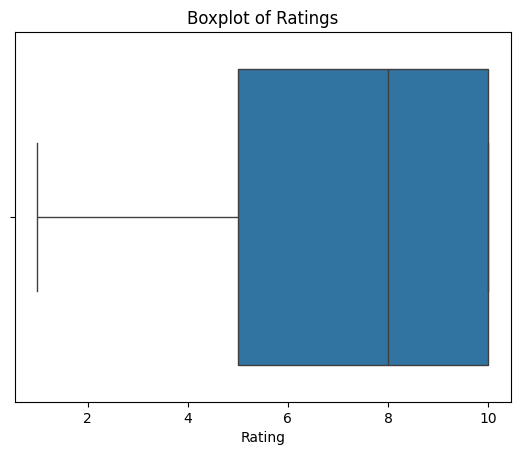

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the "Rating" column
sns.boxplot(x=df3_clean_2006["Rating"])

# Add labels and title
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

# Show the plot
plt.show()

[10.  5.  1.  6.  8.  9.  7.  3.  4.  2.] 

Rating
10.0    37
8.0     17
6.0     15
9.0     13
7.0     11
1.0     10
3.0      9
5.0      8
4.0      5
2.0      1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



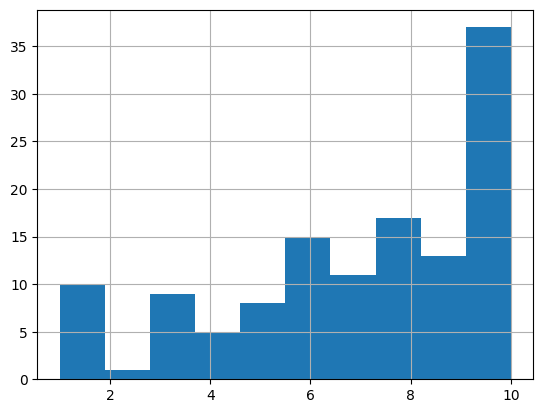

In [ ]:
var = 'Rating'  # Categorical variable example
print(df3_clean_2006[var].unique(),'\n') #seeing how many types of each rating
print(df3_clean_2006[var].value_counts(), '\n') # counting
print(df3_clean_2006[var].hist(), '\n') # making historgram of info


In [ ]:
# Calculate the average review length of a movie review
print(df3_clean_2006['Content'].apply(len).mean())


1240.6904761904761


In [ ]:
# Find the number of unique reviewers
print(df3_clean_2006['Author Name'].nunique())

126


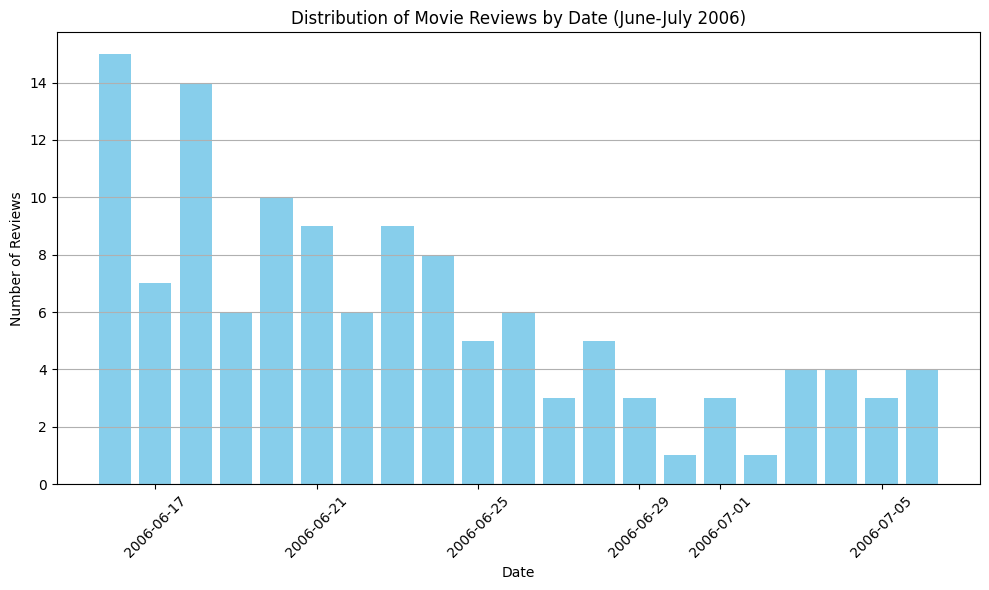

In [ ]:
# Count the number of reviews for each date
review_count_by_date = df3_clean_2006.groupby('Date')['Content'].count().reset_index(name='Review Count')

# Plot the distribution of reviews by date
plt.figure(figsize=(10, 6))
plt.bar(review_count_by_date['Date'], review_count_by_date['Review Count'], color='skyblue')

# Customize the plot
plt.title('Distribution of Movie Reviews by Date (June-July 2006)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

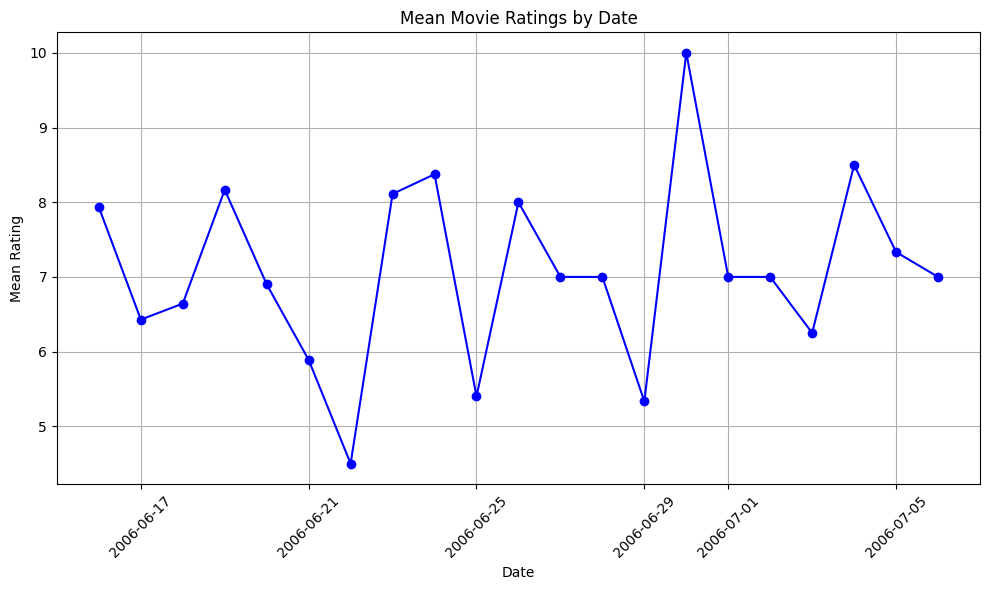

In [ ]:
# Group by date and calculate the mean of the 'Rating'
df_mean_ratings = df3_clean_2006.groupby('Date')['Rating'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(df_mean_ratings['Date'], df_mean_ratings['Rating'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Mean Movie Ratings by Date')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Getting info about data from 2016 - 2025 reviews dataframe**

In [ ]:
print(df3_clean_dec.shape, '\n') # List the dimensions of df
print(df3_clean_dec.dtypes, '\n') # getting data types
print(df3_clean_dec.columns, '\n') # Column names
#There are 195 reviews cause index starts w/1 and all data types are still right

(195, 6) 

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object 

Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object') 



In [ ]:
# Calculate the average review length of a movie review
print(df3_clean_dec['Content'].apply(len).mean())

941.6717948717949


In [ ]:
# Find the number of unique reviewers
print(df3_clean_dec['Author Name'].nunique())

194


[10.  3.  4.  1.  7.  6.  5.  8.  9.  2.] 

Rating
6.0     38
10.0    31
7.0     31
8.0     23
5.0     22
4.0     16
3.0     14
9.0     12
1.0      5
2.0      3
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



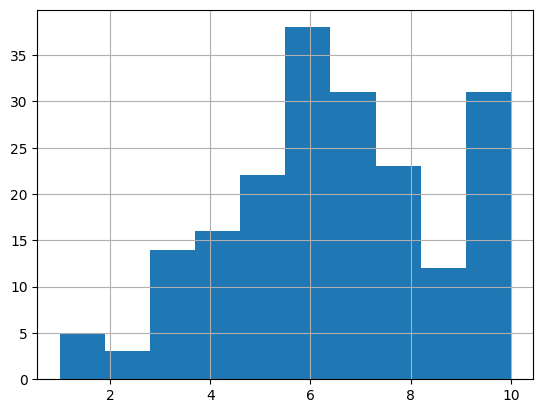

In [ ]:
var = 'Rating'  # Categorical variable example
print(df3_clean_dec[var].unique(),'\n') #seeing how many types of each rating
print(df3_clean_dec[var].value_counts(), '\n') # counting
print(df3_clean_dec[var].hist(), '\n') # making historgram of info


In [ ]:
# Get summary statistics for the "Rating" column
print(df3_clean_dec["Rating"].describe())

count    195.000000
mean       6.533333
std        2.333677
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Rating, dtype: float64


In [ ]:
print(df3_clean_dec["Rating"].median())

6.0


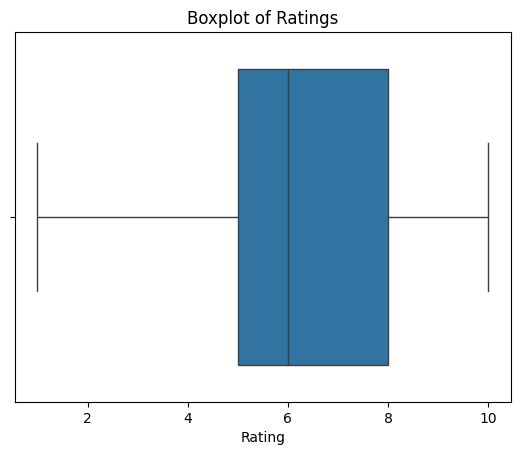

In [ ]:
# Create a boxplot for the "Rating" column
sns.boxplot(x=df3_clean_dec["Rating"])

# Add labels and title
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

# Show the plot
plt.show()

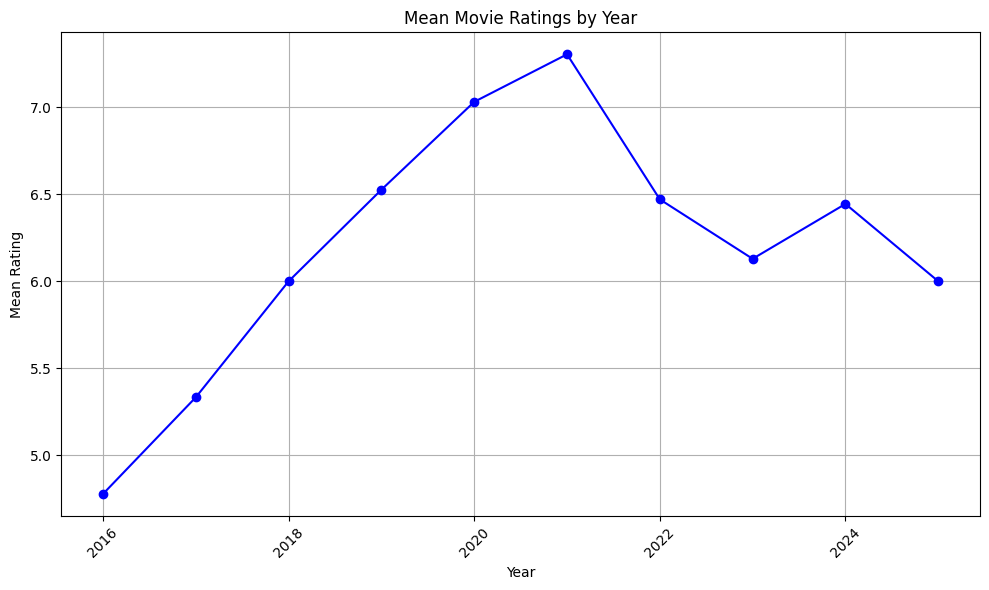

In [ ]:
# Group by date and calculate the mean of the 'Rating'
df_mean_ratings = df3_clean_dec.groupby('Year')['Rating'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(df_mean_ratings['Year'], df_mean_ratings['Rating'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Mean Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

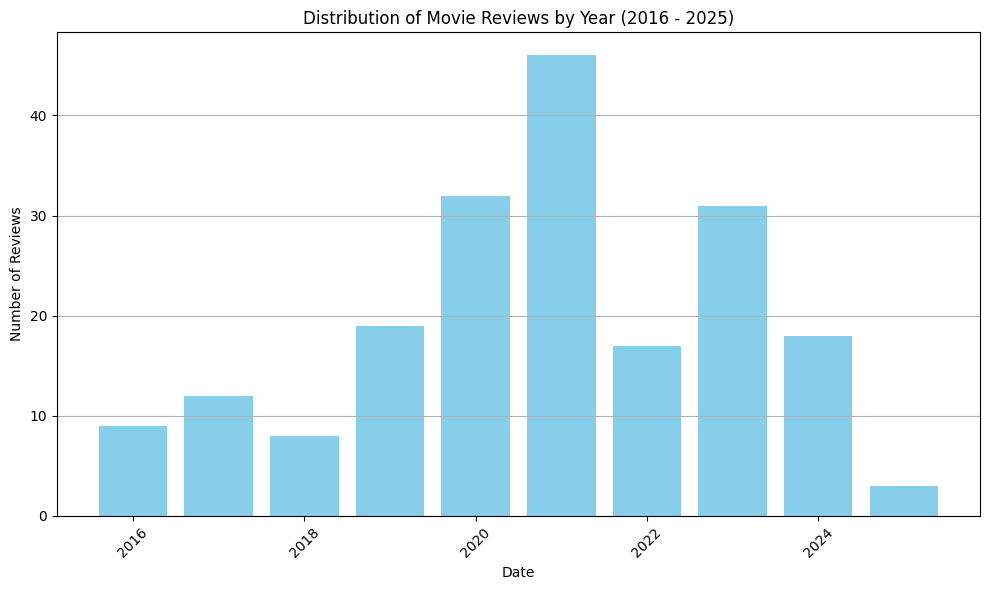

In [ ]:
# Count the number of reviews for each date
review_count_by_date = df3_clean_dec.groupby('Year')['Content'].count().reset_index(name='Review Count')

# Plot the distribution of reviews by date
plt.figure(figsize=(10, 6))
plt.bar(review_count_by_date['Year'], review_count_by_date['Review Count'], color='skyblue')

# Customize the plot
plt.title('Distribution of Movie Reviews by Year (2016 - 2025)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

**Cleaning Fast & Furious 4(2009)**

In [ ]:
#create dataaframe called df4 from data
df4 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/FF4reviews_data.csv', low_memory=False)
df4.head()

,Rating,Title,Content,Author Name,Date
0,7,"Still fast, still furious",No content,C-Younkin,"Mar 31, 2009"
1,7,The Family is back and the franchise is Saved!,Dom Toretto (Vin Diesel) and Letty (Michelle R...,SnoopyStyle,"Feb 23, 2014"
2,7,Great Adventure,When Dominic Toretto (Vin Diesel) is informed ...,claudio_carvalho,"Dec 12, 2009"
3,7,It's nice to have you back,No content,joshrortiz,"May 27, 2013"
4,7,The best of the series by a mile,No content,phatrick88,"Apr 3, 2009"


In [ ]:
#get info on data
print(df4.head(),'\n')
print(df4.describe(),'\n')

  Rating                                           Title  \
0      7                       Still fast, still furious   
1      7  The Family is back and the franchise is Saved!   
2      7                                 Great Adventure   
3      7                      It's nice to have you back   
4      7                The best of the series by a mile   

                                             Content       Author Name  \
0                                         No content         C-Younkin   
1  Dom Toretto (Vin Diesel) and Letty (Michelle R...       SnoopyStyle   
2  When Dominic Toretto (Vin Diesel) is informed ...  claudio_carvalho   
3                                         No content        joshrortiz   
4                                         No content        phatrick88   

           Date  
0  Mar 31, 2009  
1  Feb 23, 2014  
2  Dec 12, 2009  
3  May 27, 2013  
4   Apr 3, 2009   

       Rating           Title     Content Author Name         Date
count     349    

['7' '9' '1' '5' '6' '10' '4' 'No rating' '8' '3' '2'] 

Rating
6            70
7            62
8            58
5            37
9            30
10           28
4            27
No rating    13
3            13
2             7
1             4
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



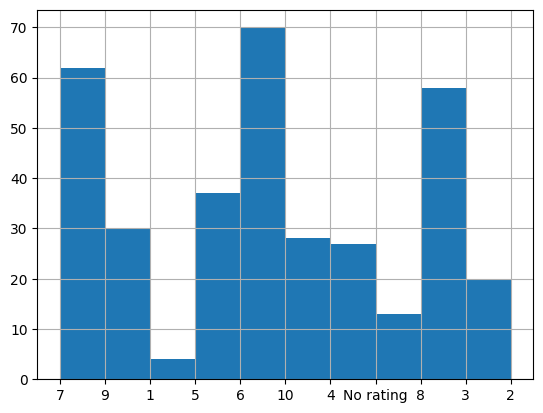

In [ ]:
var = 'Rating'
print(df4[var].unique(),'\n') #seeing how many differnt types of rating
print(df4[var].value_counts(), '\n') #counting them
print(df4[var].hist(), '\n')# making historgram

**Cleaning Missing Data**

In [ ]:
#Seeing how many "No title"
no_title_count = df4[df4['Title'] == 'No title'].shape[0]
print(no_title_count)

0


In [ ]:
# Seeing how many "No author name"
no_author_count = df4[df4['Author Name'] == 'No author name'].shape[0]
print(no_author_count)

0


In [ ]:
#Seeing how many "No content"
no_content_count = df4[df4['Content'] == 'No content'].shape[0]
print(no_content_count) #105 missing the content/text of review, probably spoilers

105


In [ ]:
#Seeing how many "No date"
no_date_count = df4[df4['Date'] == 'No date'].shape[0]
print(no_date_count)

0


**Cleaning Rating**

In [ ]:
df4['Rating'] = df4['Rating'].replace("No rating", np.nan) #changin "No rating" to np.nan so I can then replace those with mean of rating
df4['Rating'] = pd.to_numeric(df4['Rating'], errors='coerce') #chaing rating to numeric
mean_rating = df4['Rating'].mean().round(0) # getting mean of ratings and rounding to whole number
print(mean_rating) # printing the mean rating

7.0


In [ ]:
df4['Rating'].fillna(mean_rating, inplace=True) # changing np.nan in Rating to mean of rating
print(df4['Rating'])
pd.set_option('display.max_rows', None)
print(df4['Rating']) #showing all of them, to make sure all have been changed

0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
5       7.0
6       7.0
7       9.0
8       7.0
9       1.0
10      9.0
11      7.0
12      5.0
13      6.0
14      7.0
15      7.0
16      7.0
17     10.0
18      7.0
19      1.0
20      9.0
21      7.0
22      4.0
23      7.0
24      7.0
25      6.0
26      7.0
27      9.0
28      6.0
29      1.0
30      9.0
31      6.0
32      4.0
33      6.0
34      7.0
35      6.0
36      6.0
37     10.0
38      7.0
39      5.0
40     10.0
41      7.0
42      7.0
43      1.0
44      7.0
45      7.0
46      6.0
47      6.0
48      6.0
49      8.0
50      6.0
51      5.0
52      8.0
53      7.0
54      3.0
55      6.0
56      7.0
57      6.0
58      7.0
59      8.0
60      7.0
61      4.0
62      8.0
63      4.0
64      7.0
65      6.0
66      6.0
67      7.0
68      8.0
69      6.0
70      5.0
71      8.0
72      6.0
73      3.0
74      7.0
75      7.0
76      6.0
77      7.0
78      6.0
79      8.0
80      6.0
81      4.0
82      8.0
83  

<ipython-input-34-5cf663ff174b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Rating'].fillna(mean_rating, inplace=True) # changing np.nan in Rating to mean of rating


In [ ]:
df4['Date'] = pd.to_datetime(df4['Date']) #converting Date to datetime so its easier for analysis
print(df4.dtypes) #checking to make sure it converted properly

Rating                 object
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
dtype: object


In [ ]:
#counting how many reviews per year
df4['Year'] = df4['Date'].dt.year
print(df4['Year'].unique(),'\n')
print(df4['Year'].value_counts(), '\n')

[2009 2014 2013 2011 2015 2019 2020 2010 2012 2021 2023 2017 2024 2018
 2022 2025 2016] 

Year
2009    148
2023     28
2021     25
2020     20
2024     16
2019     14
2010     14
2013     13
2015     12
2011     11
2017     11
2014     10
2022      8
2012      6
2018      6
2016      4
2025      3
Name: count, dtype: int64 



In [ ]:
**Cleaning "No content" in Content column**

In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows
No_4content_rows = df4[df4['Content'].str.contains('No content')]  #find all the rows that have "No content" in content/text portion of review
print(No_4content_rows)

     Rating                                              Title     Content  \
0       7.0                          Still fast, still furious  No content   
3       7.0                         It's nice to have you back  No content   
4       7.0                   The best of the series by a mile  No content   
10      9.0                                       Great movie.  No content   
14      7.0  Oh right we forgot the epilogue....all Furious...  No content   
17     10.0      An awesome kind-of reboot to the franchise...  No content   
19      1.0              A Bugs Bunny Cartoon is More Credible  No content   
23      7.0                          Let's make some money....  No content   
27      9.0                          Can't Wait for the Fifth!  No content   
30      9.0                                       Doms Revenge  No content   
32      4.0                                        I was bored  No content   
43      1.0                                             Awful!  

In [ ]:
# Made dictionary of content which I copy and pasted directly from IMDb wesbite in order to replace it with those rows with "No content"
# Had to do this becasue the reviews with spoilers were blocked from web scraping
FF4reviews_dict = {
0: "Fast and Furious, or 4 Fast 4 Furious if you're keeping count, is a movie you can basically sum up in one sentence. Muscle guys, muscle cars, hot chicks, and incredible action sequences. Not much has changed in the four films other than who the muscle guys wind up being played by but nonetheless, if you're going to the movies strictly to continually watch these things, then not only will this series run forever, but you should have no problem sitting through this fourth flick. Of course the other thing to look at here is the resurrection of Vin Diesel's action star persona, and considering he's been doing movies like ‘Babylon AD’ and ‘The Pacifier’ for the past couple years, you can basically say this is one of his better performances in a real long time. The plot is pretty thin but I'm sure for fans of the first movie it will be nice to see the two leads back playing their roles. Diesel reprises wanted felon Dom Toretto, who after escaping at the end of the first movie seems to have started a new life in the Dominican Republic knocking over trucks. What brings him back to Los Angeles is revenge for the death of his girlfriend (Michelle Rodriguez) at the hands of brutal drug dealers led by Braga. This brings him face to face with the man who infiltrated his gang in the first flick, Brian O'Connor (Paul Walker), now an FBI agent going after the same drug dealers. And wouldn't you know that driving plays a big part in Braga's whole smuggling operation so both Brian and Dom team up, amidst some trust issues, to bring down the drug cartel. Hopefully director Justin Lin (‘Tokyo Drift’) gets the credit he deserves this time around. He's fantastic with these action sequences, not only making them pulse-pounding thrill rides but also letting you feel like you're in the car with these characters. The movie starts out brilliantly with a propane truck hi-jacking that turns life or death when things get out of control and the truck barrels down on the hi-jackers, and then just continues to go full throttle, staging a race on a crowded Los Angeles street and then chases in an underground tunnel shaft. Once these characters get in their cars you won't be bored for a moment. Outside the car is a different matter though. Both actors do what they can. Diesel is adrenaline personified. With his gravelly voice, bulging biceps, and cool, playful way around a line of dialogue, he's a lot of fun to watch. And while still pretty wooden, I admit that Walker has a pretty-boy face and an athletic physicality that makes him a good hero. This pairing worked well in the first movie, sort of like an amateur, yet entertaining, version of the adrenaline-seeking- cop and criminal formula a la ‘Point Break.’ Just after four movies it's all gotten stale and it's easy to see that the cars are the real stars here. The Dom-Brian conflict and Dom's vendetta against the cartel is mostly overshadowed and there isn't much for either character to do when away from their vehicles. Diesel and Walker try but they always seem to be a couple wheels short of competing with the four-wheel drive. ‘Fast and Furious’ deserves credit for doing the key things well. If your expecting much from anything other than the cars then it's a disappointment, but thanks to Justin Lin this has all the makings of a really thrilling action movie, making this fourth flick in the series a little bit better than its predecessors and a lot of fun.",
3: "I loved ‘The Fast and The Furious.’ Cars, ladies, cheesy lines and acting, crazy action = a groovy mix! Fast forward a few years and we finally have ‘Fast & Furious’- the first true sequel! So much nostalgia! Seeing Vin, Paul, Michelle, and Jordana together again was fantastic! You can tell that these characters have grown since the first film. Brian is working on a case with the FBI that brings him in collision with Dom, who is back in the states seeking revenge for the murder of his gal Letty. This entry is definitely a bit heavy compared to the first few but that doesn't mean there isn't fun to be had! The opening sequence and the race at the middle of the film are two highlights! The tunnel sequences were not as good though, CGI being one of the reasons- still enjoyed it though! The F&F franchise isn't really known for stellar acting or writing or even realistic action sequences so it's no surprise that this sequel plays the same way. I think that's part of the charm of these movies, at least for me. Don Omar and Tego were hilarious, John Ortiz was good as the villain though not at all threatening, Fenix was just asking to get owned by that car in the end (what a way to go), and seeing Han from Tokyo Drift was a nice little treat. I had hoped we would see more of Gisele and we do in the sequels! That's a good thing! ‘Fast & Furious’ is a fun, dramatic, action-packed continuation of the franchise with some nice nods to the original that fans will appreciate. The ending got me so pumped for the next one!",
4: "I just got back from the midnight screening of 'Fast & Furious' and I have to admit the movie very much exceeded my fairly low expectations for the film. While the original film was entertaining, it was never a good movie by any means. Let's not even get started on the two that followed. The fourth installment however, is another story. Most of the original cast has come back and seeing them back in action together really makes you realize the F&F franchise isn't the same without them. The chemistry between the three leads (Diesel, Walker and Brewster) is the strongest it's been yet, and I would dare to call several of the scenes 'moving' as a result. Who would have ever expected that from Fast & Furious. The movie does an excellent job of keeping you on the edge of your seat, there's no shortage of action and a story that keeps your attention. The movie starts out in the DR with Vin Diesel pulling off a fairly implausible heist of hijacking a fuel tanker with his new crew. Minutes later, we learn of Letty's murder which in turn basically sets the tone for the rest of the movie as Diesel sets off on an all out rampage to even the score. Like the previous three, you certainly need to suspend your disbelief for the duration of the movie, however I was glad to see they didn't go overboard and kept the special effects and CIG to what seemed like a happy minimum. Anyone who's ever been a fan of the Fast and the Furious series will absolutely need to go see this on the big screen. Even if you weren't so hot for the originals, the movie is still worth a look. In my opinion it's acting, story, plot, special effects are the best of the series so far and almost makes it stand out as a respectable movie. Better yet, they've left the door wide open for 'Fast & Furious 5'. To be continued...",
10: "Fast and Furious was a very good movie that had a darker and more serious tone than any of the prior films in the franchise. I loved seeing almost the entire original cast return and the amazing cars and impressive special effects that are a staple of the series return once again... granted, with a reduced emphasis on the cars themselves. The only real problem I had was that the continuity was broken a bit. *SPOILERS* Why, for example, is Paul Walker back in LA after the ending of 2 Fast 2 Furious? What happened to Tyrese's character? What happened to the rest of the crew from the original movie? These are not huge complaints but they did take away from the experience a bit. It's also evident that this film is a prequel to Tokyo Drift which was a little weird. Nonetheless, great film that is probably better than any of the prior ones other than the first of course.",
14: "So what is Fast and Furious? It's not a remake, or a reboot, and although it would appear to be a sequel it really is ultimately a recap to the very first film...or the second I forget. It has been so long since I've seen the original two films which this one is a direct follow up to. I kind of wish I had watched the first two before seeing this because it may have helped with the overall characters and plot. They do still try to link together not just the first two films but all the movies which I give them kudos for because I actually thoroughly enjoyed Tokyo Drift. So here comes Fast and Furious, barely changing the title from the first one but bringing back the original cast that defined the series. The thing that caught me the most about this film is it is not about car racing anymore. Really the film is about drug trafficking and despite a huge car/truck stunt in the first scene Fast and Furious lacks much of anything fast at all. All the other installments of the series have focused on the cars and the sexy sleek speed of everything but Fast and Furious tries to turn that around by giving it a different edge. Vin Diesel thrives in a Fast and Furious movie like this one or it's predecessors. It even brings out a little bit of actor in him. This is part of the reason I think he has trouble staying afloat in other films because he is Dominic Toretto. They really try to give him some depth in this installment which works okay but you really just want to see him race. I'm not sure he can do much else outside these movies. Paul Walker...remember when he was the IT boy? He returns to his role as tainted Federal Agent Brian O'Connor. Diesel and Walker still have oddly good chemistry together and they work better together as a crime fighting team then racing adversaries. Walker is not much different than he is ever been and just kind of looks pretty and does the bare minimum to stay afloat. Jordana Brewster and Michelle Rodriguez return to their roles in the film very briefly, enough to say they were there but give very little extra to the plot or their characters other than a little bit of sexual tension between Brewster and Walker who are like the power couple of the series. The villain of the film is played by John Ortiz and does a very solid job. If only the heroes of the film had the same depth this movie could have been as good as it's previous installments. Some people feel that the entire Fast and The Furious franchise is simply about cars and hot stars and if that is the only thing that holds this together and makes you want to see it than I suppose you won't be remotely disappointed in this one. The hot faces and cars are still there but without the same level of the street racing that the earlier one focused on. The only issue with this film is that they don't work on the existing characters at all. It's like they take the exact same characters from the first movie and port them into this movie with no continuation of them or growth to them. Diesel and Walker just feel very empty and you keep waiting for more of them. Fortunately the action and the work of director Justin Lin who has previously proved with mainstream films like Tokyo Drift and Annapolis that he can tell a great story without a lot of fluff or frills. There is nothing wrong with Fast and Furious except that it feels rushed and slapped together. It is very impressive that they were able to bring back everyone from the original film for the most part. Fans of the series will likely still be impressed. 7/10",
17: "I was honestly so happy when this movie happened. I am a huge fan of The Fast And The Furious, and sadly, 2 Fast 2 Furious and The Fast And The Furious: Tokyo Drift, did not meet my expectations. I just thought they changed too much. This movie brings everyone back, and the story goes back to where it was born and where it made fans love the sport of drag racing even more. This movie is pretty much about Dominic Toretto. He's a street racer and a thief, who is still wanted by the law and other criminals. He decides it's safer to cut himself off from everyone in his life, including his sister, Mia and his girlfriend, Letty. But after Letty is killed, things need to change. Brian O'Conner, Dominic's old friend, turned rival, turned friend, is still working at the FBI and decides that he'll help Dom get answers about Letty's death. They go undercover to uncover a drug-smuggler, who just happens to be connected to Letty. Overall, I give this movie a 10 out of 10, which in my ratings book is: Freaking Ridonkulous.",
19: "Ridiculous opening sequence where they unhook the tankers on a 4-tanker gas transport rig in the Dominican Republic. Letty is running along the top of the tankers without falling off. Cars and pickup trucks going 70 mph in reverse and hooking up the tankers. Nicely shot, but completely ludicrous. The rest of the film was dumb, too. If Dom loved Letty, he wouldn't have left her in he middle of the night and not contacted her in 5 years. Brian is as awkward as a 15 year old throughout. The premise of driving through abandoned Mexican mine shafts at 80 mph was bizarrely dumb. At one point, Dom opened the door to his Charger and jumped into another car, commandeering it. All the while driving 80 mph in a mine shaft! I am not kidding!!! The ending was equally idiotic. Suffice it to say that prison buses have armed guards and police radios.",
23: "When Dominic Toretto is informed that Letty was assassinated, he returns to Los Angeles to find her killer. His former friend and FBI agent Brian Conner is assigned to capture mysterious drug lord Braga that is looking for replacement drivers, working undercover as his courier, driving from Mexico to USA through the desert. Dominic discovers that Letty was working as a courier for Braga when she was killed and he decides to join his gang to find the killer...... After the awful third movie, and the waning careers of the two leads, it was inevitable that this was eventually going to happen, and even though its lots and lots of fun, its bonkers beyond belief. Films like this are critic proof, they are all about fast cars, explosions, hot women and cool locations. Pretty much like a Michael Bay movie, but with taste. Diesel and Walker are not the best actors around, but their chemistry is undeniable, and they make a great pair. As with all sequels, they try to be bigger and better than the last one, and here it succeeds, because Lin knows these movies are ridiculous, so makes every set piece ridiculous also. So all in all, its a fine movie, totally off its rockers, but it knows it, and embraces it.",
27: "Fast and Furious is another great addition to the already great series of these movies. This movie picks up after 2 Fast 2 Furious which came out six years before this. I am really happy to see the original cast back in the film. These four people are what made this series successful(at least the first one). Toretto and O'Conner must rejoin forces in order to bring down a gang that killed a loved one of Toretto. I don't see what other people seem to see. This move has a great, emotion-driven plot. As sequel after sequel comes out, it seems like the plot has gotten better with all the car racing an afternote. I really liked the acting in this film. Vin Diesel is one of my favorite actors. I was nice to see Jordana Brewster and Michelle Rodriguez after eight years. They still look good. Overall, this is a wonderful movie. I liked the action and the drama. I rate this film 9/10.",
30: "I was reading an article in a truckers' trade magazine,about how the druggies would load up some muscle cars in a 53' box trailer and smuggle these cars into Mexico. Then load up these cars with dope. Then, as they were headed to the border to smuggle the drugs into the U.S.; they would use some kinda jamming or cloaking device so the border agents cant detect them,as the cars drive through a tunnel under the border patrols noses. Im wondering,’ How much does the truck driver make?’ Well done Neal Moritz,Justin Lin,Chris Morgan,Gary Thompson, Vin Deisel,, Paul Walker,Alejandro Pation, Jordana Brewster, Michelle Rodrequez, Gal Gabot ,and Liza Lapira. Alajandro Patino drives the Peterbuilt big rig tanker train. Alajandro Patino is a permanent A list actor!! Michelle Rodrequez,Jordana Brewster,Gal Gabot, and Liza Lapira are hot!!! ---One Truck Drivers Opinion— erldwgstruckermovies.com",
32: "Least of the series has the original stars returning to the series to solve the murder of a mutual friend. Paul Walker turning a blind eye to the wanted Vin Diesel hopes to not only track down said killer but also get in good graces with his boss who seem to think he may have made a mistake taking him back.(I won't say more since to do so would reveal too many spoilers and several people I know were upset that reviews gave away too much-which I don't think is really possible) This is my least favorite of all of the films. Sure the races/chases/action are pretty good in an unreal Hollywood sort of way, but the rest of it just sort of lays there. Its purely by the numbers and fill in the blanks and I'm guessing that anyone who sees this will be way ahead of our stars. Me,I was bored and wondering why I bothered. Its not bad, its just dull. I felt no excitement and wondered why I bothered to run out on a Saturday night to see it. I should have waited for cable.",
43: "‘The Fast and the Furious’ was bad. ‘2 Fast, 2 Furious’ was even worse. ‘The Fast and the Furious: Tokyo Drift’ was terrible. And now, ‘Fast and Furious’ is complete crap! ‘The Fast and the Furious’ series if the worst movie franchise in the entire history of movie franchises. Whoever produces those movies should really stop and re-think his worthless life of producing the most crappy movies of all time. Along with spoofs and horror films, ‘The Fast and the Furious’ series is one of the many genres/series that are absolutely terrible nowadays. A straight shooter with one out of ten written all over it. I f I could, I would give it one out of one hundred. Unfortunately, I can't do that. So, one out of ten.",
44: "Going with a friend on the opening weekend to the local Odeon to see the unexpected revival of the Fast franchise,I was shocked by how poor the print was, with the final sequence becoming unwatchable, due to how pitch black/dimmed the colours were on the print. As we left, I did wonder if the image would look better on disc.2021: Recently reading about a friend seeing F9 at the cinema,it gave me the final kick to pick up the Blu-Ray, and return to the 4th round of the Fast saga. View on the film: Becoming the in-house director after this who nailed the style of the series with Fast 5,6 and 9, Justin Lin & cinematographer Amir Mokri signal the change in direction for the franchise with a thrilling opening failed heist set-piece. Moving at high speed, Lin places a emphasis in focusing on practical kitsch-Action dive stunts across vehicles performed by Dom's gang, rather then the speed of the sports cars. Breaking the disagreements between Dom and Brian, Lin drives in on up-close Action, with a hard-hitting punch-up between Brian and Dom, which spins into an exciting final set in tunnels, with Lin using the confined location in tight wide-shots to heighten the time crunch atmosphere of the final chase. Making her film debut, Gal Gadot gives a very good, feisty turn as Gisele, whilst Paul Walker brings a urgency to cop Brian's conflict over which to take, and Vin walks round completely unaware of what type of flick he's in, with his deadly serious performance (never change Vin.) Joined by future Suicide Squad (2016-also reviewed) director David Ayer doing uncredited re-writes, the screenplay by Fast regular Chris Morgan and Ayer changes gears at a crossroads, via the set-pieces in Dom's drive for revenge, (a regular major theme across future entries) being over the top, but treated with a serious tone, rather then kitsch, and surprisingly few mentions of ‘Family’ in the dialogue, which instead drives a building of trust between Brian and Dom as drive away fast & furious.",
46: "When a crime happens, the fugitive Dominic Toretto and the agent Brian O'Connor need to re team in order to find the same enemy. They will need to work together again, but this will not be easy, since Dominic's trust in Brian is minimum, after all that happened in the past. I was imagining that this movie would be terrible. I liked the first Fast and Furious, but usually when they try to repeat the formula all the time, the result is a boring and too predictable. As an example,I was surprised to see that Letty died. In a too predictable movie, she would be a couple with Vin Diesel again, as Mia and Brian. It was good to see the primary actors from the first Fast and Furious too, since the reason I hated Fast and Furious 2 and 3, was that we don't see Dominic, Letty and Mia, only Brian. In general this movie was okay. Not an incredible thing, but not the worst thing too. I missed a bigger emotion while watching it, but being exactly as the first movie is never an easy task.",
49: "Okay, I went into this thinking, ‘It's gonna suck’ because by definition, I hate car racing movies. But then again, i thought, ‘Hey, this movie made 80 million in the box office, it can't be that bad..’ I was surprised at how good it was. It was much better then expected. A little hard to follow at times, and the directing isn't that good (like a Michael Bay film, it's very choppy.. the director never stays on one scene). The acting was pretty good, and like usual, Vin Deisel is badass. The plot is kind of realistic, which is a plus. If someone else had of directed the movie, then it would definitely be much better. Don't watch the movie if you epilepsy, because you'll be having seizures.. It's also very loud at times, but car racing movies SHOULD be loud. Good use of Dolby Digital surround sound...",
51: "There are times when a movie can be fully overshadowed by its trailer - Miami Vice is one, X-Men3 is another, (although the flaws in that movie will haunt for the rest of my time in this life and the next). Fast and Furious is one of those movies. The trailer far exceeds the movie in terms of action, acting and excitement. I have to make it clear I didn't like The Fast and The Furious, I have never even seen 2 Fast 2 Furious but I loved Tokyo Drift but there I was on opening night in a completely packed out screen one. The movie starts off so well, straight into the action with a good car heist. Then the action stops for what seems like forever so that we can get the obligatory back story of this movies villain. This is a normal process in any movie but Fast and Furious' main flaw was that its two male leads cannot act. They look good running, they look good when they are driving, they look bad-ass when they are frowning but for the love of god don't give either of them more than two lines of dialogue per scene!! After some awful awful scenes with dialogue we were treated to the second of (only!) four car scenes in the entire movie. The race scene should have been filled with great driving stunts and action but it was broken up to much with bad cutting, the insertion of strange CGI mapping effects and was narrated by Sally Frickin' Sat-Nav. I'm sure Johnny-Special-Effects loved making the road map for the audience to follow but seriously, stick to the driving - giving the audience a heads up that Vin Diesel and Paul Walker should take the ‘next right’ really just took away from the excitement of the scene. The dialogue was woefully written and wasn't helped by the cast who really should be seen and not heard. The wittiest quips were sexualised car innuendos but that was to be expected but the smug look on Vin Diesel face every time he uttered one was like watching a monkey figure out how to use a knife and fork. For the love of god Vin you make a reasonable action hero but do not kid yourself you can act or are in the slightest bit amusing. The plot didn't matter. I love my movies but when I go to see an action movie I expect action. I don't expect, especially given the acting talent that we had the pleasure of watching, proceedings to be taken too seriously. Fast and Furious wasn't supposed to believe it was a serious drug crime movie...it was supposed to be an action movie with lots of good car scenes. There were to many gaps between action scenes and these were mostly filled with the most unbelievable bunch of FBI agents, including Paul Walker and some rather amusing scenes of Vin Diesel trying to portray emotion. When the driving scenes came they were quite good, although nothing original was to be seen anywhere on screen and judging by the imaginative title idea of just dropping the ‘the's’ I don't know why I was surprised. The cars, of course where the most gorgeous items on screen, that's right the cars, even those that had exploded and were in flames still had more screen presence than Paul Walker could only ever dream of having. The cars stole the show and when the cars were actually allowed to race they were awesome. I would give the movie 5/10. If it wasn't for the fact that the cars were fantastic I would've been out of there. Skip Fast and Furious and go straight onto Tokyo Drift which had better action, better actors and had at least the common decency to embrace the fact that it was a movie about cars and fun and not pretend to be a drama with a few car scenes thrown in. Fast and Furious failed its MOT. See Vin you aren't the only one who can make a car pun.",
52: "Brian O'Conner is now working for the FBI on a thin leash, with no room for error. When Dom finds out that Letty was murdered, he sets all his morals aside to catch the people responsible. Not only that, but Dom is forced to accept help from the man who betrayed his trust, Brian O'Conner. I've seen this movie three times now, and it never fails to entertain me. After two sequels that weren't up to par with the first movie, they went all out to make sure this franchise was back on track. What better way to revitalize the series than with the return of Vin Diesel. He had a brief cameo at the end of Tokyo Drift, but this was his first movie since the first. I wouldn't call the plot fantastic or anything, but it definitely has more story to it than usual (IMO).The stakes are much higher emotionally. There are some legitimately good twists and turns in this movie as well. But we all know why we watch these movies, the action. Let me just say that they won't disappoint you. There are some exhilarating action sequences in this movie that don't give you time to breath. The opening scene is spectacular and the finale is excellent as well. It keeps the formula of fast cars, hot women, hunky guys, and rap music. I do have to say the action looked far more professional, continuing this trend in 5 & 6. My only carp about the action, is some shaky camera work at times. This is especially noticeable during an exciting foot race between Walker and a criminal. The performances won't win any Oscars, but they are a lot of fun to watch. Paul Walker's maturity shows as an actor at this juncture. He always had presence, but his performance is rock solid in this one. Vin Diesel isn't that great at emotion. He doesn't really do much when it comes to Letty's death like he should have, but he has plenty of charisma and screen presence. It was fun to see him paired with Walker once again. That p******s called Corona that you drink has gotta go though, bro. Craft beer is much tastier. Jordana Brewster does fine with what she had to do, but I felt her storyline with Walker wasn't explored enough. Michelle Rodriguez plays her part adequately as Letty. She had a jail term to serve, so I imagine that's why she was killed off. The villains are pretty weak in this one. They weren't that menacing in my opinion. The ending does a great job of jerking emotions from you. I have to give it credit. This is the definition of popcorn entertainment. If you want a thought provoking film, look elsewhere. If you want over a 100 minutes of exciting action that will make you go ‘F yeah!’ this is your ticket. Action junkies will love this one. I know I did!",
54: "Fast and Furious is the fourth movie in the series, set five year after the original and set before ‘Tokyo Drift’. This time the original cast is back behind the wheel. Michelle Rodriguez, Jordana Brewster, Paul Walker and Vin Diesel. Heading back to the streets. After his girlfriend Letty is gunned down after doing a job for drug dealers (which Dom told her not to do after he wanted out), fugitive ex-con Dom Toretto reignites his feud with FBI agent Brian O'Connor. But as they are forced to confront the same enemy, Dom and Brian must give in to an uncertain new trust if they hope to outmaneuver him. The story of this movie is just plain dumb, its dull and boring! Its not a fast and furious movie at all. Its more of the drama and crime mystery movie. There's only two major racing scenes in the movie in the 107 minute running time. The racing scenes when they do come aren't spectacular they are just dull and boring and we have seen it all before in the previous films. (Muscle car vs Japanese import). Things in this movie are just plain stupid and silly, like the ending where a Subaru Impreza WRX STI can keep up with a 900hp supercharged Dodge Charger! (Whatever). They couldn't even make it look good on film! I know that 2 Fast 2 Furious had silly and unrealistic scenes with an Evo 7 beating a SS Yenko Camaro but they still made it nail biting and look good, that's not the case in this movie. In other words this movie makes 2 Fast 2 Furious look like a masterpiece! Its a shame that I disliked this movie the love the Fast and Furious series a lot but this one just didn't have the passion like the previous films had. See it and make your own mind up about it. But for me it was dumb, dull and boring!",
60: "After a thrilling prologue where Dominic Toretto and his team steal petrol tankers in the Dominican Republic the group breaks up before the cops can catch up with them. Then the story proper begins; one of the team is killed in Los Angeles so Dom risks imprisonment by returning to LA, where he is determined to discover who did it and take his revenge. Using his knowledge of the local street racing scene he traces the killer's car back to drug lord Arturo Braga. Brian O'Conner is also back in LA, working on an FBI in an operation to bring down Braga and his smuggling operation. Inevitably Brian and Dom are soon tearing up the streets as they compete for a position as one of Braga's drivers. Dom wins the position but Brian gets another position after arranging the arrest of another driver. Their first job sees them smuggling heroin through a secret tunnel from Mexico during which Dom learns the killer's identity but their troubles are far from over and neither is the excitement. After a third instalment that saw an entirely new cast racing in Japan it was good to get back to the original cast in the original city. Vin Diesel and Paul Walker have a great chemistry in these films even when their characters are going up against each other one knows they will ultimately work together. For the most part there are no real surprises although it came as a genuine shock when we learn the identity of the friend of Dom that was murdered as the actor playing the part was high up the cast list I won't give any further clues to their identity even though it becomes apparent very early in the film. As one would expect there are plenty of scenes involving cars travelling at speed; these are exciting; in particular the chase through the tunnel under the US/Mexican border. Overall I'm sure fans of the previous films will enjoy this as will those looking for mindless action without any really offensive content.",
67: "In this one. Vin Diesel as Dominic Toretto, Paul Walker as Brian O'Connor, Jordana Brewster as Mia Toretto and Michelle Rodriguez as Leticia ''Letty'' Ortiz. The film also introduces new characters Fenix (Laz Alonso), Omar (Don Omar), Leo Tego (Tego Calderon), Cara Mirtha (Mirtha Michelle) and Campos (John Ortiz). Sung Kang who played Han Seoul-Oh in Tokyo Drift has also made a appearance. We can briefly say that this is the direct sequel to the 2001 film. It begins from where it ended. Brian is at it again he a cop not cop now cop trying tobring down a heroin importer by infiltrating his operation. Director:Justin Lin has done a better thriller We start in Honduras were dom is doing his business robbing a oil tanker with letti But thing go explosive bad So with Brian on the hunt and sniffing round he comes in contact with dom So when Brian gets wind of a job he goes on a hunch to a party finding clues As dom also has grief on his mind he is also on the hunt for a killer but his has him and Brian unite for shared enemy and they are forced to bring him down any way necessary so with La race on the cards for to get a job the two work on a plan even though they don't trust each other so not give away who each other is. Gal gadot this is her first film her character Giselle is a henchwomen for bragga And with honour at stake their is a race but this part is like video game as its goes kind GPS virtual race Bragga his gang try and manipulate certain situations to stay ahead The film focuses mostly on swag, sex appeal, action, hunt and most importantly on the American Muscle cars. Why the film holds my attention is because the film promises on what is says in it's title: Fast & Furious. It's definitely more fast and more furious than the original one. Los Angeles and floors through the Mexican desert. When a crime brings them back to L.A., fugitive ex-con Dom Toretto reignites his feud with agent Brian, Dom and Brian must give in to an uncertain new trust if they hope to outmaneuver him. And from convoy heists to precision stealth tunnels crawls across international lines with close contact racing accidents , two men will find the best way to get revenge: push the their limits and cars they have What a film from start to finish this is the making of the this film series you don't get many film getting better as they get older but this made but my on the seat for every other fast film enjoy the film because I did and the cars I listed out this film rating as you see is 7 and its rating is going up for the rest The Nissan Skyline GT-R R34 that O'Connor 1964 Chevrolet Impala 1769. 1967 Chevrolet C-Series. 1969 Chevrolet Camaro Z28. 1969 Dodge Coronet. 1970 Chevrolet Chevelle SS. 1970 Dodge Charger. 1970 Plymouth Road Runner. 1971 Cadillac Sedan DeVille.",
68: "This movie had in from first moment, I loved the start of Second movie but the start this incredible. The effect in that scenes were mind blowing and some very intense moment and already had me on the edge of seat Brian O'Conner, now working for the FBI in LA, teams up with Dominic Toretto to bring down a heroin importer by infiltrating his operation, While Dominic not in nice place as His girlfriends died in a race Someone was blame and it will hurt get rid of anyone that gets in is way and he is also on run from the police well. I found this one ever more enjoyable then first 2 in the movie, I did skip 3rd one as I going watch that after number Fast 6 or 7 , it won't be soon lol The way they ending the movie, WFT , NOO!, Don't end there! 8 out of 10 great movie",
70: "The latest installment in the adrenaline fuelled The Fast and the Furious franchise, Fast and Furious is quite possibly the weakest of the quadrilogy, but it does manage to dish up in fairly decent portions what made the first three films such a hit with younger viewers. So in a sense this installment like the others will definitely be well received amongst its legions of eager, young fans. If that's all you want to know- stop reading. If you are a more casual film goers, I urge you to read on. Now of all the ‘Fast and the Furious’ films the only one I actually enjoyed was the first in the series. So really I was not expecting much when viewing the film, but I expected better than what I saw. Fast and Furious is not a sequel nor is it a prequel, it is an interquel (a film set between two films in a series), in this case it takes place between ‘2 Fast 2 Furious’ and ‘The fast and the Furious: Tokyo Drift’. Within minutes we are reintroduced with familiar faces; Dominic Toretto (Vin Diesel) and Letty (Michelle Rodriguez), but we are also introduced with what now seems to be the ‘cancer’ for films- excess CGI. This CGI replaces traditional actual car crashes and replaces them with pathetic CGI representations. One particular atrocious scene involves a bouncing flaming tanker rolling down a steep road towards Dominic and Letty. They avoid the flaming death trap in a ridiculous way, but let's get into that later. Now this sub-par effect is caused by Dom, Letty and others attempting to steal a very large petrol tanker. Predictability sets in and the tanker crashes and one of the large tanks of petrol it was moving rolls down a large decline towards Dom and Letty, who are enclosed on the road on three of the four sides. To the left there is the flaming remains of a crashed tanker cab, and to their left a rock wall and behind them a cliff. They have no choice but to speed towards the bouncing tank and drive under it. Normally this would be a moment of tension, but it's not as the audience is aware that they will come out of it alive and well, I mean it stars Vin Diesel they wouldn't kill him of in the first couple minutes would they? I've wasted enough time on this scene, I had better move on. The heat comes down on Dom and his crew after the hijacking and they are forced to flee. One of his crew Chan, who fans should remember from Tokyo Drift decides to go to Japan, while Dom decides to move to Panama. In Panama Don is alerted via a phone call that a friend (who I will not reveal) has been murdered in the USA. In a vengeful rage Dom travels to the states to pursue the murder. The Murder turns out to be a drug lord Arturo Braga. Coincidently this is the same criminal who a now FBI agent Brian O'Connor (Paul Walker) is after. Dom and Brian initially infiltrate the organisation that traffics drugs from Mexico into the US, by loading them into cars and making them zip through an underground mine at the US/ Mexico border. Now keep in mind this section of the border is heavily monitored, in addition to the mine being relatively dangerous to navigate at high speeds. So why a drug dealer would risk millions of dollars of drugs, by trafficking them in the most stupid way I have ever heard of is beyond me. Perhaps they just wanted an excuse to show off some close-ups of cars and Paul Walkers hand on a gear stick. As Dom and Brian's time together increase they become friendlier towards each other, similar to how they were through the majority of The Fast and the Furious. Now I was glad to see this relationship develop in the movie, but was disappointed at the way it was handled. I would have preferred it if Dom was more hostel towards Brian in the beginning than he was in the film, as a far better sense of drama could have been generated. This would have attracted some praise from viewers looking for something more than any of the other movies in the series offered, without affecting fan enjoyment. Overall enjoyment of this movie would be limited only to those who are fans of the first three movies. If a fan of those sees it I can almost guarantee that they will enjoy it. Other audiences will probably not feel the same way leaving the cinema, instead they will probably notice the absurdity of the plot, its poor effects as well as its often flat acting (from Diesel in particular). Hence Fast and Furious receives a 4/10 from me, and I am being quite generous as I think it is still able to appeal to its age group.",
77: "I have watched all the fast and furious movies. This movie is, I think, no better or worse than the other movies of the series. The good thing about the movie is, Vin Diesel acts in it. The bad (or worse) thing is that the movie is such a big cliché. When some character says something, you can just guess what the other character will give as a reply. When we see letty in the first place, we just guess that she will die and dom will run after some revenge. The movie is very expectable from the beginning to the end. Another bad thing is that there are less cars and less workshop scenes than the other fast and furious films. Also, the supporting characters aren't as eccentric as they were on the other movies. The tunnel scenes were really good, which seem to have given some difficulty to the effects people and to the stuntmen. Overall, this movie is just your standard fast and furious movie, no more no less. Just the movie to ask for if you like Vin Diesel, girls kissin', modified cars and some action scenes.",
78: "Before i write anything about the movie the reason they make sequels is for money especially this one since they brought back the original cast. If you like the fast and the furious saga then definitely this is a must see, they brought back the two hottest stars of the saga for the sequel. The plot like usual isn't what captures the viewers attention, its always the cars and hot girls. They reunited Vin Diesel and Paul Walker which is great but we don't want to see the same cars again. Nissan Skyline is a great tuner vehicle but we've seen it before same goes for the American muscle. This one has similarities like the first movie of the series which is the drama scenes which were a lot more than the action sequences. The action sequences done in the car were eye catching but the chase done on feet was unrealistic and brutal, even the first action scene where Diesel drives under the gasoline truck was plain ‘stupid’. The first one was about the tuned up cars and the storybetween Paul walker and Vin diesel, 2nd one was about crime and alittle action, third one was fully about drifting, and now they reunited the hottest stars of the saga to recreate the magic of the trilogy. It has everything except the ‘magic’,it relvoves around the death of Michelle Rodriguez which is already a downfall since she is proabaly the best girl for the job. The critics have bashed this movie, some critics say it's 8thgrader vocabulary used in the script, but lets be straight forward we don't watch movies like this for stories or the never ending drama, if we wanted watch movies like that we'll only watch Oscar nominated movies. Action flicks like these are enjoyed by viewers, scenes that capture your attention and blow you away, making the impossible stunts possible. From what i heard there is a 5th installment which is good news for people who love cars from American muscle to tuned up skyline's. I am excited about the 5th version only if Micheal bay could direct the movie it will certainly have extraordinary chase sequences.If you liked the first three then it's worth a look, don't get overly manipulated by the critics and watch it for entertainment value and don't expect the story to be creative. I wouldn't rate this movie out of 10 but it deserves a 6 just for the fact many scenes could have been improved maybe they cut back on the budget but it's worth viewing it at the big screen.",
83: "This movie starts off with a great sequence - an outrageous, but hugely enjoyable combination of driving, stunt work and special effects, and then goes - well, I'm not quite sure where. There is a story - it's a bit muddled, and told in a way which is a bit muddled. There appear to be things which people do with no clear explanation of why. And all of it takes place at high speed and excruciatingly loud volume. I confess that I've only seen isolated bits of the earlier movies, and I wouldn't know a trans-am from Pan-Am, so maybe I'm not the target demographic. But I like Vin Diesel and Paul Walker and, while I don't have much time for Michelle Rodriguez, I have LOTS of time for Jordana Brewster (or, at least, I would have given the opportunity), so I quite liked this movie despite the fact it doesn't make as much sense as it ought to (and it didn't ought to make much!).",
90: "Fast & Furious shows originality far beyond it's title, enough to put it on top of the series with the first. 2F2F was a decent sequel, but definitely was not an ending point. TD was funny, entertaining, and gripping, but once again was not a good ending point for the series. F&F was a GREAT addition to the series. Enough girls, plenty of fast cars, some good one-liners, good action, awesome driving, great stunts, and an awesome cast. This one had more than enough badass-ery to satisfy me. Overall, I went in expecting something like TD, but came out amazed. Any fan of the series will absolutely love F&F! Some gripes: 1) I was disappointed Han didn't have more of a role, I really liked his style in Tokyo Drift. 2) The GPS-Nav thing added nothing to the movie, it was just some stupid Hollywood cheese that had wayyy too much of a part in the movie. 3) During the race-in, Brian was driving parallel to Dom on the dirt road, then at the end of the road he drove down the embankment to catch up with Dom.... WTF?!??!?! That was a PRIME moment to do an epic jump. 4) I thought Lil Wayne had a cameo.....",
93: "Dominic Torreto is in exile but returns after hearing that his girlfriend, Letty has been murdered. Torreto investigates the murder which leads him to a drug cartel and a man named 'Bragga'. It just so happens that Agent Brian O'Connor is on the case and the two collide....Trying to bring Bragga to justice without killing each other. This isn't an Oscar contender so the acting can be ignored, as the cars, girls and cars...make up for practically all its faults. This film is more emotional than its predecessors as it tries to show a softer side of Dominic and reveal how life is for Dominic's sister Mia. The race scene at the end is definitely worth the wait but I especially enjoyed the 'Qualifying race'...Only the Fast and Furious crew can create great race scenes like this... The franchise is definitely back on track after the horrendous, 2 Fast 2 furious.",
94: "It should have been called ‘The Fast and The Furious - The Dark Tunnels’ or ‘The Fast and The Furious - The Traffic Re-Routers;  Drifting was a big event in FF3 which is a pie cake for everyone in this installation. If you compare all releases on Fast and Furious, the 1st Installation still rocks! Then after that comes FF4, then Tokyo Drift and the least exciting was the second part. Brian O'Connor (Paul Walker) crazily kept on changing his mind which route to take while driving. He did this all the time in the movie. If he reached a dead-end, he quickly routed his car to a new path. Amazing ! The only thing which I think had potential was when they come to rescue Vin Diesel in the end. The writers could have kept it for the next installation along with a fast-on-feet, jailbreak chase sequence. Very few street races, Amazing Direction, very few scenes for Michelle (Laticia/Letty). I feel a bit cheated because I expected to watch Jordana Brewster (Mia) who had not many scenes in the movie. Definitely a good watch!",
97: "First of all, once through the border tunnel--apparently the longest in North America--is enough. Doing it twice just emphasizes how much the tunnel decor is ripped off from the Indiana Jones movies. Secondly, move along the action at the beginning faster, so viewers will not have time to realize the machinery the gas bandits are destroying far exceeds the value of the petrol--oops, this whole thing about the most valuable tankers in world history has me talking like Mad Max! Thirdly, Paul Walker as Brian O'Conner just isn't furious enough. He looks like the sort of undercover cop they'd have in HIGH SCHOOL MUSICAL--which is bad, since this is supposedly a much tougher crowd! If Walker owns a piece of the franchise which requires his continuing presence, at least make him sing every 20 minutes or so!",
99: "Saw this back in Cinemas in '09 & while I couldn't remember much about it until I seen it now after 12 years, it came back to me & by Christ it was ace! The Film follows Brian O'Conner, back working for the FBI in Los Angeles, teams up with Dominic Toretto to bring down a heroin importer by infiltrating his operation. I found the film to be a decent entry to the F&F Franchise! There's plenty of action, hot babes & st hot cars to get you going! It's great for what it is! At 95mins it's pretty good & before films went wk, this is epic as f! I mean, compared to the later entries, it's not amazing, but it's still a pretty good F&F Film! 7/10.",
100: "This movie picks up from where the first movie left off. Dominic(Vin Diesel) and Letty(Michelle Rodriguez) are hiding pulling jobs just for the fun of it but Dom knows that none's safe around him and decides to leave Letty. In the city FBI is trying to get their hands on the Drug-lord (Campos) and Brian (Paul Walker) is on the hunt. Letty makes a deal with Brian to cleanse Dom of all charges and in turn go in undercover as an informant. A job goes bad and she gets killed by the bad guy (Fenix) who works for Campos. Dom goes hungry for revenge and is back on the streets looking for the killer. Brian and Dom team up in catching these bad guys and of course Dom kills Felix. In between all this plot is extreme street racing with big engines and loads of action. The movie is well directed and fully satiates your hunger for action adventure and speeding cars. I just loved the first movie so i always wanted the same cast appearing again and thankfully this one didn't disappoint. Vin Diesel is as good as ever.. his screen presence is phenomenal and rest of the cast is great too. I quite liked the opening car race sequence and the rest of the movie was good enough to keep me glued to the chair. Well in the end Dom gets a trial and Brian as an FBI officer testifies and pleads for dropping of all charges but court finds him guilty and sentences 25 years. Brian and Dom's sister get furious with all this and try to get Dom out and thats where it ends. Another open ending for a possible sequel which makes everyone happy i guess.",
103: "High-octane driving, treacherous villains, challenging predicaments and life and death stakes fuel the fourth entry in ‘The Fast and the Furious’ film franchise. This fast-wheels and sexy-sirens series spun out of control after the Dom-less sophomore entry ‘2 Fast 2 Furious’ then regained momentary traction with ‘The Fast and the Furious: Tokyo Drift.’ Nevertheless, the third escapade lacked Dom and Brian but held up strictly because it was fresher than the second one. Life is back in the right land and hings careening into the home stretch with ‘Fast & Furious.’ Brawny Vin Diesel is back full-time in this one after a cameo in the previous outing. Paul Walker reprises his role as FBI Agent Brian O'Connor who is as smooth with his lies as he is with his cars. Indeed, two other originals encore, principally Michelle Rodriguez and Jordana Brewster. The chief problems with ‘Fast & Furious’ are its formula sequelitis and its unbelievable storytelling. Like most standard sequels, one of the originals has to bite the dust to keep things exciting and this time around it is bad girl Michelle, but she goes out for a good cause. You don't expect a ‘Fast and Furious’ movie to be credible, but the use of the caves as a smuggler's highway through mountains stretches things to blow-out point. The way that the drivers haul booty through these claustrophobic spaces may be hair-raising as hell but it is also terribly unrealistic. Like the previous entry, director Justin Lin and scenarist Chris Morgan strut their best stuff during the first 30 minutes while the last quarter hour suffers. The ending will leave you looking fora fifth sequel. This is the first time that Dom and Brian, who were pitted against each other in ‘The Fast and the Furious,’ square off again and Morgan answers the question as to why the FBI guy let the gearhead go. ‘Fast & Furious’ opens with an action set-piece that director Justin Lin and scenarist Chris Morgan cannot top. Protagonists Dominic Toretto (Vin Diesel of ‘The Pacificer’) and Letty Ortiz (Michelle Rodriguez of ‘Girlfight’)are stealing gasoline tanker cars from a lone trucker in the Dominician Republic. Thief is no picnic for the principals. Dom runs interference while Letty, equipped with a canister of dry ice, freezes the coupling devices holding the tanker cars together so that their accomplices can whirl around bootlegger style and hook on and haul ass away. Things go south when the trucker spots Letty atop a tanker car. He swerves and things get hairy. Eventually, after four tanker cars are heisted, Dom wants Letty off the train. About the same time the driver bails. Letty leaps back onto Dom's car, while the truck flips and a tanker car tumbles sideways down a narrow road at our principals. Dom displays his icy cool demeanor and gets them out of there. The law is down on them in no time and they have to clear out. Letty heads back to America while Dom holes up in Panama City, Panama. One day, Mia (Jordana Brewster) gives her big brother a call and informs him that Letty has been murdered. Dom heads back to the states in search of Letty's killer while Brian recruits him to help the FBI nail a notorious drug smuggler. Brian O'Connor's first scene takes place in downtown L.A. as he chases a suspect across rooftops to get the name of a hood who works for the ruthless drug smuggler Arturo Braga. O'Connor's boss is afraid that he has put himself out on a limb by reinstating O'Connor. Now, the Feds have 72 hours to bust Braga before they are jettisoned from the investigation. Naturally, the FBI establishes surveillance squads around the cemetery where Letty is being buried. Predictably, Dom shows up but keeps well hidden as the funeral is held. He hooks up with his sister and investigates the crash site, discovers traces of nitrometh and sets out to find the same suspect, David Park, that Brian is tracking down. Eventually, our heroes paths cross and they go after Braga with different motives. Before long, Dom and Brian--working undercover again--become drivers for Braga. The action never lets up but it gets progressively more far-fetched until it screeches to a halt in a series of caves threading a mountain on the Mexican/American border.",
106: "This film is pure action fantasy. Pay no attention to the story. This film is for those millions of us who like action movies, especially those that involve chase scenes. This is the 4 th film in the series, granted the third one was from hunger. This makes up for it. Justin Lin directed from Chris Morgan's screenplay. Vin Diesal & Paul Walker are a great team. There will be a part 5. Of the 106 minute running time, I would hazard a guess that 75 of those are taken up by Auto chase scenes. The stunts & CGI effects are excellent. Do not expect a great story, just sit back & be taken in by the fancy heroics of the 2 stars. Ratings: **1/2 (out of 4)++ 78 points out of 100) IMDb 7 (out of 10) ++ **1/2 rating can be considered good in this type of film where the action speaks louder than the story or acting.",
107: "Recap: Unable to stay in the US Dominic Toretto and his gang take their operation to Latin America. But after their latest heist, the hi-jacking of a fuel truck, they begin to feel the heat even there. To save her from the fallout around him, Dominic leaves Letty and vanishes in Panama. But the news of Letty's murder bring him back to the States, in vengeance. Apparently the drug lord Braga is responsible, and coincidently old acquaintance Brian O'Conner is in a FBI task force to bring the same Braga to justice. To get close to him, they must infiltrate Braga's organization that seem to need an endless supply of skilled drivers. Comments: The first in the series was a rejuvenation to the genre, and in some ways even something of a pioneer. Since then a few sequels have been made, none even close to the original. Now the original gang has returned and especially Vin Diesel brings some of the luster back. But what was once new and fresh and thrilling soon becomes tedious when nothing new is brought to the table. This installment of Fast and Furious has a decent story, some good action but brings little new. When the solution to everything is a high speed car chase, it does seem a little simple minded after a while. And it certainly doesn't seem that thrilling as it once did. Yet, it is good entertainment. Vin Diesel certainly knows how to do it. What is unfortunate is the continually small parts Jordana Brewster gets. She might be the most talented of them all (this from previous movies), and got a fatally alluring smile to boot. Even if it doesn't have any new ideas, the old ones is still entertaining. And at the end I almost wished that another sequel will be made. One hopefully with roughly the same cast, but with some new ideas. 7 revved up engines out of 10.",
108: "The 4th installment of the Fast & Furious franchise called Fast & and Furious not to be confused with The Fast and the Furious. Which one of the many dumb things about this movie including it takes place before the previous movie, that Brian O'Connor manages to return to being a cop, and the Brian never gives any reason for choosing a life of crime over one in law enforcement but that he respects Dominic more than himself. Before anything else this movie is a dumb entertaining action movie, but there is remnant of a good story, just remnants. The main characters Brain O'Connor and Dominic Toretto start the movie at odds, but ultimately are buddies and are working toward the same goal, the apprehension of the drug dealer. At its core this movie has a base of a good movie, the apprehension of a drug dealer, Brain's struggle with being the good guy, and Dominic's desire for revenge. The chase for the drug dealer is a good action plot with a twist of who Braga is from my perspective I don't think obvious, and lead to an awesome car chase at the end. This the template for all the action and exciting sequences that you can't complain about. Brain O'Connor is somehow allowed back in the FBI and allowed to work around Dominic Toretto even though he let him go. The whole movie he is working toward the goal of capturing the Braga, who is essentialy the mission, but his desire to help Dominic and Mia greater than any other desire. His motives for these actions don't make any sense, if he really cared about Dom and Mia he would help them have a change of heart. These movies basicly preach that if crime is where your family than crime is OK. Dominic Toretto, a revenge story is pretty standard for any movie, but in this movie there isn't any push back to stop the revenge it also glorifies revenge. Brian and Dominic are very morally gray and they see their actions as good and even pray that God bless their day where they steal $60 million dollars of heroin and hide it. Also Mia is pushing back from Brain for the first half of the movie and all of the sudden they start making out. Though all of this is wrapped around to be positive because I is so easy to pick a part and adds to the already entertaining factor of the movie. The movie includes many awesome car chases, a chase on foot with Paul Walker, explostions, and Vin Diesel rams into the guy who killed his girlfriend with a car. The movie is entertaining, dumb, and stupid.",
115: "I just got home from seeing the newest installment of the fast and furious series.Maybe I'm the only one that caught this or not but if you remember Fast and Furious: Tokyo Drift,the character Han who i remember being killed towards the end of TD...Well surprise surprise he makes a appearance as Han again in Fast and Furious 4,ive looked up both movies and the actors listed as Han on both credits....I'm not anal just thought it was weird to see him again.Over all though thought this movie was excellent and am looking forward to buying it upon its release to DVD.Chemistry between characters really make this movie what it is and thats a blockbuster...",
117: "Every subject is supposed to have a verb. Every film should have a plot. This film is an absolute joke. What's the story here? In fact, what is going on at all? An FBI agent dating a mobster's sister joins with him in bringing down a drug kingpin. Trouble is that there is no story except for a series of car chases and fighting. There isn't even really a semblance of a plot. To placate the youth of today attending movies, writers have just about given up. This is nothing more than 1:43 minutes of utter nonsense. This is a masquerade of film.",
118: "It goes without saying that the Fast and Furious franchise hasn't had a good run with the critics. Yet the films have had a mostly fair run at the box office, so they've gradually been released. The first entry is almost unanimously regarded as the best in the series while the second and third are typically frowned upon. For my two cents, the first and third are about equal while the second is best kept as a distant, forgettable memory. Given that this film is coming from Justin Lin, who directed Tokyo Drift, the least that should be expected are some well shot action scenes involving cars. Though enthusiasts of the series will also be looking for satisfaction to the story as well. Does it succeed? Yes, in most ways. The film opens with a bang as Dom, Han (from Tokyo Drift) and a couple other unknowns to the series attempt to steal some gas tank trailers off of a truck which, needless to say, doesn't go without a hitch. After this and a quickly filled in plot piece, we find out that Letty gets murdered and Dom naturally seeks revenge and returns to the U.S. With this and a current assignment, Brian O'Connor (from the first two films) is brought into the mix as he attempts to go after the same people Dom hunts down. The premise is decent enough with skepticisms and indecisiveness playing a large role between the characters. Speaking of the characters, one area of concern fans of the series might have is how well they're still executed and fleshed out after nearly ten year absence from each other (in regards to the film's release dates). Fortunately, the main cast mostly pulled off fair enough performances to stay convincing enough, though it isn't without some melodrama here and there. Fortunately, these moments aren't too frequent and don't hinder the film all that much. Diesel manages to pull of the usual 'just decent' performance that he's had in practically all of his films. Walker actually feels like the most fleshed out character and comes off as a better performer than Vin. As for the supporting cast, they're all just fair at best, with only one or two performances any better than that. But since this film is called ‘Fast and Furious’ and is part of that very franchise, what most people will likely expect going in is for it to be, well, fast and furious. In this sense, the film does succeed quite well. Credit definitely has to be given to Lin for the action scenes involving the cars. The action in these parts are frantic and very exciting, with plenty of awesome, speeding cars to add adrenaline to these scenes. If there's anything you'll want to do at the end of the film, it'll be to get in your car and start shattering the speed limits. What Fast and Furious does best is give you an adrenaline rush during its action scenes. The film lives up to its name and will give those wanting some great car action sequences something to enjoy. When action isn't the focus of the film, it's far easier to find issues and be a bit turned off. But if you're a series fan you should be able to enjoy most of what the film offers and will likely walk away quite satisfied as I did. The first and third films are still my favorites in the series, but this installment is about as good as the first film and is miles above the laughable 2 Fast 2 Furious.",
123: "A fun thrilling ride as per usual for The Fast and Furious franchise. This film has some minor pacing issues and makes a few mistakes when it comes to plot decisions. I think the plot was really strong in the first half of the film with the surprise of Letty's death. You start to see the friendship and the bond that Brian and Dom used to have reform until the tense that builds when we realize that Letty was working for Brian and Dom freaks out. I think it was a great use of tension until they didn't continue anything with it once the scene cut away. The love story of Brian and Mia in this film is very weak as we don't see anything about how that reforms we just see them randomly start making out in the kitchen. The antagonist is basic and weak in my opinion. We know nothing about him besides he is a drug dealer and he is the reason Letty is dead. He should've had more depth in my opinion. I'm also not sure why these films seem to clock out at 1 hour and 45 minutes instead of taking a few more scenes and giving some more depth to these characters. That or cut down some of the unnecessary junk and replace it with depth. Stop giving us John Wick antagonists. Dom on the other hand has some good development as he finally decides to stop running. Brian decides to finally get his own code straight and start helping his friends and family. Other than that the cinematography in this film is definitely at an all time high for the franchise. The score has also improved. 6/10 STARS.",
126: "This review contains spoilers. Fast & Furious or Fast & Furious 4 is the fourth installment to The Fast & Furious franchise. The movie is a sequel to The Fast and the Furious: Tokyo Drift but is more of a direct sequel to 2 Fast 2 Furious. The movie features Paul Walker and Vin Diesel as they reprise their roles of Brian O'Conner and Dominic Toretto respectively. The crew from the first movie confront a drug lord called Braga that wrongs both Dominic and Brian. The plot of this movie is incredibly incomprehensible. Many events in the plot simply happen without any reason or the flimsiest of reasoning. This movie's plot is an excuse to show car chases. The story keeps up the action at the expense of the plot. An example of this is in one car race, Brian is knocked out of the race. He is able to use his FBI connections to re-unite with Dominic Toretto by taking another person's place. The other characters and even the villain simply accept this and allow it to happen. The main story of Letty's murder is not well done. This story feels incredibly flimsy and the audience does not even see the murder happen. It is simply in a flashback scene that is told. I understand that the movie wanted to use this event as the reason for Dominic Toretto's mission but it felt incredibly forced. The finale of the movie improves the rest of the movie. With an explosive finale and the story being wrapped up, the movie concludes in a satisfying way. This movie did set up the rest of the series well and this can be considered this installment's strength. I did look forward to the other future installments because of this movie. The movie ends with the crew assembling and busting Dom out of a prison truck. I do not recommend Fast & Furious. This movie's plot is a jumbled mess. The only redeeming factor for this movie is its place for the rest of the series.",
128: "Its fast, its furious, its also ridiculous, stupid, and immoral. If you approve of torture, criminals who are good guys, cops who act like criminals, and organized criminals who kill their successful employees, well, heres the film for you. Vin Deisal plays the most anti-heroic hero I've seen in recent years. The fact that he is an unrepentant pirate is ignored as we are supposed to feel sorry for his incarceration at the end. But of all the scenes, the one where the crime boss tries to kill the successful drives who deliver the drugs. Why would they do that. Its an echo of a similarly ridiculous scene from the Dark Knight but this guy doesn't wear a scared smile. How did Hollywood get so out of touch with criminal behaviour. Anyway, check your brain at the door cause this one is remarkably senseless, and pointless and idiotic etc.. Its not all bad. The action is pretty cool at times, though you can tell the stunts are fake.",
131: "There is a lot of sparkling humor in this series, it can be disassembled all into quotes: ‘Why are you staring at her? - I'm not staring! - Are you one of those who prefers cars to women? - I am one of those who can appreciate the beautiful shapes in any model!’)) Even after such a difficult case, when they had to lick their wounds, when life really hung in the balance, these desperate and reckless guys were also joking: ‘It's time to start robbing banks, less fuss, but more money!’)) The finale of this film is already the beginning of the next one. At first I was afraid that I would not see Vin Diesel on the screen for a long time again, since his character is in a rather delicate position at the end of the 4th ‘Fast and Furious’, he is in uniform and handcuffs ... But with friends like him, nothing is impossible...",
133: "Director Justin Lin has a distinctive thrilling visual style. The opening sequence of his ‘Fast & Furious’ is an amazing adrenaline rush. Dom (Vin Diesel) and his girlfriend Letty (Michelle Rodriguez) highjack a cargo truck careening down a ravine in the Dominican Republic. Dom, unflinchingly guts out a crazy maneuver that saves himself and Letty from fiery death. This establishes the tone for ‘Fast & Furious’: extreme and full throttle. Vin Diesel and Paul Walker reunite in this satisfying re-energizing of the franchise. Justin Lin generates spectacular eye candy: strong heroes, slick cars, gorgeous women, intense action, and some to the wildest high speed sequences. The soundtrack is pretty hot, too.What is interesting: this time around Chris Morgan's story is about vengeance. What works is the dynamic chemistry of Diesel and Walker. Diesel is not breaking new territory. He plays to his strength as the powerful dark hero, who follows a code of honor. Paul Walker is a pleasant surprise. He infuses a force and charisma in Brian O'Connor. Walker has become a stronger actor since ‘The Fast and the Furious’. This time around he and Diesel are true screen partners. Theirs is a partnership of friction, brotherhood, and ultimately of respect which grounds ‘Fast and Furious’. In one scene former girlfriend and Dom's younger sister Mia (beautiful and strong Jordana Brewster) asks why Brian (Walker) let Dom (Diesel) go 8 years ago. Brian tells Mia it's because Dom taught him: ‘Nothing matters unless you have a code.’ Brian also confesses that he is still trying to find his own code. After Dom's stunt in the Dominican Republic, the authorities are closing in on him. To protect the love of his life, Letty (Rodriguez), he leaves her the money and disappears. However, while in exile Mia breaks the news to Dom that Letty has been murdered back home in Los Angeles. Meanwhile, FBI Agent O'Connor is hunting down the mysterious drug cartel kingpin Baraga, who is able to move large shipments of narcotics across the border with his elite drivers. Brian is also tracking down Dom, who he knows will come back to Los Angeles because of the personal tragedy. Dom returns home just flying under the FBI radar. He has Mia show him where Letty was killed in a car crash. Dom discerns that Letty was brutally murdered, and that the murderer left a distinguishing signature. Mia pleads with Dom to let this go: this will not bring Letty back. Dom sullenly declared, ‘It's already too late.’ He intends to kill Letty's murderer and find the man ultimately responsible. All paths lead to the mysterious Baraga. So Dom and Brian's destinies collide as they compete as drivers for Baraga's right hand Campos (slick John Ortiz). That race too, is another spectacular mind blowing ride through the trafficked streets of Los Angeles. Okay much of ‘Fast and Furious’ is predictable and formulae; however, Justin Lin does so with amazing style and verve. He keeps the action crisp and vibrant. Diesel and Walker are solid heroes to cheer for. Bad guys Campos (Ortiz) and Fenix (ruthless Laz Alonzo) are completely despicable. Jordana Brewster is the right blend of tough and smart as Mia. Surprisingly good is beautiful and enigmatic Gal Gadot as Gisele, who has a soft spot for Dom. ‘Fast and Furious’ is a high speed vengeance tale with charismatic heroes Diesel and Walker. Director Lin keeps our attention with hot cars, hot women, and spectacular stunts. ‘Fast and Furious’ is not going win any awards, but it is thoroughly entertaining.",
138: "This movie had a good plot and had good actors. The problem with this movie was that it didn't have enough great car chases and the car chases it did have were uncomfortable to watch as the camera moved so fast. They also used too many special effects. This movie got a 6 because it was interesting to watch. It was pretty exciting (the opening scene for example) but not what I was looking for when I went to the cinema. I wanted a Fast and Furious movie with lots of great car chases. Also it would have been better if it didn't have the camera move so fast and so often on the car chases. It was hard to follow what was going on and it gave me a bit of a headache. The movie wasn't all bad and had some good parts but I think numerous people would be a bit disappointed by this movie.",
139: "Firstly I would like to state that this movie is after 2 fast 2 furious. This movie picks up after 2 Fast 2 Furious which came out six years before this. Tokyo Drift: Was the unwanted third instalment that had Bow Wow and took place in densely populated Tokyo which frankly is not the place for an American action film. Fast and Furious is another great addition to the already great series of these movies. I am really happy to see the original cast back in the film. The cast did a great job. Vin Diesel Maintains his ill-tempered, ‘I'm gonna kill you if you make me angry’ character. Paul Walker, although not a very good actor, played his part very well.",
144: "This is my first review, remember that! Feedback? Btw, checking the spoiler box just for the safe of it. So, i know this movie is about racing and cars etc, but let's get serious: There is a big minus in this movie for me. Almost 90% of the time was spent in cars. I know this movie should be about that, but after the first one i really didn't feel like watching the next one. The people (Actors) was great. Both in and outside the cars. The story line i really enjoyed too, or at least most of it. Had some actions witch i like, but should have more of it! Got a bit of track sometimes but i enjoyed it anyway. My score is just a 6, but if you are into cars, racing, or both i recommend this movie to you. Because it had some really good things!",
147: "Fast & Furious is the fourth film in the series. It definitely makes up for the bombs that were 2 fast 2 furious and The Fast and the furious: Tokeyo Drift. I think though, that the newest film is flawed. I lost track of the new film. I also lost a bit of interest in the last half hour. I thought that there was too much action for a Fast and the furious film. There is more action in the opening scene than in the rest of the trilogy. I've never really thought of them as action films, I don't know what they were. I will admit that I liked the new film, but it wasn't really worth the 6.7 that it received. Also, the dialog is poor. Like in most action films, but this film goes a bit farther. I appreciated how the original cast returned, but I didn't really appreciate the film much. Though it was better than the last two films, it wasn't fantastic. it wasn't as good as the first one either. The film just didn't feel like a Fast and the furious film. It just felt like an action packed vendetta that featured cars. I didn't feel The Fast and the furious in it. It was just a noisy, action packed film that featured cars. It would be a 5, but I liked it because I appreciated that the original cast returned and it was somewhat entertaining. It's a **1/2 out of ****. Despite it's flaws, it somewhat works. The Plot: In the 4th film of the popular series, Dom reunites with old acquaintance Brian O'conner when a loved one dies. The two try to track down the killer.",
150: "Review:It's really more of the same stuff from the first three movies with the cars. So nothing really new. However I am glad that we finally got an actual direct sequel to the Original movie with The Four Main Stars returning (Diesel, Walker, Rodriguez, and Brewster) Takeaways: -The Four main characters of the first movie are back and reunited!! Yay! Well that's actually a little misleading, because SPOILER........................................ Letty (Michelle Rodriguez) is seemingly shot and killed in the first 10 minutes of the movie! This of course sets that whole plot in motion, and causes Brian Dominic and Mia to reunite to track down the guy responsible -The whole cast is great again, and it's like they never even left! -Vin Diesel is Back!!! Dominic Torretto was still Street racing and still robbing things with Letty. They have been hiding in the Dominican Republic with new comrade Han Lue (a returning Sung Kang. This movie took place before his death in Movie 3.) however Dom is angry after Letty is killed and he is going after the man who killed her for vengeance. He strikes a deal with Brian O'Connor to help bust the criminal operation that Letty's killer is a part of, and in exchange, Brian will make sure Dom gets a pardon and pass from prison for his help. Dom doesn't care about not running, until he finds out that Letty was secretly working with Brian to get Dom's Criminal record wiped, by investigating the crime gang. That was what May have gotten her killed. -Also from this point Foward, Vin Diesel is now one of the guardians of the franchise. Vin Diesel has more involvement with the franchise as series Producer and not just as a Star. -Paul Walker nails it again as Brian! Brian O'Connor is now an FBI Agent tracking down the car crime gang, responsible for Letty's murder. He must also redeem himself in the eyes of the family that he betrayed. At first Dom and Mia want nothing to do with him, because he broke their trust years ago, when he revealed that he was an undercover cop investigating them. When they all team up to get Justice for Letty, Brian eventually reconciles with both of them and he also restarts his relationship with Mia. -Gal Gadot debuts as Street racer Giselle Yashar. -I love that Dom and Brian had a Race Rematch. Though we don't know who actually won lol. -Letty is avenged when Dom shoots down her murderer. He then decides that he is Done with running and with crime, and turns himself in, with the hopes that Brian can fulfill his end of the bargain and clear him. The ending was sad when, the Judge could not fulfill Brian's request and give Don freedom and he sentences Dom to a long time in prison. Brian is furious that the Justice system failed Dom, so he and Mia decide to bust him out of the prison transport. As a result all three of them are now in hiding. Conclusion: it is a sequel that puts a step step in the right direction, and starts a good action packed Brian/Dom/Letty storyline that concludes with the 7th film.",
163: "The one-two punch of Vin Diesel and Paul Walker return to the streets of Los Angeles in the sequel that essentially turns '2 Fast 2 Furious' and 'Tokyo Drift' into side stories or spin offs. After Vin Diesel left the series, no one expected him to ever return. Then he did... at the end of 'Tokyo Drift'. The movie itself isn't as good as 'Fast Five', 'Fast & Furious 6', 'Furious 7' or 'The Fate of the Furious' but it's the movie that set the plot in motion for the installments to come. Michelle Rodriquez's character begins a tremendous story arc from being presumed dead, to deemed still alive, to losing her memory, etc. Paul Walker's Brian is left to repair the damage with Dom and Mia from 'The Fast and the Furious' from 2001, where they learned he was an LAPD cop working undercover for the FBI. Tensions between Dom and Brian are high when Dom learns Brian was working with Letty to go undercover. Dom later learns Letty was doing it in exchange for Dom's freedom. The movie features in my opinion the greatest street race of any of the 8 movies. The Los Angeles 4 car race to see who will drive for Braga is incredibly well done. It's also the rematch between Dom and Brian from the original's drag race.",
172: "Dominic Toretto (Vin Diesel) and Letty (Michelle Rodriguez) are stealing gasoline at the start of this film with Han Lue (Sung Kang) from the Tokyo Drift film. The cops are close on tracking Dom down and he decides to leave Letty and only to find out sometime later that she is murdered, on which leads into Brian O'Conner (Paul Walker) path to find a common enemy. If having watched the other fast and furious films this one takes over as the third movie of the fast and furious films. When making more than three films off one film it seems like they tie the fourth film in with the others somewhere to make the plot make sense. Along in this one is all about fast cars, fist fights, and chase scenes. Since all the characters are in the first movie, it makes this movie better to watch as if having replaced the characters with new actors as done with some films that have more than one off of the first film. Having watched the first film of the fast and the furious, you should check this one out because it might intrigue you as much as the first film did. Also this movie stars Jordana Brewster as Mia Toretto, Dominic's sister.",
175: "I'm sorry but this film was a huge let down... The plot was lacking and not very original (catch a drug cartel guy...again). It was great seeing Vin Deisel back in the movie but overall the movie was missing the biggest thing that these movies are about, COOL CARS!! The only decent cars in the entire movie are the ones that Dom's sister drives, Dom's dad's car and one that is is shown driven twice my a supporting actor. I feel they went the completely wrong direction with this movie and forgot about what we all go to see Fast & the Furious films for, sick cars and action packed racing. Hopefully they will come out with another one when they have remembered what the movies became famous for. I would not recommend paying to see this in theaters, this is definitely one to rent when it comes out on video and only if you feel like spending a few bucks to see the Vin Deisel/ Paul Walker combination back in action.",
180: "When an oil truck hijacking goes wrong, Dom Toretto (Vin Diesel) is forced to leave his girlfriend, Letty (Michelle Rodirguez) and his current crew. However it is not long until he is brought to Los Angeles in order to infiltrate a high speed delivery service under the control of Ramon Campos. At the same time, Brian O'Conner (Paul Walker), an FBI agent, has been following a trail of drug deliveries and his investigation leads him to Campos. A sequel to 2 Fast 2 Furious and a prequel to Tokyo Drift, Fast and Furious brings back the cast of the original to give the series a reboot of such, as if Tokyo Drift did not attempt the same feat already. As such, Fast and Furious is very much on par with the first two films: it goes back to home territory in America, and ditches the drifting for pure speed racing. Though there is only a single race in the entire film with various chase sequences, so the main appeal of the film, street racing, is not entirely utilized to full effect. Nevertheless, Fast and Furious does attempt to tell a reasonably interesting story. Reasonably because it never really works by the film's end. The story does not take long to give an emotional pull for the audience, but it pans out rather uninterestedly. Toretto and O'Conner have their own agendas' in the main story arc but it becomes far too neatly wrapped. Any calamities brought about by the first two films, such as O'Connor's betrayal of Mia, are brushed aside and given far too conventional, and easy explanations. Make no mistake, Fast and Furious is all about style over substanc The acting department is not entirely better, but credit must be given to a cast that does indeed try to get the film's feel right with their respective characters. But neither Rodrigruez, Brewster, or the main two, Walker and Diesel, feel anything more then caricatures. And this is a great pity as the script wants to give them more depth but it becomes overshadowed but moderate acting and a weak attempt at story telling; an average script with some weak dialogue doesn't help matters for the actors either. Though while the film lacks depth it does make up for in its method. The entire film oozes sex appeal from the main cast, the many scantily clad women engaging in rather intimate situations, and the lineup of vehicles. The latter does not play as much of a visual importance as seen in Tokyo Drift which is an indication of the film's more character driven narrative. Car sequences mainly revolve around chases with only a single race event taking place. While races would have made for more exciting set pieces the chases do their job at entertaining. Credit must be given to director Justin lin, who provides some stunning cinematography. He is also quite knowledgeable to invoke symbolism into his filming style for a few scenes. One such has O'Connor, on foot, chasing after a man: the scene is shot in quite a jumpy and jagged manner. However the car sequences are far more smooth, as if the main characters are more in their element while riding a car, then they are as themselves. There is no sex or nudity, beyond two focuses on two different sets of lesbians kissing and fondling and many provocative outfits and dancing. Violence is never intense but the car sequences show enough wrecked damage. Language is kept down to mostly scatological terms with no hard swearing. It might be clichéd, but Fast and Furious is both fast and furious though it becomes painstakingly obvious as the film develops that it lacks self-control. It is great to see the old cast return but it all feels like a rather forced effort to relive the glory days of the original. The story tries too much to make all characters comfortable with one another; the acting is never up to standard; and there is sadly only one race scene. The director is really the only person who kick starts the films engine: it is a decent film, but it requires a good load of tuning if it wants to score big.",
181: "Fast & Furious is the fourth installment in THE Fast and THE Furious saga. Apparently the title has painted itself into a corner, and taking out the two ‘The's’ constitutes the title for a new installment. But getting past that this movie is basically about what you would expect from this series: Fast cars, sexy women, tough guy mentality E.T.C. Except here's something exciting: The whole original cast is back in action for the first time since the original movie. Vin Diesel, Paul Walker, Michelle Rodriguez, and Jordana Brewster! The plot very basically involves Dominic Toretto (Diesel) wanting revenge on one of his enemies, and in the process has to re-team and form an alliance with his betrayer Agent Brian O' Conner (Walker). That's about it in the plot department. The rest of the movie is full of chase scenes through L.A. streets, Mexican deserts, secret tunnels, and many boring talky scenes between the characters. When Fast & Furious isn't getting bogged down in all the boring dramatic scenes, it's actually a very entertaining movie. The racing and chasing car sequences are exciting and well filmed, and you can really tell a lot of effort and stunt work went into making these scenes exciting. The film opens with Dominic and his cronies stealing giant oil tanks from the biggest tanker truck you will ever see on-screen or in real life. All of this as Michelle Rodriguez is hanging from the side of the truck, an inch away from death, and Dominic comes to her rescue. The races are what makes the movie enjoyable, just like any of the other Fast and the Furious titles. The original movie was an entertaining flick, I remember 2 Fast 2 Furious being awesome (Although I was 12 when I last watched it), and Tokyo Drift, well, I've never seen it. However the real draw-in for this new installment was the return and re-pairing (pun intended) of Vin Diesel and Paul Walker, along with Rodriguez and Brewster. It is a welcome return for them in the series and they make this entry memorable. When you get to watch Diesel and Walker race cars with nitro-power for the first time since 2001, you'll be gripping the edge of your seat. However there are quite a few problems with Fast & Furious, although they are very obvious. The acting is not too good, the dialogue is just plain bad and there are way too many talky scenes, and the plot is thinner than construction paper. Whereas the action scenes are entertaining, the dialogue scenes are stiff and dull. There are way too many of them, and most of them just fall flat due to the bad lines and the dead acting. Diesel and Walker both make cool tough guys on screen, but that does not make their technical acting skills any better. They are just dead weight when they're not behind the wheel of a car, and that's just plain disappointing. As for the plot...what plot? I barely even noticed it until the ending and at that point I was confused by what they were doing in Mexico. I also barely even realized John Ortiz was the bad guy until the ending as well, which is obviously not a good thing. That means that except for the movie's main twist (Which takes place in the first 15 minutes), I barely even noticed that there was a plot at all. Now I know you don't go to see a Fast and the Furious movie for the plot, characters, and acting. But if all of those details were better then Fast & Furious would have been a much more satisfying film as a whole, and there is nothing wrong with that. Overall Fast & Furious accomplishes what it set out to do. Which is to entertain you with slick chase/race sequences, incredible stunts and special effects, and the cool presence (Not acting) of Vin Diesel and Paul Walker. Fans of the series will probably enjoy it. I enjoyed it for what it was and I can't even call myself a fan of the series. I give Fast & Furious a good 3 out of 5. It's a fun blockbuster movie that entertains you when it doesn't talk too much.",
184: "It's say Brian is back working for the FBI and the movie he does but in the first movie he worked undercover for the LAPD. And what gets me is when they blame Brian when it was the FBI Agent Stasaik. That gave the go order to arrest Braga/Campos.",
191: "After a pretty good debut movie with The Fast and The Furious the two follow-ups were steps back for me. Here the franchise gets started again for what we now know it for. Decision to bring both Brian and Dom back is what makes this one really work. While the villains aren't as strong here, Vin Diesel and Paul Walker really make this fun to watch with the dynamic the two are having. The twist with who is Braga isn't quite pulled off here, I thought this was really predictable but still the car chases and action scenes here are fun and make me look away from the little flaws the story has. So this really was about getting back in form for the three great movies coming next to the franchise.",
192: "FAST..........FASTER and.......FASTEST.........all three words describe this one helluva action packed n pacey roller coaster ride........... The Movie opens to an exceedingly amazing action sequence where Dom n his friends, including Letty try to do what they are best at.......yup u right heist.........WOW!!! what a scene. Right after that the movie takes a serious path for a short while. Where Dom leaves Letty sleeping n goes away from her n goes to Panama. That's where he receives a bad news about someone's death(i won't disclose it) but it was a shock.......coz dat was d best character in d series. He then sets out to track down the one responsible. In comes Mr O'Connor looking like that something has changed and believe me it has changed for the better This 'New Model, Old Parts' is working. The action sequences are perfectly shot, Direction is cool, acting was amazing, Vin was cool as ever, the jokes were on the right place and in the right proportion. I thought it was better than Fast And The Furious(part 1). Although in the fast paced movie the script wasn't given much emphasis. But who needs a detailed script if the screenplay is damn good and can keep you on the edge of your seat. I go for 8 out of 10 for Fast and Furious 4.........The Fast just got Faster.....and how. GO WATCH IT!!!........coz u won't regret......",
193: "In this 4th installment of the franchise I give it 6 stars because as I'm sitting here watching this I'm wondering, why? For some reason this one wasn't all that exciting to me. yes the guys were back together again(Toretto & Brian), here was plenty of action but the stunts in this installment were to stunt like. From the window stunt, car exchange, things like that were OK I guess. But now I'm looking at this and I'm wondering like how can they make this better. I'm a rue believer in when you make a great film unless there is an continuation of the movie there shouldn't be any more added to me it only cheapens the brand. Tokyo Drift was OK because it kind of added or introduced something fresh(the drifting) to the franchise. I also see that in this one the original director was back on board. I'm not understanding how Hanz came back in this installment ... I thought it was much later on in the franchise but anyhow. That's it for this one. Oh but I will say that the installments that came later with the Rock did or was better than 4 ... OK now I'm off to watch the 5th installment, I don't quite remember what it was about but I will find out soon enough. Fast five is what they called it. lol",
195: "I loved this movie. So much things in it that make me wish that all the Fast and the Furious movies had these two in them. Towards the end of this movie, Dom gets sentenced to 25 to life in prison. You can obviously tell that O'Conner does not like this and storms out of the court room. Then you see Dom on a prison bus, but behind it you see 4 tuned up cars racing up behind the bus. Then it shows O'Conner and Doms sister, and a few other people. Then the movie ends. I really hope to see more Fast and the Furious movies with these two in them. It was simply amazing, I strongly recommend going to the theater and seeing this movie. I HOPE THAT THEY MAKE ANOTHER ONE OFF OF THAT ENDING!!!",
196: "The fourth Fast & Furious movie was basically the two main protagonists in the series Dom (Vin Diesel) and Brian (Paul Walker) rekindling a long, lost friendship after the two hadn't seen each other in over five years. That's the whole premise of the movie. The whole driving that the series is known for takes a backseat here and Diesel and Walker start to develop a brotherly love relationship. To be honest? The only part of the movie that is worth your time watching is the last 15 minutes. Without giving much away, it's a fun, heist through Mexico that saves the movie from being mediocre. It's not the greatest movie of all time you will watch, but it will suffice you enough without having to skip selecting scenes and what have you.",
198: "this 4th installment in the series is quite underrated i have to say i have seen all of the fast furious films when i first saw this i hated it & thought it was boring because it is slow paced unlike other films but when i saw it the second time my opinion changed & i enjoyed it for what it was this one has a better story just like the first one,this film gave birth to the prequel series of fast & furious the story of the film happens around or after 2 fast & 2 furious. i just have a question how the hell did Jordana Brewster looked so cute here plus the hairstyle was great. one of the biggest things about this is the return of Vin diesel a lot of people though the series are over but Vin diesel just made a huge comeback in film industry with this one the action is nice here but the film itself is very dark & sad at times. for those who don't know Letty goes missing in this film & everyone thinks she is dead what happens is that Letty was working for Brian & Fbi secretly then she joins Braga & his gang but when the gang finds out there is a mole inside they get rid of her she escapes in a car but in the accident looses her memory in some hospital the international gang of Owen Shaw grabs her then she works with them it can be seen in fast n furious 6 later on Dom rescues Letty & defeating Ownen Shaw these events leads up to the emerging of super villain Dekard Shaw(Jason Statham) in furious seven 2015. story:plot is very simple here Brian joins Fbi & Dom returns in the big city together these 2 bring down a notorious drug runner Braga. Dom is hunted by the law here in the end when he gets arrested & being sent to jail Mia & Brian help him escape is one of the best scenes ever filmed in the series,fast five 2011 was nice but this one is better the opening oil tanker robbing scene is fantastic its like a bond film even better & more epic Vin Diesel is a insane man if he actually drove that fast on those mountain roads that's all i have to say. my view of this film is you don,t have to look deeper into this film to understand it it is just like a usual film only with a tight bonded narrative that blends easily with action. Overall Fast & Furious 2009 is a well made film so just grab a copy and enjoy it my rating is 7/10.Recommended",
201: "More the same. Lots of eye candy both human and auto in this film. A thin formulated by the numbers script. However the stunts were OK . Paul Walker saves this movie. Paul Waler is a good actor. However Paul always play in b movies. Maybe, Paul should do b horror movies for a career change. If one includes Walkers acting and the stunts The Fast and Furious, is it four or five, is entertaining. My wife like the movie. However I found the movie just OK; A movie rental night film. I give The Fast and the Furious a six out of ten. I hope the producers of The Fast and the Furious do not make a part six or seven. Enough already.",
205: "This is the best movie of the series so far. It changed the theme from street racing to drug smuggling/revenge. Firstly, I was happy to see the original crew back for the first time since the first movie. It is too bad we had to lose Letty in the first half hour. It ended up working out though because it set up a plot that I thought was good for a Fast and Furious movie. Brian, back working for the FBI, and Dom who is looking to get revenge on Letty's killer both infiltrate a drug smuggler's driving crew. Time passes, the movie gets good, there was a shocking reveal, and some good action. The movie ended with Dom and Brian capturing Braga and trying to get him back to the USA from Mexico to go to prison. There was a daring drive through smuggling tunnels in the border, and Braga eventually getting arrested. The very end of the film had Dom being transferred to a max security prison with Brian, Mia, and Dom's bickering Dominican pals about to break him out of the bus, setting up Fast 5. This was a great movie and I definitely recommend this to everyone. It is very entertaining, but surely they could have named it something else 😂. The name is almost identical to the first movie's title, The Fast and the Furious.",
209: "Fast And Furious is a great movie with a well developed storyline that takes the Fast and the Furious franchise back to where it belongs. They clearly realize that these movies are better off with the same people,in the second one it was only Paul Walker with a main role and in the third the cast is completely different. I found this one much better,even better than the first in my opinion,it seems more mature and focuses more on a good story rather than just good car chases,don't worry though,there's plenty of time for that as well. Clearly the Fast and Furious movies can only continue with Vin Diesel and Paul Walker,and from this one forward they realize that,and the fifth only improves. Fans of the first Fast and Furious will be very pleased with this installment.",
219: "'Fast and the furious' from 2001 was a trend setter. The movie not only had a routine plot but introduced the theme of street racing so beautifully to the screen. It incorporated a story as well as satisfying racing and action scenes. Rob Cohen presented the movie with such style and the computer graphics seemed natural. This is the fourth movie in the series, which in my opinion should have been the sequel. Justin Lei has directed the movie with his style and has avoided replicating what the previous directors did in the series. I'm sure that his career will sustain in the long run if he continues at this rate. He has made the movie on a more mature scale however the MTV style is very evident throughout. C.g.i is implemented at a large amount. Unfortunately the quality of it is quiet poor in contrast to how it appeared in the previous movies. This made many of the action scenes appear cartoonish that one could not avoid noticing it. Once again the audience is presented with the same routine theme of drug dealers and smuggling. This was also the main theme in '2 fast 2 furious'. This time round there is not a different perspective on viewpoint to the plot. The writing has more substance and the plot is more thicker. Walker once again takes on the role of the infiltrator who has to bring to justice a dealer who is bringing in high quantities of illegal substances from Mexico. I could not understand why there was less emphasis given to the action scenes as this is what the whole franchise is about. The movie contains 4 chase scenes. However in three of them the quality is lacking. They are shot in dark surroundings and the clarity is quiet poor. However the underground scenes were impressive. The first scene is truly outstanding and exciting to watch. SPOILERS The movie begins with Vin and Rodriguez risking it again with attempting to take tankers of gasoline with the assistance of a few friends. After a failed attempt Toretto decides to stay low for a while and go underground. He is later shocked to discover that Letty was murdered. He returns to LA and meets his sister Jordana who takes him to Letty's crash scene. His lead takes him to a drug dealer that Walker too wants to apprehend. They both decide to join forces and infiltrate in to his gang by taking part in street race. At a drug deal they plan to get him arrested. But it does not work out. The dealer escapes. However his love interest gives Vin his whereabouts information. END OF SPOILERS. Upon viewing the movie one will feel that they are watching a undercover cop movie. But without a doubt that is what this is. More attention is given to the story than on the action. The content is high on the cop versus bad guy scenario. The highlight is without a doubt the first scene. The enjoyment element was at a high point. I had wished that the movie sustained with that same level. The emotional impact that the characters have experienced through the first movie is very clearly depicted here. They are not youngsters anymore and are managing to adapt to a normal livelihood. But personal intentions bring them altogether to face danger. The director has given a good effort and the movie has been directed to standard. However it does not quiet manage to surpass the original. It will always remain superior in the franchise. The movie reunites the four characters from the original. But the on screen chemistry does not sparkle to a large extent. Jordana Brewster gets limited scope and there is neither a scene where she is behind the wheel. Her involvement in the plot is limited to nothing. Michelle Rodriguez has two scenes. As she was a huge asset in the original I was hoping to see more of her. I could not understand why the writer had to give her such a brief appearance. Vin Diesel and Paul Walker are at the centre of the movie. But Vin was very calm in many of scenes and does not show much enthusiasm in his acting. He was not displaying the usual intensity which is evident in many of the roles which he has done. However in the driving department he performs to the best of his ability. Overall this is a commendable effort but a true fan of the original will be slightly disappointed with action scenes as they do not contrast high in quality with the original. Plot wise there is more development.",
221: "You have to give Paul Walker and Vin Diesel credit. They are what make these movies a little less painful to sit through. I made a silly promise to myself that I would watch the entire box of the first six movies and I am a little less sorry now, than after I watched the first film. Although, as I stated before, the series is not high art by any means, but you really have to admire the craft that went into it. The tone of the movie is very serious compared to the others, excluding the first race which is more of the same silliness that you seen from the other movies. The plot revolves around the one man against a much more powerful opponent (like most Clint Eastwood movies or also many westerns). Diesel plays it for all it's worth, but the story around the revenge plot is unfortunately a very dull experience. We are introduced to many stereotypes throughout and references to the earlier films. I just lost interest in this commentary. What is there more to say. Watch this and judge it for yourself. I thought it was a terribly dull experience, although the lead actors do a very nice job, sans one or two perhaps.",
225: "This was the fourth film in the non-stop high octane franchise full of cool and fast cars racing and chasing each other, including lots of action and some stunts along the way, directed by Justin Lin (The Fast and the Furious: Tokyo Drift, Fast & Furious 4, 5 and 6). Basically five years after leaving Los Angeles, street racer and thief Dominic ‘Dom’ Toretto (Vin Diesel) and his crew, consisting of his girlfriend Leticia ‘Letty’ Ortiz (Michelle Rodriguez), Tego Leo (Tego Calderón), Rico Santos (rapper Don Omar), Cara Mirtha (Mirtha Michelle) and Han Seoul-Oh (Die Hard 4.0's Sung Kang), are hijacking fuel tankers in the Dominican Republic. Toretto is devastated to hear that his beloved Letty has been killed in L.A., so he returns there to find out what happened to her, whilst there he bumps into his former friend, now enemy, reinstated FBI agent Brian O'Conner (Paul Walker), who is assigned to capture the mysterious drug lord Arturo Braga (John Ortiz). Both O'Conner and Toretto, who finds out Letty was working as a courier for Braga when she was killed, have a shared enemy, they hear that Braga is looking for replacement drivers, so they go undercover to join the gang, of course with their feud reignited this will make trusting each other difficult. From convoy heists to precision tunnel crawls across international lines, all involving fast cars and automobiles, they get close to all of Braga's dodgy dealings, with the help of Toretto's sister Mia (Jordana Brewster), who Brian had a previous relationship with, this also becomes reignited. O'Conner works to find a way to catch the criminal, who is not easy to identify, while Toretto is on a personal vendetta to get revenge on whoever is the killer, who turns out to be Fenix (Laz Alonso), one of Braga's men. Also starring Gal Gadot as Gisele Yashar, Jack Conley as Penning and Shea Whigham as Michael Stasiak. When released in cinemas the title did confuse some viewers, as did The Final Destination (released the same year), because both sounded like the first film in their series, but I suppose you can ignore this. It is good to see Diesel and Walker back in the series following the previous film with neither of them (apart from Diesel's short cameo), and it is good to see Rodriguez get a bit more to do than previously. From the fourth film onwards the series changed in mood and style, it may feel different but in a way it's more modern, the storyline here however is predictable with the usual characters trying to bring down drug dealers. To be honest, the storyline going on is not the thing to pay the fullest attention to, it is the pedal-to-the- metal stuff, all the colourful and cool cars fuelled up, with extra rocket boosters and switches, that speed and crash their way around, and the explosions and stunts along the way keep the pace up as well, the opening sequence and later tunnel chases in particular are most exciting, but the rest of film suffers from dragging sequences and clichés, all in all it's an average action thriller. Okay!",
227: "I have seen all of the previous films in this series on TV, I'm not a huge fan and so I won't go out of my way to watch them. I am, however, a bit of a fan of Vin Diesel, he seems to ooze that certain charisma a film star should have. He appeared in the first of these films, took a bit of a sabbatical for the second and came back for a brief cameo in the third. So it was with some anticipation that I watched the return of his character, Dominic Toretto in this, the fourth instalment. Dom and his gang are in the Dominican Republic and up to no good; they are hijacking fuel trucks to sell the fuel for a profit. Included in the gang is Dom's long time girlfriend Letty. Having just pulled a job they get word that the police are onto them and Dom decides it's best for them to all go their separate ways for a while. They do this until the day Dom gets a call from his sister, Mia, telling him that Letty has been killed. Meanwhile, FBI agent Brian O'Conner, who was featured in the fist two of these films, is investigating notorious drugs dealer named Braga. It seems Braga is using drivers to smuggle drugs across the Mexican border and it was while working for him that Letty was killed. So both Dom and Brian have reason to get in with Braga, Dom, for revenge and Brian, for justice. They both try out as drivers and succeed by one means or another. It's now a case of how do they get to the illusive Braga. I'll leave my little summary there or I'll give the whole plot away! This is a pretty well made film with lots of car stunts and quite a lot of CGI work that is pretty well done, but does, at times, look a bit like a video game. You'll know what I mean when you see the tunnel chase near the end of the film. As ever Vin Diesel was very good as Dominic Toretto, as was Paul Walker as Brian O'Conner. Honourable mentions go to Jordana Brewster as Mia Toretto, Michelle Rodriguez as Letty and John Ortiz as Campos. I'll admit it's not the best film I've ever seen and so it won't be making any of my top tens at the end of the year. But it does what it says on the tin, it's got lots of car chases and there's plenty of testosterone flying about. The chases were exciting and well executed, when they didn't use too much CGI. I can't recommend it very highly, but it is entertaining and it won't tax the grey cells too much. My score: 5.4/10",
229: "This one starts out a very promising movie but it ends up being a bunch of crazy action with a murder in between!!! Hans is in the beginning and then says that he is going to tokoyo cause some cool stuff is going on there!!! Then torettos girlfriend dies and Paul walker is a full out FBI cop but then guess what happens he falls back in love with racing and becomes friend again with Dom! Then Paul walker falls in love with his sister!! (Again)!!! Then we go back and forth from Mexico to lis angeles!! What a mess fast five should be better!!!",
244: "While this second movie of Vin Diesel's ‘Fast and Furious’ Trilogy did not impress me as much as its predecessor, ‘The Fast and The Furious’  did, it was definitely worth my money and time, I thoroughly enjoyed every speeding second! The film will meet your expectations of a good plot, witty humor, fast cars, sexy people and down-to-earth fun, and might even have you gripping your seat in a few of the fast-paced driving scenes. While this second movie does not have as many awesome cars as the first film, ‘The Fast and the Furious’ did, it still keeps you wanting more of the unbelievable yet awesomely choreographed driving and action sequences it boasts throughout the entire movie. Dominic Toretto (Vin Diesel) and his crew are back in action once again, ready to kick butt and take names in the second of what will be three great, fun-filled movies, so if you enjoyed the first film, I definitely recommend you see this one!",
246: "A friend of mine convinced me to go to this movie on opening night. I gave in, figuring that it couldn't be too bad of a movie. Pretty much, right off the bat I was glued to it. Soo much happens in the beginning. Like the opening scene for example, when they're stealing the gas. Then to kick it off and give the movie a plot, Vin Diesels girlfriend gets killed off. They really thought this one through, this time. The action is great. Amazing cars and high flying. The ending is excellent. I like how they pull off the first scene idea, in the ending scene. VERY well done. I thought it'd be good. It was great! 8/10",
248: "This is a great movie. Vin and Paul come back, Michelle and Jordana are still there it was great to pick up where everyone else left off at. Sure that in the time since Brian (Walker) had found out that its been Dom (Diesel) ripping off the trucks that he had gone off to Miami to bring in drug lord and recover missing money. Then the whole series takes off to Tokyo where it had nothing to do with the original cast or the original plot. Dom is kicking it down in the Dominican Republic with Letty (Rodriguez) pulling the same stuff they did in L.A. Dom leaves to save Letty but she ends up getting murdered by the new gang in town headed by a Columbian drug Cartel. The Charger/Challenger (not sure which one Dom has) makes it comeback only to get destroyed once more. Other than the typical Brian working for the government to bring in the bad guy and having a love affair with Mia (Brewster) in the process while still trying to save Dom...this movie was great. Fast cars, hard hits, hot women....this one returns to the true F&F fashion of feeding the need for speed.",
252: "For one thing? There was the action-packed prologue. It had stunt work worthy of a James Bond movie. And, more importantly, it had a rare case of faithful continuity. Not only did Michelle Rodriguez return to play Letty. Sun Kang (as Han) was back, too!* *Making it appear that it was set a year or two before F&F: TOKYO DRIFT. Another thing this sequel had going for it was the return of Paul Walker, as Brian, and Jordana Brewster as Dom's sister, Mia. Eva Mendes was undeniably nice to look at, in 2F/2F. And, I'm sure, as Agent Fuentes, she provided a great release for any sexual tension Brian might have felt. But, Brian and Mia had much better chemistry! They proved this when they had their dramatic reunion in that little diner. I was wondering what he'd say when she demanded an explanation for his emotional betrayal of her. And, I was not disappointed. As far as I'm concerned, Brian's reply was delivered with complete believability! Of course, the _best_ thing this sequel had going for it was the return of Vin Diesel to straightforward action-adventure! Oh, he proved he could do light-hearted, family-friendly spoofs of it in the Disney flick, THE PACIFIER. But, I suspect the main reason he appeared in that film was just for the sake of professional variety. To prove he wasn't just a Right Said Fred look-alike who could take a punch (and dish it back out, twice as hard). So, if you haven't already seen it, go for it. The only way you could dislike it is if you disliked the first three movies in the franchise, as well.",
255: "The first two of these were horrible, the third part was OK and now were back to sucking again. Justin Lin is back directing and he did pretty good on Tokyo Drift and he and writer Chris Morgan seemed to put life into this series, but here they basically took all that sucked and ruined the first two and put them into part four. The horrible cast returns, Vin Diesel, Paul Walker and Jordana Brewster. I like Michele Rodriquez but sadly she wasn't here but a short period of time. They also featured Sung Kang from part 3, which proves this movie took place before part three, as Kangs character died in Tokyo Drift. The only new member I liked was Greg Cipes playing a small role. This time, Diesel goes back to L.A. after his girlfriend (Rodriquez) is killed he is on a mission to find out who did it. Meanwhile, Walker is now an F.B.I. agent and he's after the same guy for other reasons and he and Vin end up becoming (you guessed it...) drivers for this bad guy. and then blah blah a bunch of junk, seen it all before yadda yadda BORING. Lin might direct drifting well, but he sucked directing these races, it had no real hardcore action, focused way too much on character and was pretty much the same stuff you would expect. I wouldn't recommend it..part 3 is the only one worth watching 3/10",
262: "Well going into the fourth part of the franchise, there are two kinds of people that have watched the series, those who really loved the movie and those who write smut just to dampen people's spirits so that they're persuaded by those hacks to hate the movie. ‘Fast and Furious’ exceeds everything ‘Tokyo Drift’ ever stands for, and even surpasses the original and its awful sequel ‘2 Fast 2 Furious’ which was nothing but a showcase of chase scenes and nothing more. This movie is a prequel to ‘Tokyo Drift’ and is a follow-up to the events from the first movie by approximately five years. Unfortunately, Brian O'Connor (Paul Walker) is thrown in the slammer for freeing conman Dominic Toretto (Vin Diesel)and how this lead to the sequel is beyond me. During that time Dom and his squeeze Letty (Michelle Rodriguez) have settled in the Dominican Republic doing what they do best high-speed hijacking which shifts into an exciting opening scene where Han (Sung Kang) gets involved leading to the events in ‘Tokyo Drift’ even before the movie gracefully commences. A death tragically lures Dom back to Los Angeles where he once again encounters Brian who's back with the FBI and here we go again, another series of fast-paced chases and bringing down the bad guys. The antagonist in this story is a drug dealer on the run that Brian is in hot pursuit of. The dealer relies on street racer drivers to do his evil deeds. At first Brian and Dom are racing against each other, and then collaborate to take down, their adversary. The improvement come into the adjustments in character as Dom and Brian have grown into each other and they levelled the into their maturity level over the years. Walker has become more serious and focused as he's lost that ‘tubular dude’ attitude to a more ‘let's get down to business’ ’persona. To me that's believable after all you think by now he's lost that personality after years of experience. And here I think he has. Diesel who has been in a few duds is welcomed back to the franchise possessing his comfort zone and has become more humane and caring. We know he lives on danger and he knows it himself which makes him less self-serving than even James Bond himself. We see him perform and we can see that he's yearning to be more than just an action hero, though people would rather see him in only those kinds of films rather than to see him actually act. Director Justin Lin is back and delivers the same high-octane energy from the previous instalment adding more fuel to the cars and complimenting the driving effects with eye-candy visuals. And the slower parts don't drain out like what weakened t5he premise of ‘Tokyo Drift'. It's still a few inches short from the first of the series, but it steps up the plate as one the more better of the other sequels. But you had to take some adulation from the first movie to fully appreciate this one, or else you think this just another repetitive action flick.",
269: "I don't know what they were thinking with the 3 rd movie it was boring and bland the whole story line was trying something different that was a flop then getting back to what an show the movie should be but this one is still off because of way he leaves everyone to be by himself and then letty starts randomly working for a drug lord that doesn't seem like something they would get involved with.his sister Mia is bland and boring someone else definitely should have played that part vin deisel is half black but he alway seems to avoid having black family in anything he plays he will play any other race but that similar to the rock who embraces his Samoan race but never his black side.the funeral was nothing of importance may as well have not been part of the movie there's no real emotions behind her death at all she was murdered and vin diesel is bland and dry as usual he besides driving the cars vin deisel brings nothing to these movies but a robotic presence Paul walker with all the rest of the cast make the movie. Paul walker always brought a natural presence to all the movies he shows the emotions when needed the toughness the love the bad boy or the cop.he's versatile .its hard to watch the ones he's not in the girls with no clothes get air beat over the top we know everyone loves to exploit woman sex sales draw the crept men in to watch but there's never a element of sexy men for woman this was made to be a guys movie.",
272: "The fourth installment of the series brings back the original cast as they take on a Mexican dealer. Dominic Toretto (Vin Diesel) is reintroduced down in the Dominican Republic stealing oil with Lettie (Michelle Rodriguez) and Han (Sung Kang) in a spectacular explosive scene. Brian O'Conner (Paul Walker) has rejoined the FBI, solving street-racing crimes and smuggling. When Letty winds up murdered, Dom returns to Los Angeles and seeks revenge. Dom beats up mechanics and O'Conner tracks his mayhem. When Ramon Campos (John Ortiz) hosts a race to interview new drivers to work for the mysterious dealer Arturo Braga, both Brian and Dom enter. Dom beats Brian to earn the job working for Braga. This chase looks great as the special effects are updated. Gisele (Gal Gadot) also works for Braga and finds Dom attractive. Brian also sparks anew his relationship with Mia (Jordana Brewster) though she is still bitter about him lying to her in the original film. Briand has another one of Campos's racers arrested so that he can join the other drivers transporting cargo. They are shipped across the border, given coordinates, and told to follow Fenix (Laz Alonso). They speed down into a tunnel beneath the Mexico-American border. Dom plays his hand, reveals he is on this mission for revenge and blows up all the race cars. Dom and Brian escape with Campos's supply, but then Dom becomes angry when he finds out Letty was working undercover for Brian, who is only able to stop Dom from beating him up when he reveals that she was doing it to gain Dom's freedom. Check out more of this review and others at swilliky.com",
273: "Firstly I would like to state that this movie is after 2 fast 2 furious I know this because it has been five years since Mia last saw Brian we find this out when she is sitting with him in the dinner. also Brian as just been reinstated with the police where in the second movie Brian was on the run from the cops and ends up helping them out thus giving them the opportunity to clear his name and reinstate him also in this movie he is a much better driver as he is in 2 fast 2 furious were at the end of the first movie he is still not that great. Now for a quick review this movie definitely has a different feel to its predecessors. It is much more about the people in it appose to the cars. The cars in this movie I would have to say are the worst out of all the movies. Unless you're in to old American muscle. The only car I really liked was the Skyline R34 the Subaru was just ugly. Other than this I thought the movie was great it was nice to see that the story had taken a different turn we didn't have the norm. We now have two paths the one of Dominic who is after Fenix for the murder of Letty and then we have Brian working for the cops trying to bring down Campos while at the same time trying to keep Dominic out of jail. The end of the movie was great and leads the way for the 5th. If you are a Fast and Furious fan you really need to see this one as it is a must see.",
275: "The 4th film in the F&F franchise is a winner. Bringing back the original cast (well, most of them) was the only way to keep the franchise going. The previous films were not ignored, but were expanded on here. The film starts out with a great chase sequence (which is to be expected here). We are then given an acknowledgment to the 3rd film, which leads us to believe this is what happened back home when Han left to head over to Tokyo. The film plays out pretty much like you think it would. We are given some intrigue this go around with Dom and Bryan (now working with the FBI)trying to track down the people who have killed a mutual friend. This leads to Dom and Bryan going into a new kind of car scene, that of drivers running ‘packages’ back and forth across the Mexican border. A total compliment to the previous 3 films. It will be interesting to see how they bring the 5th film to fruition. There is talk of setting it in Europe. It would make sense given that at the end of the 3rd one, Dom is in Japan.",
277: "the first the fast and the furious is one of my fave movies ever, the second one was in my opinion a piece of crap, while i enjoyed the third and loved the ending, i thought it was great for vin diesel to appear in it, and that gave me high expectations for this fourth installment, and did it disappoint, hell no, this is the ultimate sequel to the original movie and it's got a great story and i think dom and Brian's friendship is stronger than ever. now let's get one thing straight this movie ain't really about street racing anymore, this is basically jus a movie about these characters nearly ten years later, and it's fantastic now don't worry it might not be about street racing but it's got enough breathtaking car action it dosen't disappoint, now the story is really about dom's girlfriend letty getting murdered, an event witch pretty much leads to all the cast bieng re united, and kicks off the story, now to me in it's core this is just a vin diesel revenge pic and in many ways it is, but we know these characters we love these characters and the film is action packed from start to finish they have topped the first 3 in terms of action easy, all in all a solid sequel that does justice to the first film and bieng everything a sequel should be, bigger,faster,furiouser its top quality entertainment. vin diesel is back in top form",
279: "Though I was extremely excited about this movie coming out, I honestly it would be somewhat disappointing. But I was very surprised. I absolutely loved how they integrated things from the first movie into it; the old house, the old car, even Dom's cross and leather jacket. It basically brought in things from the first and third movie which is great because the second one was crap, in my opinion. This movie was a lot more emotional and serious compared to the others. Vin Diesel did a fantastic job playing the broken-hearted hero with the tough macho exterior. You could really feel his pain. It was better, I think, than his character in 'A Man Apart' in which he was also seeking revenge. I would have really liked to see more of Michelle Rodriguez, though, just so the four main characters could actually be reunited again. And it would have been nice to see more of Sung Kang. He was basically in it for five minutes, said something about Tokyo and then he was gone. They should have delved more into the history that was touched on in Tokyo Drift. The cars used in this one were also great. But like I said before, it feels like this sequel was more concerned with the plot and emotions involved rather than just the action - not to say that the action sequences didn't make me jump a little. The only thing I would complain about is the ending. It was a nice concept because it echoed the beginning, but it left me with the feeling that nothing was solved in the movie because it put them all right back where they started. Overall: great plot, explosive action, hot boys and hot cars - I give this movie 9 out of 10. :)",
281: "Great to see the four main cast members return for Fast & Furious which has Vin Diesel as Dominic Toretto,Paul Walker as Brian O'Conner, Jordana Brewster as Mia Toretto and Michelle Rodriguez as Letty. Great to see the series go back to the way it started to bring fans of cars to come see a awesome movie series since The Fast And The Furious came to the box offices in 2001. I have seen all the Fast And The Furious movie and this throw The third movie in the series out the window. The action and cars in Fast & Furious are much improve and kick butt beyond that. The Story has more twist and turns then the others, Dominic is out for revenge and later by a now back in the F.B.I. Brain joins in undercover while trying to rebuild a old love with Mia who he loved in The Fast and the Furious. I like that the writers set up the story so well and make it where you never knew what happens next it just that good. All the cars are awesome from all kinds of Car companies such as GM, FORD, HONDA, TOYOTA, DODGE, and so forth. They really took the Furious and put it into Fast & Furious. If you have not seen this movie yet you must see it it helps rebuild the series and I hope we get another Fast & Furious movie soon enough because this movie helps the movie survive I give Fast & Furious a 9 out of ten A lot has chance, You're right",
282: "I found that the fourth part was more mature then the ones before. You had the usual racing, no-logic, Little Story, women who willingly offer themselves to anybody and the original cast. But thought it wasn't so dump and flat this time. The actors even... acted from time to time. I liked Vin Diesel very much here. The idea of Brian of beeing a cop and beeing a criminal annoyed me very much. As if no one really had to pay for the crimes they have commited. Well Dom seemed to get like 25 years in prison at the end, which shook me a lot as it ended so abruptly. Sure the Boys and one Girl where about to save him from that... Again the message here: Laws are for the usual People and with a fast car you can just escape?",
284: "Even the atrocious Tokyo Drift wasn't boring, it was just bad at everything, insulting even, but not boring. This one tried to have a more complex plot/story, with character development and emotive scenes, but without better actors and written dialogue and without sacrificing any second of ‘car scenes’. It failed. Some of the things kind of worked out: -Toretto solidifies himself as a ‘sensitive good’ criminal with a good arc in the movie, (even if probably a bit forced) -Brian finally goes full on criminal -The plot exists and is dense. There are plenty interconnected subplots that end up in a coherent way. But getting those things right, only provoked bigger problems: -A more complex plot required a lot of boring scenes filled with exposition. -A more complex plot showcased how unbelievable the whole thing is. The FBI in particular felt impossibly fake -A more complex and emotional plot required more acting from Paul Walker and Vin Diesel, and they are just terrible actors. -A more complex plot without any realism and depth and overall point (no social commentary, no ideology, no political discussion) gets boring and takes away minutes and chances for more comedic scenes (more appropriate for this franchise)",
287: "I have seen all of the movies in this series and i have to say that this 4th installment, fast & furious was my absolute favorite. The movie keeps you on edge,has kick butt cars,awesome music,action-packed stunts and a spectacular cast. I have to say that when Letty (Michelle Rodriguez) was killed i was very upset and found it interesting that Dom (Vin Diesel)had this amazing vision of what happened to Letty when he visited the crash site,i was happy to see that Brian (Paul Walker)and Mia (Jordana Brewster)were back together towards the end of the movie and last i am not sure but from the look of the ending it looks like we might be in for another awesome ride sometime in the future? Safe to say the movie was the ultimate ride!",
294: "Finally, eight years after The Fast and The Furious we get a direct sequel. This time, Brian O'Conner (Paul Walker) and Dominic Toretto (Vin Diesel) must work together again to avenge the murder of Toretto's lover Letty Ortiz (Rodriguez) and apprehend drug lord Arturo Braga (John Ortiz). It's rare that a series of movies finally finds itself in the fourth installment, much less gets that many chances. But here you go - these movies really start becoming beloved right here. Sung Kang shows up as Han Lue, Dominic's right-hand man, bridging the last Japanese side of the franchise, while also introducing Gal Gadot as Gisele Yashar, a liaison for the evil Braga. Laz Alonso also shows up as Fenix Calderon, Braga's right-hand man who murders Letty and sets this whole movie's story arc in motion. This movie paved the way - pardon the road pun - for the other movies in this series. In fact, it outgrossed The Fast and the Furious: Tokyo Drift in its first weekend. Of course, Letty wouldn't stay gone long. But we'll get to that soon enough.",
295: "This movie is one of my favorites, and starts with a heist in the middle of the mountains with dom and his family.then after the opening we discover letty is missing and brian is a cop again. So in many ways this movie takes place after the first and everybody returns and theres new people in the crew. For me the best scenes are -the audition race, in the night, filmed in locations that look real and everything seems to be happen in a real city(never feels like a movie set) -how dom here is a detective and he finds what happened to letty and why, just visiting the place -the whole third act, when dom and brian are friends again and both try to catch the bad guy in the desert.not only the movie becomes a action movie with alot of nice scenes, you see both brian and dom working togheter, and obviusly now mia is back with brian, and dom have his charger ready to race and go. The music is great, the action feels real, and the drama is really good. Also theres jokes(like when they ask brian how many cars he wants and he say he wants them all)for car fans, dom is seen back in his garage working.he build two cars in the movie. Brian build one and get one free because dom. Wish this movie have better rating, is funny to watch and never dissapoints.",
297: "The subsequent films in the Fast and the Furious series always have more thrill and action than the preceding film. As is customary, the movie's opening sequence bursts onto the screen with the most action and tension. The first-scene action makes it possible for viewers to fixate on the screen the entire time. It was the best in the franchise so far, I was actually surprised with how much plot was in this movie and there seemed to be more importance focused on the story. The acting was better than any of the other 3. For any fast and the furious fans this is not a let down but another awesome film.",
300: "Isn't Han dead? oh no wait this is a sequel to the first film that doesn't ignore the second and third film but just takes place before them. So this is when Han was running with Toretto before he leaves for Japan...aaaah right. It feels pretty desperate for them to go way back and make a sequel to the first film after time has moved on with the second and third films. Did we really need to know what happened right after the first film? did we really need to see Han with Toretto? couldn't they just move ahead with a fourth that takes places after two and three? The whole structure of the franchise just seems so convoluted now. So Walker is now an agent in a suit for the FBI, so he looks even more like Keanu Reeves in 'Point Break', really helping his impression ten fold...totally bra! Toretto's girlfriend has been killed by a drug dealers henchman, the same drug dealer O'Conner is after, so both end up going after the same cartel. At the same time Toretto is still on the most wanted list which is still causing O'Conner morality issues, anyway to hell with all that! cue the pointless street racing! This film really does feel completely and utterly generic in every way. The plot just seems so pointless and uninspired, Letty is killed for pretty much unknown reasons (we don't find out why for ages), but I assume its mainly because Rodriguez wanted out of the franchise. From that point on its just watching Vin Diesel swagger from one set piece to another beating guys up or generally running away from the law. I mean really, the main bad guy drug kingpin organises a street race through downtown LA just to recruit a driver for his drug smuggling operation. The whole sequence is so pathetic, all the drivers line up like they were top guns of the chav world...bling city, one guy is black, one guy is white, one guy is Latino etc...PC much? Its not even a sensible race, more like a destruction derby and completely unrealistic. I realise this is not a serious action film but come on, lets at least make the racing sensible, it is the films main selling point. Oh...A hyper modded Skyline struggling to beat an US brick (American Muscle), really? I don't think so, import will always win. That Skyline should have been pushing 1000BHP, should have been if properly modded. The tanker hijack sequence at the start of the film is just as dumb as the exact same sequence in the first film. Once again I gotta ask...why not just stop the tanker, take the driver out at gun point and then calmly take the fuel?? surely that's easier? Oh no wait the director wants to have an exciting chase sequence with lots of fast cars and a big explosion at the end, oooooh gotcha. Then there is the quite plainly idiotic chase sequences through these underground tunnels across the US border into Mexico. I can't even begin to express how stupid this whole concept is let alone how awful it looks with terrible CGI. For starters who built these tunnels? how? when? how did the US border patrols not notice this massive undertaking??! How the hell does anyone know exactly where the entrance is to these tunnels when they are disguised as a rock face and you're travelling towards them at about 200+ MPH! The sequences within the tunnels are just dreadful, it looks like a video game. As the actors sit in the mock cars you can laugh at the hideous CGI rock formations whizzing past in the windows/rear windscreen. Again I know this isn't a serious flick but come on...this takes the p*ss. And we are to believe they are all zooming down these narrow badly lit mine shafts in super imports and US muscle cars at well over 150MPH?! Really? What I love about this franchise/film is the fact Toretto always seems to have a modded muscle car. Doesn't matter where he is or what's happened, he turns up with a newly charged up car...always American muscle. I wish it was this easy in reality. Even at the very end, O'Conner and what's left of Toretto's crew pop up to bust him out...all driving more expensive heavily modded cars! Where do they get them from?? how many Dodge Chargers have they gone through now? how many do they own? do they clone them?? Do any of these guys have insurance? wait silly question. This film did well simply because the original cast came back, but I can't for the life of me understand how that helps. Yes I like Vin Diesel but the rest are terrible, the plot is formulaic and dull, the film is choppy and they have started to slide towards the action genre meaning actual street racing is out. But even the racing sequences are poor here, just ridiculous and show more resemblance to James Bond. Not to be taken seriously of course but this film has lost its originality and simply become a common action mess.",
303: "The only spoiler here is the underwhelming comments of movie critics. My spouse and I saw the other three installments, and although we were not a big fan of the first one (we liked 2 best), the pro and antagonists hit the mark. We have the same two back again and although the plot may be thin it's there, it's simple and it works (not to spoil for those who haven't seen the movie). Additionally, the action sequences and special effects are riveting at times. My business partners son is a computer geek, and he prides himself on his knowledge of good special effects, and he thought that while another current release action adventure movie with superheroes had terrible special effects, this film captured his attention as well. Again, I liked two and three better, and my spouse thought this installment was the second best behind 2 Fast, 2 Furious. Good looking cars, people, special effects and the music fits the feast. In fact, I couldn't get my spouse out of her seat while the credits were rolling. (She told me it was because she thought something may come up in the credits, a device similar to some recent movies, but I know she just liked the music!) Give us fans a high five as an encore, maybe ... ‘way too fast for the furious.’ (Please bring back Vin, Paul and Jordana)",
305: "One of the perfect action movies. I don't know why exactly people watch a movie with serious thoughts. There are things which the viewer should take lightly and just enjoy and have fun. Fast and Furious series has been a great treat for all car lovers and this one is the best of them all when it comes to races, excellent driving action and motor stunts. There are quite a few blatant errors agreed; like the one where Vin Diesel finds a criminal evidence of FBI (Letty's mobile phone) in a junkyard of Brian 0'Connor. But, some movies are just made for the fun of it and you just have to shut yourself blind for such mistakes in the plot (if there was anything like plot/story!) The greatest plus point is the races! They are really good. The tunnel fight towards the climax is definitely one of the best action scenes this summer. The race in the city is the best shot auto stunt I've ever seen. All in all, this is a great movie just for the fun of it. Please don't see this movie expecting great plot, excellent acting and trying sentiments. Just go to the cinema hall with an empty mind, enjoy the special effects and have fun.",
313: "Fast & Furious 2009 Is still my fav fast furious what I have seen I like there is a story in this movie that is what makes me like it and Brian as an FBI is different The very beginning of this movie is great we have the group trying to get some gas tanks which kinda failed than Toretto leaves Letty so than Toretto is called saying Letty was murdered Mia and Toretto go to the location where it happened Toretto trying to figure out what happened So than Toretto is trying to figure out what happened while Brian is trying to figure out with the drug dealer Campos is doing and trying to find him they do race against each other in this movie which was funny because Toretto Cheated which was great so Brian got mad they do team in this movie when they have to work together to take down the dealer and Letty's Killer also the ending to this movie is great also I have not seen fast five When I do I bet that movie is going to be my fav so yeah Fast & furious 2009 is a good reboot to the franchise So I am give Fast & Furious 2009 an A-",
314: "I have watched all the F & F movies. Most of them have high octane chases. But it stopped making sense after the F & F 6 movie. Addition of Rock was not very helpful in the story line. May be they should have kept it close to the racing part. The best movie based on racing I believe is Ford vs Ferrari. The detail and story and the need for racing in the first place all made sense. And I believe the F & F 4 was close to it. The need to pass the mountains with time limit made sense and having the best racers was justified for the task.",
316: "We loved the Fast and the Furious franchise for three cars, hot girls, and the duo of Paul Walker and Vin Diesel. I was so happy that they brought back another Fast and the Furious movie with the original characters because the Tokyo Drift film prior to this couldn't have been more irrelevant to the franchise. The movie starts off by starting the film with what the series is best known for, hot cars and Vin Diesel stunt-driving in a hot car along with Michelle Rodriguez who I have always loved. The adrenaline rush you get just from the opening scene makes you smile ans say YES the Fast and the Furious is back. After the fuel truck is done flipping and exploding, a second scene takes place of a detective tracking down a vigilante on a wild foot chase. You know who this is, Brian O'Conner. Just from the first two scenes of exploding fuel trucks and a guy driving another guy through a two story window leaves you saying wow, well it did for me anyway. After all the action has cleared, the main story of the film starts to take place in which Dom leaves to escape from getting caught by the cops once again. Months after his departure, he gets a phone call from his sister Mia saying Letty was murdered. Now the emotional tone of the film sets when one of the loving characters from the franchise is gone. The entire film focuses on Dom getting revenge against the gang that murdered Letty as does it also focus on Paul Walker's character tracking down the same group of people. Fast and the Furious 4, if thats what you wanna call it, sticks to what it was known for and thats what fans of the movie want to see. There are great heart pumping scenes of fast car chases that never lets up. The ending with Dom going to jail, and then having Brian and Mia trying to get him out couldn't have been a more perfect ending. For those who are wanting what they gave you in the first Fast and the Furious movie, this one is just that.",
318: "I didn't know what to expect from the fourth installment of the ‘Fast and Furious’ series. I went in the theatre thinking ‘Okay, this is a sequel, and sequels rarely measure up to your expectations. Is this just movie producers trying profit from the franchise?’ I went in with doubts, but I came out with the certainty that director Justin Lin wasn't merely trying to make money off this successful franchise, like many others attempt to do with popular, money-makers like this one. This is an action-packed movie with decent writing that will keep your eyes glued to the screen!! Also, as anyone thats even slightly familiar with the series would expect, the cars in this movie are top-notch, and modified to perfection. This film does not have as many foreign cars in it as the previous films (a friend of mine suspects that was strategically done to boast interest in American cars), but classic American muscle cars such as the '72 Ford Gran Torino, a '70 Chevy Chevelle SS, and...well, I'll just let you see the movie to find out for yourself.",
320: "The saga continues to improve with the return of the original cast and Justin Lin who is directing his second film in the series after 'Tokyo Drift'. The screen story is also more developed by abandoning the puerile tone of the beginnings in favor of a more mature story, which is developed into a classical action film, solidly acted by Vin Diesel, Paul Walker, Michelle Rodriguez, Jordana Brewster, John Ortiz, Laz Alonso and Gal Gadot in her acting debut. The franchise has therefore moved up a gear and is heading towards promising new adventures as long as they present such a level of quality.",
323: "I loved this film, although I think just a bit more driving should have been in there, most the driving was in the tunnels and the race at the start. But it was still a great film! I thought that it was really sad how Letty was killed in the beginning as the rest of the movie did not feel right without her! I am hoping for another Fast & Furious film as if you think about it, in Tokyo Drift, at the end as we all know Dom shows up, and as I have heard at the end of this one, when Brian, Mia and the other 2 show up, that's how he ends up in Tokyo! So I am hoping that they will give us a great big finally, out on the other side of the world! Something big and one that has everything in it! Great cars, people, drama, excitement, action..... EVERYTHING!!! But all in all I thought that this film was great! I am a huge Fast & Furious fan (not to a scary extent) and also love my cars, and this film just ticks all the boxes for me! :) xox",
326: "Everybody knows the story and the ratings of the Furious movies. Since the first one, something gone wrong and all the actors and all the movies made a wrong turn. The second part was good and the third OK, but the changes made it worse than the others. And now, here are they again. The original cast is back, and the 4th movie works. I think the most reason is Vin Diesel, who made this franchise famous. His character, Dom is the essence in the Furious films. Paul Walker of course is still good in his role, and the girls too.The story is OK, nothing special, but enough. Runtime is 107 minutes, that is a special happiness for me. I hate short movies! Here, everybody has enough time to feel the mood. The car scenes are cool, and there is a lot of good known action, where Mr. Diesel shows us how to do... Fine! The rating is OK, this movie is a big thumb up!!!",
328: "Fast & Furious (2009) is an awesome Action packed sequel, where The Fast and the Furious (2001) stopped. This is the real sequel to The Fast and The Furious. I love that Paul Walker, Vin Diesel, Michelle Rodriguez and Jordana Brewster reprise their roles back to the roots the way they were. This is my fourth favorite best film in the series, this film Is a seat to the edge from the beginning till the end. This movie kept me thoroughly entertained from beginning to end. Sure it's a little far fetched, but who cares? It's a movie, and definitely not as bad as some people are saying. Besides, the point of watching a movie is to escape reality so I don't understand why people complain when movies are not realistic. Provided a cinematic equivalent of NOS to the franchise with a tone shift that helped make it one of the most popular and profitable action series in the last decade. Excellent flick. Much better than the middle two. Just forget those movies happened. This was good balls to the walls action with much better actors with the original 4 back together. Bad idea making 2 and 3 :) Vin Diesel and Paul Walker re team with Michelle Rodriguez and Jordana Brewster for the ultimate chapter of the franchise built on speed! When fugitive Dominic Toretto (Vin Diesel) returns to Los Angeles to avenge a loved one's death, it reignites his feud with agent Brian O'Conner (Walker). But, as they race through crowded city streets and across international lines, they must test their loyalties by joining together to bring down a shared enemy. From big rig heists to precision tunnel crawls, Fast & Furious takes you back into the high-octane world, which lives for speed, drives for the rush and breaks all the rules! ‘Maybe you're the bad guy pretending to be the good guy.’ This film is more about stopping a notorious drug lord Arturo Braga and avenging the murder of Letty (Michelle Rodriguez). This film is set back in Los Angles when everything started, after 5.years of leaving the city of Angeles for Dominican Republic after Dom (Vin Diesel) and his crew become a Wanted Fugitives. Letty was murdered when she was mixed up in a drug racers mule cartel. She knew the people who hired her, will double crossed her, while trying to escape the flying bullets she was killed by a drug lord's henchman. That weary angrier Dom (Vin Diesel) brings him back to Los Angeles, to avenge his loved one's death and tracking down Drug Lord Braga and killing him. Brian O'Connor (Paul Walker), is now an FBI agent, and he is assigned to track down a notorious drug lord named Arturo Braga. Both men faces each other in a final showdown. Braga is looking for a fast drivers that are driving and smuggling trough desert New Mexico drugs. Brian goes again undercover only to find out that he and Dom (Vin Diesel) are been double crossed and set up on the same way that was Letty (Michelle Rodriguez) was. This film is filled with full action, fast cars, full of stunts and beautiful women. Gal Gadot is tremendous as Gisele Harabo it was her first role in this film and she was awesome, she acted the character terrific. Paul walker was the best in this film, finally, finally they did something with the character, he become an FBI Agent which I love that with the character In this movie. I love that Dom (Vin Diesel) at the end of the film didn't run, he surrender and I love how Brian ( Paul Walker) was testifying for him in the court. Seriously this film Kicks ass, although I prefer Fast Five over this Action Flick, but that doesn't mean this film did not do the job right, it did! And this film is highly underrated and criticized by critics. Also Han (Sung Kang) has a small scene in the beginning of this film, that was before they killed the beloved character in The Fast and the Furious: Tokyo Drift (2006).",
329: "I'm gonna give this a nine.....why ??....because it was invigorating. I am gonna admit there was some cliché and boring parts, but(IMHO)the movie had enough scenes and action sequences to redeem itself from these mishaps .... Vin Diesel was damn good as a revengeful, bitter but witty son of a bitch. He (his character) brought a sort of passion to this film namely because of Letty's death...i must say he made me laugh a few times. Paul Walker ?? well, what can i say.. he was O.K. could have been better but still good enough..... There were some action that made one say ‘Holy Sh%t !!!’...some of the action was kick@ss...>>> The tunnels scenes was awesome The Ending ???....The Ending (which was sorta expected) was absolutely kickass (it made me smile). It makes one wonder if there will be a part 5....I see potential for an ongoing franchise movie",
331: "Dominic Toretto, an ex-convict, and an FBI agent, Brian O'Connor, wish to take down heroin importer, Arturo Braga. However, they must team up and overcome their distrust to be successful.",
332: "i have seen the other fast and the furious movies and they were good. this one i liked a lot because it showed more of a storyline. i finally understood the end of fast and the furious one. this one showed more action. vin diesel and paul walker should get an award for this film. it was really cool. when vin diesel crashed into the other guy from tropic thunder i laughed. i also thought that the ending of the movie was really good. the way that the beginning of the movie was the end but with different characters. after seeing it i couldn't wait for part five. it made me wonder what happened after the gang broke him out of the bus. i hope when it comes on DVD it has deleted scenes or an alternate ending so that i can see the real way it happened or a different way that it could happen.",
334: "I really liked the new 'Fast and Furious movie.' I thought it was a lot better than the others. The actors did a terrific job, and each character in my opinion fit their roll perfectly. I loved how much action was in this movie and how intense it was; I didn't get bored once while watching this movie because there is so much action, romance, bravery, and regrets. My favorite action part of this movie has to be towards the beginning when the truck accidentally sets on fire and is rolling very quickly toward them; they wait for just the right second to quickly drive under it. I did like the part at the end where it shows Dom (Vin Diesel) on the prison bus going to face 25 years in prison, and his sister and his friends drive up past the bus. I can't wait to see the next one to see what their plan is and how they are going to get him off the bus so he doesn't end up in prison. One part that really made me sad is when Dom's girlfriend got murdered by his rival but I really liked in the end when Dom struck back and killed him and his friend who were both more of the bad guys. Overall I believe this movie – The characters, setting, and all of the action- was spectacular. I was very surprised that l liked this movie this much after seeing the others. If you like action movies then I strongly recommend watching this movie.",
336: "I remember last time I reviewed Fast and Furious 7, I mentioned that how I ended up watching this franchise. After I watched film 1-7 , I was clearly thinking that this film is not only the best film in the franchise, but it is also one of my most favourite film in recent years. The story: The story is like traditional buddy cop formula. It involves Dominic, who recently find out Letty has been killed in a car crash, investigating who is the culprit behind the incident. On the way, he meet back Brian, who is finding a drug lord, and let both of them in a street race. Dominic and Brian, which are still having issues for each other, meet Fenix, and Dominic find out that he is the one who killed Letty. He team up with Brian to hunt down Fenix, but the plan fails first time. They then get help and get Braga back to border, and kill Fenix on the way. Dominic do not escape and get sentenced while Brian decide to stay back with him. The storyline is pretty basic, but it is really entertaining and unique in a spy film. The relations between each elements is fluent and cohesive as well. From how Dominic and Brian reunite, to how street race affect the plan, and how Letty is related to Brian. The street race and dramatic scenes are really a standard yet unique storyline in films belong to same genre. I felt focused and enjoyed during the whole movie, which is why this movie has one of the best stories in the franchise as a whole. The visuals: The scene are very fluent and clearly, which is on par with industrial standards. What really stand out is that the flashbacks are really transparent with the present situation, and the explosions are one of the better ones in the films I watched. The car chase scenes are really convincing and motived, and I liked the overall dark photography, which the cars and actions are still clear while at the dark, and reflecting on how Dominic feel at that moment. Overall, those visuals are average but some unique moments from the view of director Justin Lin and convincing explosions really bring the whole movie become more colourful to look at. The characters: The characters in this film really stand out from the whole franchises. I really liked the chemistry between Dominic and Brian, and felt like both of them are the main characters. Dominic is interesting in this film. He uses his mean and revengeful personality to help defeat Fenix, and is less annoying than the further installments when he would form a group called ‘family’. Brian is dynamic and serious in this film, which helped enhancing the chemistry between him and Dominic and justified how they end up caring each other, while also brought his charisma back in the film. Fenix and Braga is a threat enough to bring both of the men in trouble and making Brian looked vulnerable, which is a good sign for a franchise increasingly solidify each main characters. Mia and Gisele also helped the main character to defeat Fenix, and their characters really merged into the film seamlessly. The characters is this film are really fused together, and each of them is interesting in their own way, and brought me no annoyance whatsoever, which bring this film stand out from the whole franchise. Verdict: The film did not let me feeling bored during the screen time, which is outstanding compared to other films in the franchise. The story is unique and a good blend between how the film established in and new genre translation. The visuals is good among the industry. What I like the most is the characters, especially the patching up between Dominic and Brian, and let both of them being hurt by both mentally and physically, really convincing they they are the main characters that are interesting. I am never a fan of a certain actor, including Vin Diesel and Paul Walker, but I will defend them if someone told me that they are not a good actor in this film. I still feel that Paul Walker himself is behind me, but this is the best film for his character, and is the best film from the character portrayed by his buddy Vin Diesel, and is one the the best film I have seen to date. Score: Story:62/100, Visuals: 89/100 Characters: 90/100 Overall feeling: 320/400 Rarity:S-",
340: "The previous 2 films were fun vehicles but we all know Dom and Brian make this and they are brought together by the murder of Letty so con Dom and Detective Brian team up again to find those responsible. As you were great races, great stunts making for another fun edition to the franchise, this is where it really got legs and became a huge franchise.",
345: "If I am being totally honest,I only liked the first film in this series, especially after a so-so sequel and an abysmal third movie. However,this fourth installment of this franchise has completely revitalised my faith in the series, with a script that is way higher in quality compared to the others,even though it is in no way original,and some absolutely breathtaking action set-pieces.Another plus was the return of most of the original cast members.Vin Diesel seems at home behind the wheel,and his characters' pursuit for revenge of a lost loved one gives this film a serious emotional heart. The story begins with Dominic Toretto (Diesel) and his new gang, including spouse Letty Ortiz (Michelle Rodriguez) earning their living by hijacking fuel trains. The opening action sequence in the Dominican Republic is an adrenaline filled piece, which sets the standard for the rest of the film. Dominic returns to America after he learns that Letty has been murdered, and crosses paths with old friend/enemy Brian O'Connor (Paul Walker),who is now an FBI agent. Dominic finds out that Letty was murdered by a man named Fenix Rise, a henchman for drug baron Arturo Braga, who coincidentally, is the baron O'Connor has been assigned to bring down. Placing their feud aside, the two join forces and conspire to destroy Braga and his operation. This film totally upped the stakes in comparison with the others,which unlike this chapter, had very little emotional drive to go alongside the great action.Alongside the great opening sequence, the film boasts a good foot chase atop of LA rooftops, a night time car chase that really gets the blood pumping, a tense border crossing from Mexico to America, and most likely the highlight for many will be the brilliant finale through the Mexican desert and through an underground tunnel. As I said before, it was great to have the original cast back, especially Jordana Brewster, who unfortunately is a little bit underused in this film, but still used the little time she had well. She looked gorgeous too. The villain was quite interesting too, you don't actually get to see Braga properly until a nice twist with half an hour to go. A special mention should be said for the score. Brian Tyler's music is amazing. It is an action packed score with tonnes of memorable cues, with one of my favourites being the ‘Letty’ cue, which is played numerous times throughout the movie, such as at Letty's funeral. Overall, this is a really entertaining movie, and is perfect for a Friday or Saturday night in. Under Justin Lin's direction, this series looks like it will only be going up judging by this movie. 8.5/10",

}

In [ ]:
#use .apply to go over each row and put text in FF#reviews_dict wiht right row and save it to df3
df4['Content'] = df4.apply(lambda row: FF4reviews_dict[row.name] if row.name in FF4reviews_dict and row['Content'] == "No content" else row['Content'], axis=1)

In [ ]:
df4.head() #see if it worked! It did!

,Rating,Title,Content,Author Name,Date,Year
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-31,2009
1,7.0,The Family is back and the franchise is Saved!,Dom Toretto (Vin Diesel) and Letty (Michelle R...,SnoopyStyle,2014-02-23,2014
2,7.0,Great Adventure,When Dominic Toretto (Vin Diesel) is informed ...,claudio_carvalho,2009-12-12,2009
3,7.0,It's nice to have you back,"I loved ‘The Fast and The Furious.’ Cars, ladi...",joshrortiz,2013-05-27,2013
4,7.0,The best of the series by a mile,I just got back from the midnight screening of...,phatrick88,2009-04-03,2009


In [ ]:
#save to csv file
df4.to_csv('/content/DS-4002-Group-Projects/DATA/FF4_clean_data.csv', index = False)

**Cleaning Year and Date column to filter out those I want**

In [ ]:
#create data frame
df4_clean = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_clean_data.csv', low_memory=False)
df4_clean.head()

,Rating,Title,Content,Author Name,Date,Year
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-31,2009
1,7.0,The Family is back and the franchise is Saved!,Dom Toretto (Vin Diesel) and Letty (Michelle R...,SnoopyStyle,2014-02-23,2014
2,7.0,Great Adventure,When Dominic Toretto (Vin Diesel) is informed ...,claudio_carvalho,2009-12-12,2009
3,7.0,It's nice to have you back,"I loved ‘The Fast and The Furious.’ Cars, ladi...",joshrortiz,2013-05-27,2013
4,7.0,The best of the series by a mile,I just got back from the midnight screening of...,phatrick88,2009-04-03,2009


In [ ]:
#CREATING TWO SEPERATE DATAFRAMES for 2009 reviews and 2019-2025 reviews

# Filter for 2009 within first 2 weeks of release (March 12, 2009 - March 27, 2009)
df4_clean_2009 = df4_clean.loc[
    (df4_clean["Year"] == 2009) &
    (df4_clean["Date"] >= "2009-03-12") &
    (df4_clean["Date"] <= "2009-04-10")
]

# Filter for reviews from 2019 to 2025
df4_clean_dec = df4_clean.loc[
    (df4_clean["Year"] >= 2019) & (df4_clean["Year"] <= 2025)
]


In [ ]:
# Sort by date in ascending order for 2006 reviews
df4_clean_2009 = df4_clean_2009.sort_values(by="Date", ascending=True)

# Reset index so it starts from 1, 2, 3 and so on
df4_clean_2009 = df4_clean_2009.reset_index(drop=True)
df4_clean_2009.index = df4_clean_2009.index + 1

In [ ]:
df4_clean_2009.head()

,Rating,Title,Content,Author Name,Date,Year
1,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009
2,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009
3,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009
4,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009
5,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009


In [ ]:
# Sort by date in ascending order for 2006 reviews
df4_clean_dec = df4_clean_dec.sort_values(by="Date", ascending=True)

# Reset index so it starts from 1, 2, 3 and so on
df4_clean_dec = df4_clean_2009.reset_index(drop=True)
df4_clean_dec.index = df4_clean_dec.index + 1

In [ ]:
df4_clean_dec.head()

,Rating,Title,Content,Author Name,Date,Year
1,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019
2,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019
3,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019
4,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019
5,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019


In [ ]:
# Save 2009 reviews to a csv file
df4_clean_2009.to_csv("FF4_clean2009.csv", index=False)

# Save 2019-2025 reviews to csv file
df4_clean_dec.to_csv("FF4_clean_dec.csv", index=False)

**Getting Info about 2009 Dataframe**

In [ ]:
print(df4_clean_2009.shape, '\n') # List the dimensions of df
print(df4_clean_2009.dtypes, '\n') # getting data types
print(df4_clean_2009.columns, '\n') # Column names
#There are 66 reviews cause index starts w/1 and all data types are still right

(66, 6) 

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object 

Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object') 



[ 7.  4. 10.  8.  6.  3.  2.  9.  5.  1.] 

Rating
8.0     14
10.0    13
6.0     12
7.0     10
9.0      5
4.0      4
5.0      4
3.0      2
2.0      1
1.0      1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



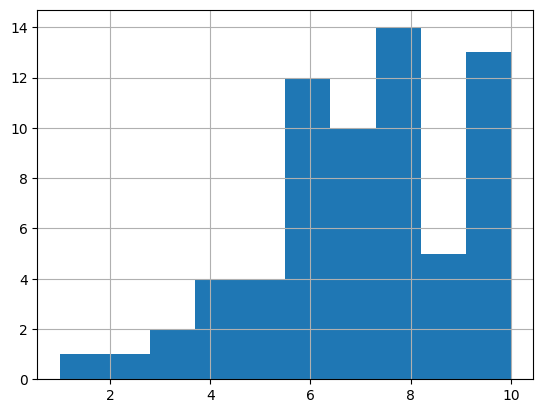

In [ ]:
var = 'Rating'  # Categorical variable example
print(df4_clean_2009[var].unique(),'\n') #seeing how many types of each rating
print(df4_clean_2009[var].value_counts(), '\n') # counting
print(df4_clean_2009[var].hist(), '\n') # making historgram of info


In [ ]:
# Calculate the average review length of a movie review
print(df4_clean_2009['Content'].apply(len).mean())

1383.7727272727273


In [ ]:
# Find the number of unique reviewers
print(df4_clean_2009['Author Name'].nunique())

66


In [ ]:
# Get summary statistics for the "Rating" column
print(df4_clean_2009["Rating"].describe())

count    66.000000
mean      7.181818
std       2.169077
min       1.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      10.000000
Name: Rating, dtype: float64


In [ ]:
print(df4_clean_2009["Rating"].median())

7.0


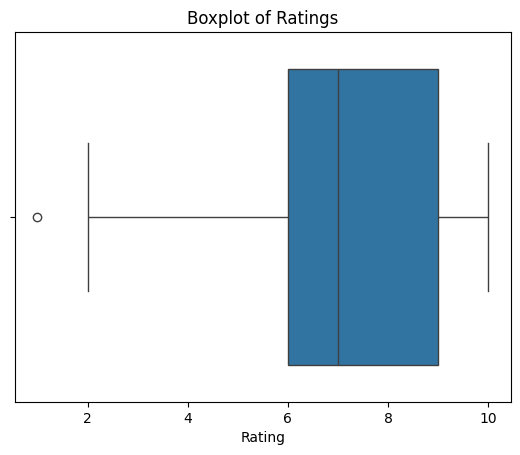

In [ ]:
# Create a boxplot for the "Rating" column
sns.boxplot(x=df4_clean_2009["Rating"])

# Add labels and title
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

# Show the plot
plt.show()

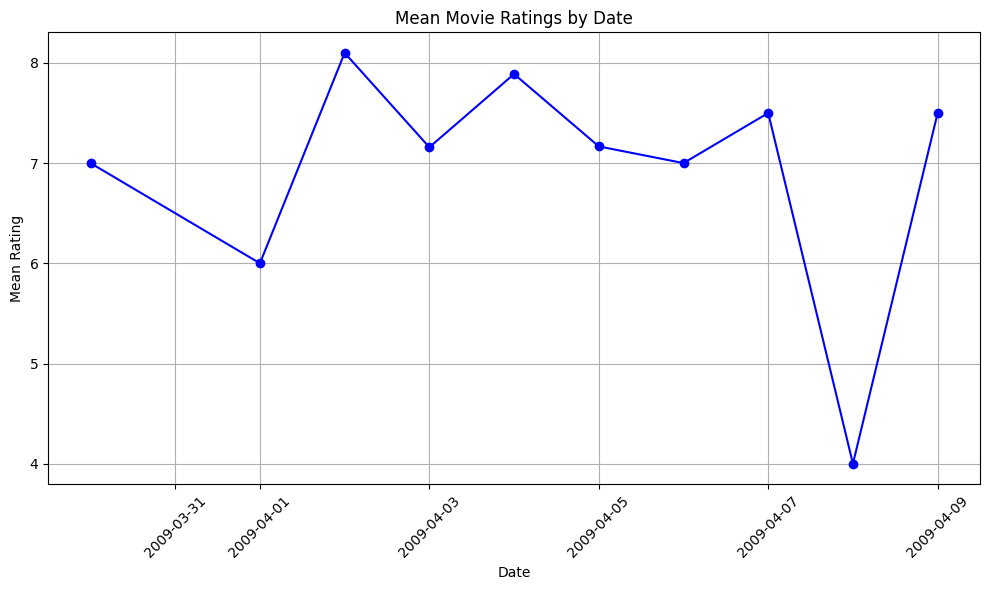

In [ ]:
# Group by date and calculate the mean of the 'Rating'
df_mean_ratings = df4_clean_2009.groupby('Date')['Rating'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(df_mean_ratings['Date'], df_mean_ratings['Rating'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Mean Movie Ratings by Date')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

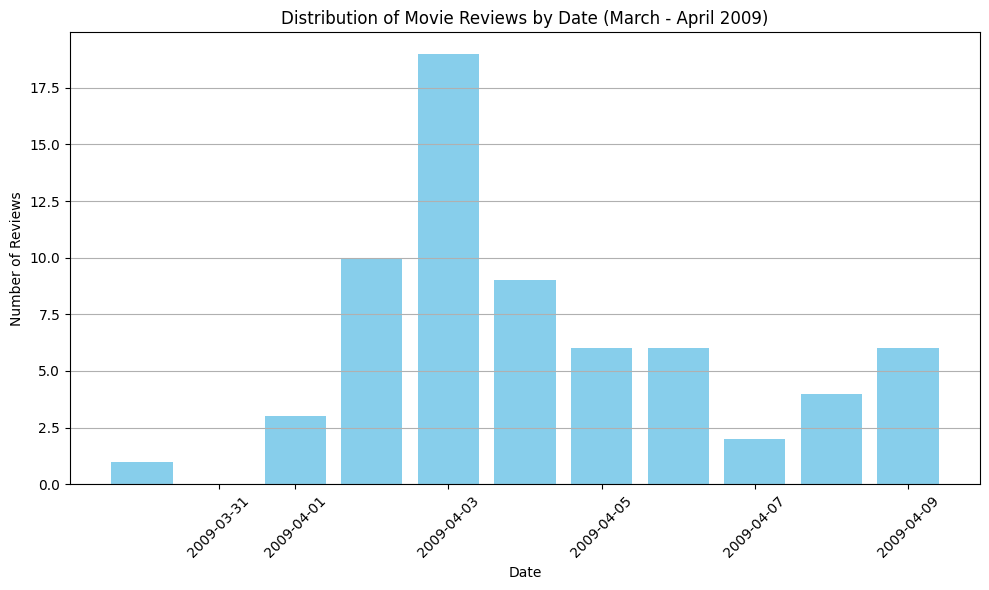

In [ ]:
# Count the number of reviews for each date
review_count_by_date = df4_clean_2009.groupby('Date')['Content'].count().reset_index(name='Review Count')

# Plot the distribution of reviews by date
plt.figure(figsize=(10, 6))
plt.bar(review_count_by_date['Date'], review_count_by_date['Review Count'], color='skyblue')

# Customize the plot
plt.title('Distribution of Movie Reviews by Date (March - April 2009)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

**Getting info about 2019-2025 dataframe**

In [ ]:
print(df4_clean_dec.shape, '\n') # List the dimensions of df
print(df4_clean_dec.dtypes, '\n') # getting data types
print(df4_clean_dec.columns, '\n') # Column names
#There are 1114 reviews cause index starts w/1 and all data types are still right

(114, 6) 

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object 

Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object') 



[ 3.  4.  7.  1.  6.  8.  5.  2.  9. 10.] 

Rating
7.0     27
6.0     25
8.0     18
5.0     13
4.0      9
9.0      7
10.0     6
3.0      4
2.0      4
1.0      1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



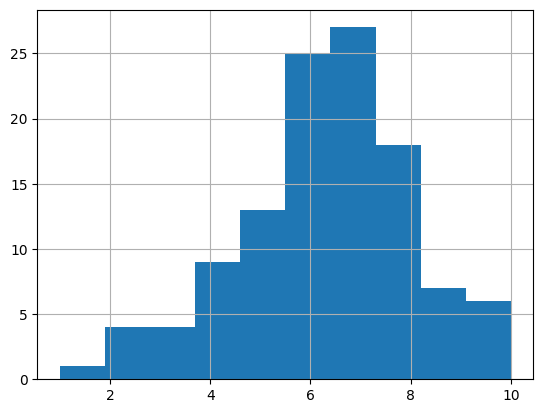

In [ ]:
var = 'Rating'  # Categorical variable example
print(df4_clean_dec[var].unique(),'\n') #seeing how many types of each rating
print(df4_clean_dec[var].value_counts(), '\n') # counting
print(df4_clean_dec[var].hist(), '\n') # making historgram of info


In [ ]:
# Get summary statistics for the "Rating" column
print(df4_clean_dec["Rating"].describe())

count    114.000000
mean       6.385965
std        1.916435
min        1.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Rating, dtype: float64


In [ ]:
# Calculate the average review length of a movie review
print(df4_clean_dec['Content'].apply(len).mean())

959.2719298245614


In [ ]:
# Find the number of unique reviewers
print(df4_clean_dec['Author Name'].nunique())

114


In [ ]:
# Get median for the "Rating" column
print(df4_clean_dec["Rating"].median())

7.0


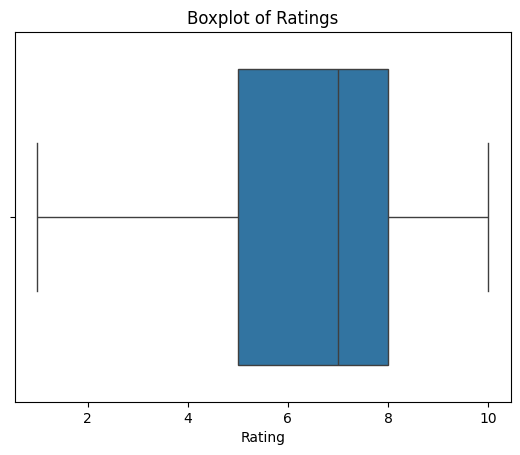

In [ ]:
# Create a boxplot for the "Rating" column
sns.boxplot(x=df4_clean_dec["Rating"])

# Add labels and title
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

# Show the plot
plt.show()

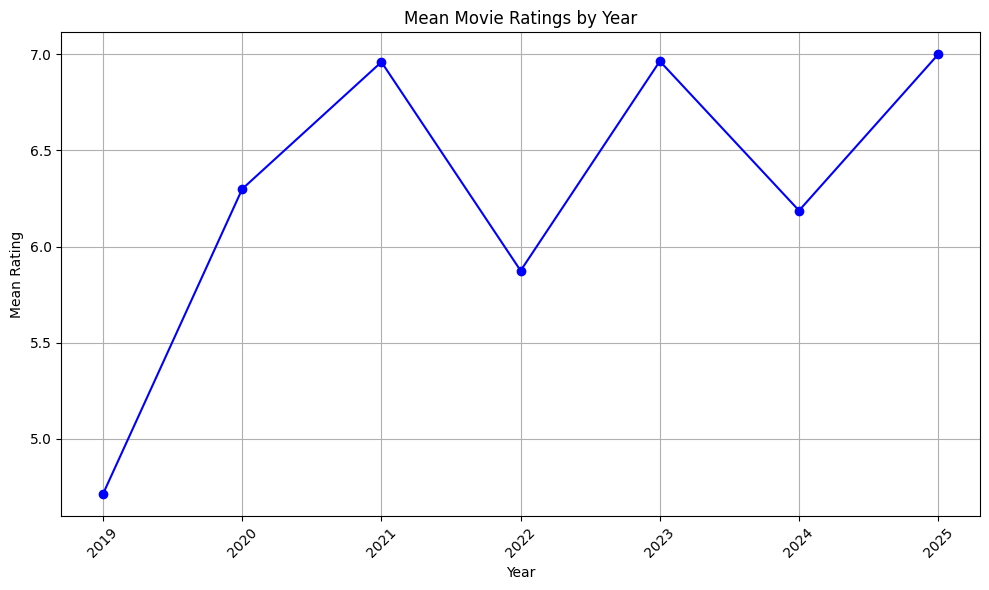

In [ ]:
# Group by date and calculate the mean of the 'Rating'
df_mean_ratings = df4_clean_dec.groupby('Year')['Rating'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(df_mean_ratings['Year'], df_mean_ratings['Rating'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Mean Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

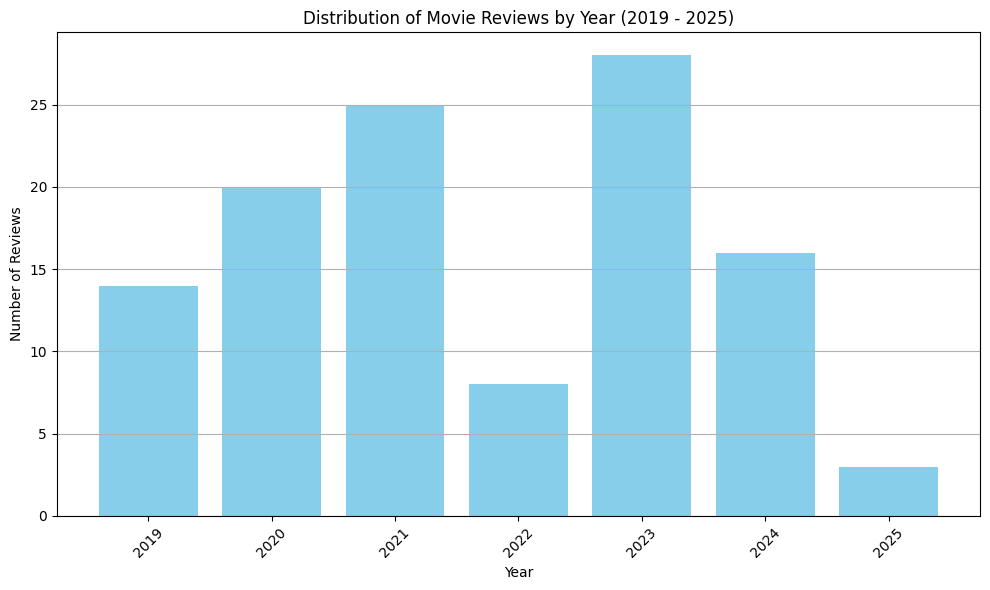

In [ ]:
# Count the number of reviews for each date
review_count_by_date = df4_clean_dec.groupby('Year')['Content'].count().reset_index(name='Review Count')

# Plot the distribution of reviews by date
plt.figure(figsize=(10, 6))
plt.bar(review_count_by_date['Year'], review_count_by_date['Review Count'], color='skyblue')

# Customize the plot
plt.title('Distribution of Movie Reviews by Year (2019 - 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()